In [1]:
%matplotlib notebook
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
import unittest
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from deepART import fuzzyARTMAPs, base, dataset
from sklearn.datasets import make_moons

/usr/local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Generate Data

In [3]:
#npoints = 200
#Xsample = dataset.TwoSpirals(npoints, noise=0.78)
#y = Xsample.y

X, y = make_moons(n_samples=200, noise=0.075)
sample_data = dataset.Dataset(X+0.5)

<IPython.core.display.Javascript object>


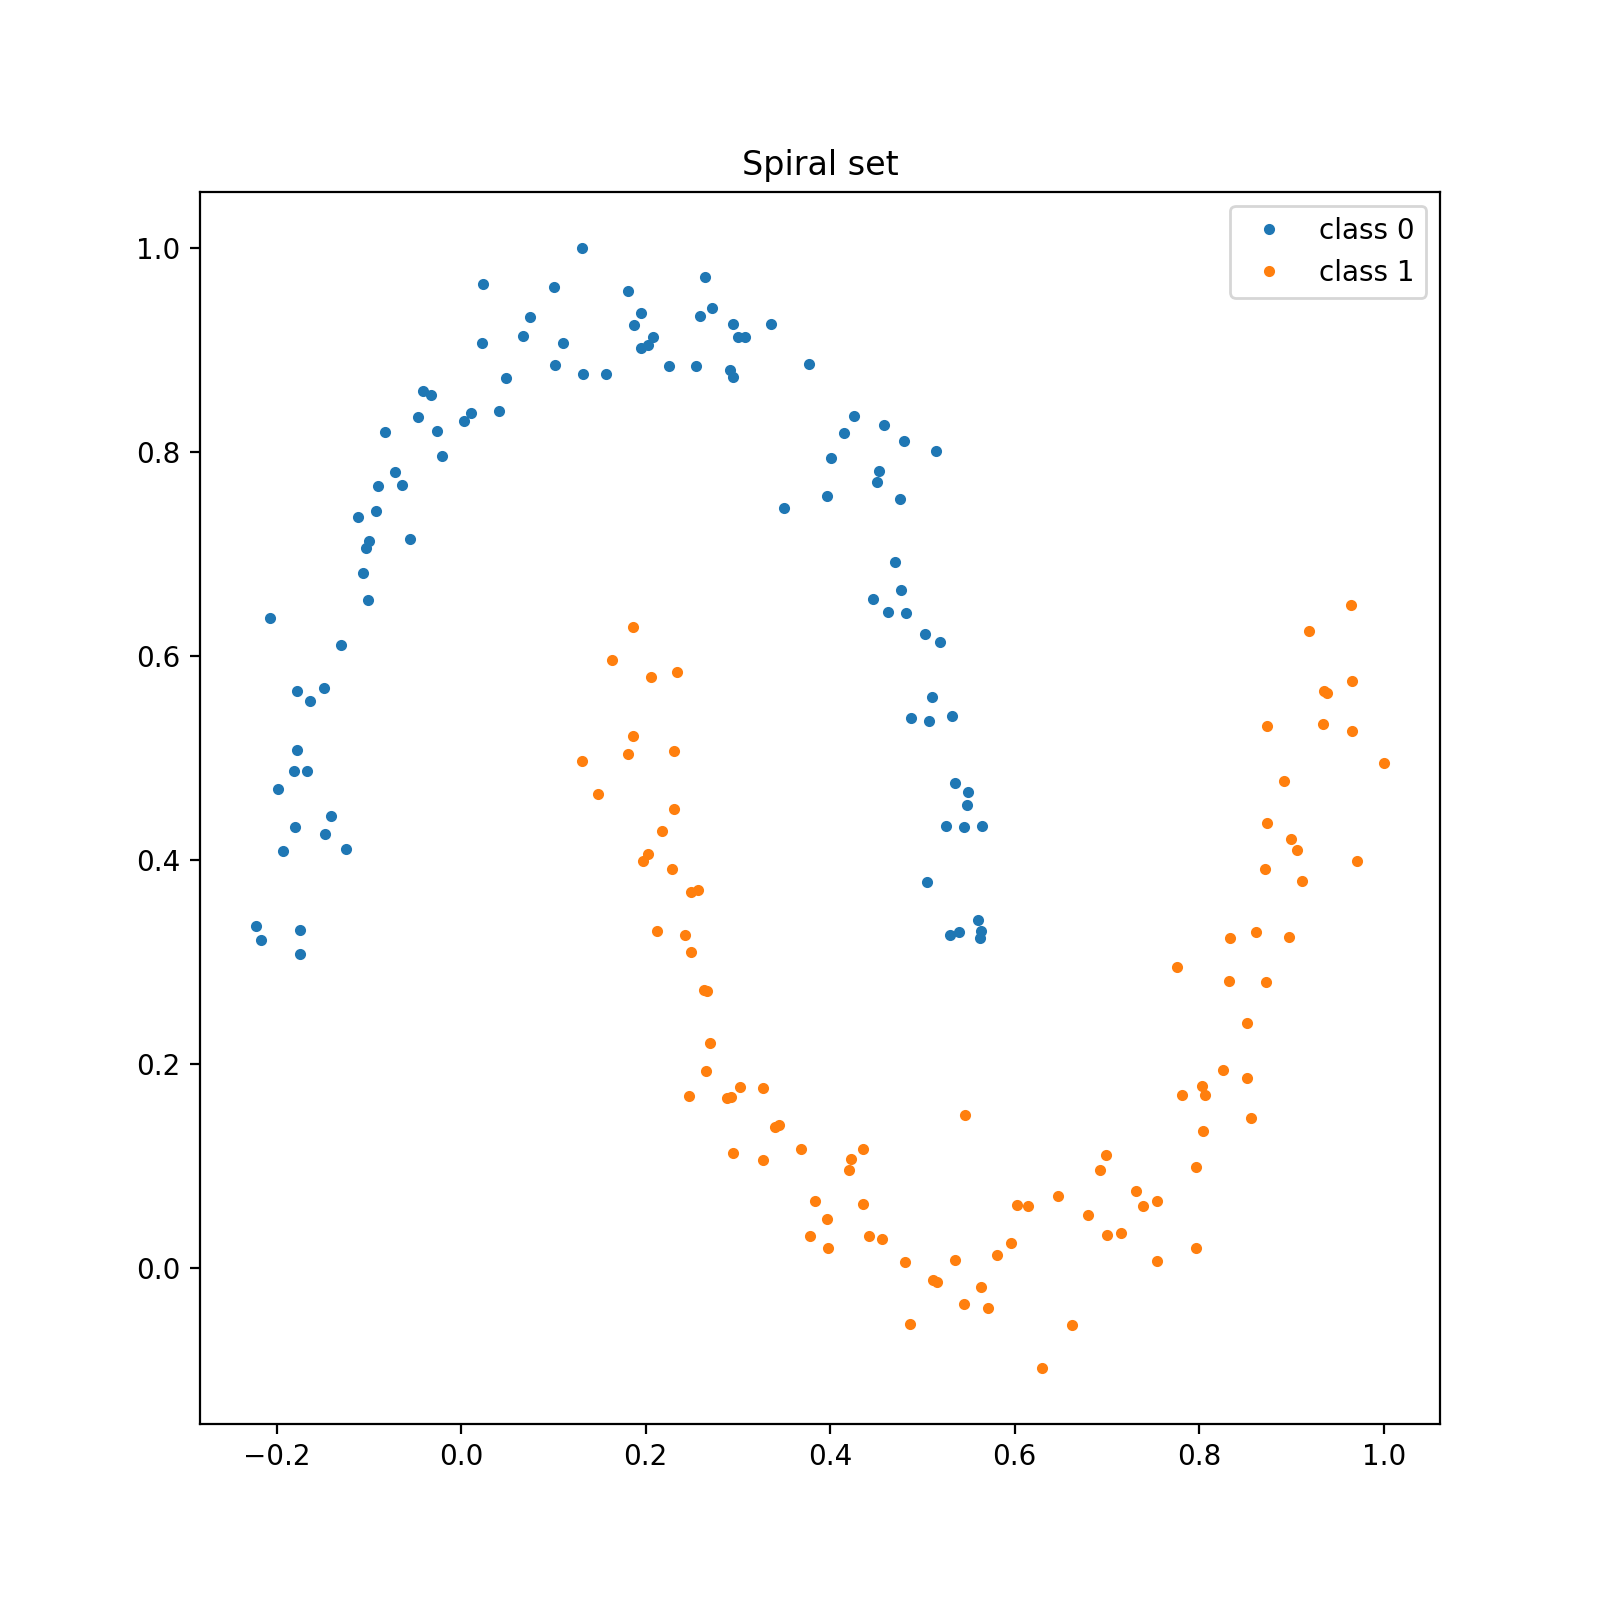

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.title('Spiral set')
plt.plot(sample_data.data_normalized[y==0,0], sample_data.data_normalized[y==0,1], '.', label='class 0')
plt.plot(sample_data.data_normalized[y==1,0], sample_data.data_normalized[y==1,1], '.', label='class 1')
plt.legend()
plt.show()

### Train network

In [5]:
epoch = 10
neurons = 50
rho = 0.8
beta = 0.8
network = fuzzyARTMAPs.FuzzyARTMAPs( 2,2, neurons, rho=rho, beta=beta,comp=True)
npoints = 200
print("Start testing...")


#convergence tracking variables
prev_active = 0
converge = 0
results = []
for _ in range(epoch):
    order = list(range(200))
    np.random.shuffle(order)
    for i in order:
        I = sample_data.data_normalized[i,...]
        print("{} ---> class {}\n".format(I.ravel(),y[i]))
        
        Z, k = network.fit(I.ravel(),y[i]) 
        if not k==None:
            print("zJ:\t{}\n".format(Z))
            print("Class:\t{}\n".format(k))
            print("\n\n")
        else:
            print("Unrecognized pattern:\n")

print("Training completed!")



INFO:root:Encode 1st node for this new network.
INFO:root:T signal ranking:
[]

INFO:root:Number of active nodes:	1

INFO:root:New neruons coded into F2 node 0
INFO:root:T signal ranking:
[0]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[0]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	1

INFO:root:T signal ranking:
[0]

INFO:root:T signal ranking:
[0]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 2
INFO:root:Number of active nodes:	2

INFO:root:New neruons coded into class 1
INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[0 1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[0 1]

Start testing...
[0.4462191 0.6562573] ---> class 0

zJ:	[[0.44621909 0.65625727]
 [0.55378091 0.34374273]]

Class:	0




[0.9357473 0.5660834] ---> class 1

zJ:	[[0.93574733 0.56608337]
 [0.06425267 0.43391663]]

Class:	1




[0.41476628 0.81914425] ---> class 0

zJ:	[[0.42105684 0.65625727]
 [0.55378091 0.21343315]]

Class:	0




[0.2912235  0.88058674] ---> class 0

zJ:	[[0.31719017 0.65625727]
 [0.55378091 0.13821723]]

Class:	0




[-0.02643971  0.8207556 ] ---> class 0

zJ:	[[-0.02643971  0.8207556 ]
 [ 1.02643967  0.1792444 ]]

Class:	0




[0.71480143 0.0347465 ] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.28519857 0.96525347]]

Class:	1




[-0.07172216  0.7804921 ] ---> class 0

zJ:	[[-0.06266567  0.78854482]
 [ 1.02643967  0.1792444 ]]

Class:	0




[0.73114556 0.0763576 ] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.27212327 0.93196461]]

Class:	1




[-0.19266956  0.40952256] ---> class 0

zJ:	[[-0.19266956  0.40952256]
 [ 1.19266951  0.59047747]]

Class:	0




[0.266

INFO:root:T signal ranking:
[5 0 4 3 2 1]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	6

INFO:root:T signal ranking:
[0 1 5 2 3 4]

INFO:root:T signal ranking:
[0 1 5 2 3 4]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 7
INFO:root:Number of active nodes:	7

INFO:root:New neruons coded into class 6
INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[6 0 1 5 2 3 4]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	7

INFO:root:T signal ranking:
[0 6 2 5 1 3 4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[0 6 2 5 1 3 4]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	7

INFO:root:T signal ranking:
[3 1 5 6 0 4 2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[3 1 5 6 0 4 2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	

zJ:	[[0.26631507 0.27219805]
 [0.7336849  0.72780192]]

Class:	1




[0.5032894  0.62215453] ---> class 0

zJ:	[[0.5032894  0.62215453]
 [0.4967106  0.37784547]]

Class:	0




[0.45295757 0.7811469 ] ---> class 0

zJ:	[[0.31719017 0.65625727]
 [0.54839013 0.13821723]]

Class:	0




[0.7970592  0.09895532] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.21677731 0.90722866]]

Class:	1




[0.10987792 0.9068112 ] ---> class 0

zJ:	[[-0.06266567  0.78854482]
 [ 0.91738558  0.11039994]]

Class:	0




[0.83268344 0.28199598] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.17720871 0.75584892]]

Class:	1




[-0.04108766  0.8597476 ] ---> class 0

zJ:	[[-0.06266567  0.78854482]
 [ 0.91738558  0.11039994]]

Class:	0




[0.44162557 0.03227663] ---> class 1

zJ:	[[0.44162557 0.03227663]
 [0.5583744  0.96772337]]

Class:	1




[0.21759444 0.42834577] ---> class 1

zJ:	[[0.22733857 0.27219805]
 [0.7336849  0.60288374]]

Class:	1




[0.8046895  0.13431323] ---> class 1

zJ:	[[0.71480143 0.0347465 

INFO:root:T signal ranking:
[3 7 1 6 5 0 4 2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[3 7 1 6 5 0 4 2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	8

INFO:root:T signal ranking:
[2 0 4 5 6 1 7 3]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[2 0 4 5 6 1 7 3]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	8

INFO:root:T signal ranking:
[4 2 5 6 0 7 1 3]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[4 2 5 6 0 7 1 3]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	8

INFO:root:T signal ranking:
[4 5 2 7 6 0 3 1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[4 5 2 7 6 0 3 1]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	8

INFO:root:T signal ranking:
[1 3 6 5 7 0 4 2]

INFO:root:Learn p

zJ:	[[0.5032894  0.47078365]
 [0.46329514 0.37784547]]

Class:	0




[0.78190917 0.17034547] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.17720871 0.71460081]]

Class:	1




[-0.08231771  0.8201397 ] ---> class 0

zJ:	[[-0.0785577   0.77181543]
 [ 0.91738558  0.11039994]]

Class:	0




[-0.16735879  0.48751327] ---> class 0

zJ:	[[-0.19266956  0.40952256]
 [ 1.17242091  0.52808485]]

Class:	0




[-0.17425008  0.30787086] ---> class 0

zJ:	[[-0.19266956  0.3282012 ]
 [ 1.17242091  0.52808485]]

Class:	0




[0.90637743 0.40961605] ---> class 1

zJ:	[[0.91225141 0.44090952]
 [0.06425267 0.43391663]]

Class:	1




[0.13096137 0.49740678] ---> class 1

zJ:	[[0.15023681 0.27219805]
 [0.7336849  0.52265132]]

Class:	1




[0.23377857 0.5841553 ] ---> class 1

zJ:	[[0.23377857 0.58415532]
 [0.7662214  0.41584468]]

Class:	1




[-0.19864999  0.47024986] ---> class 0

zJ:	[[-0.1974539   0.3282012 ]
 [ 1.17242091  0.52808485]]

Class:	0




[0.4707906 0.6919195] ---> class 0

zJ:	[[0.3171901

INFO:root:Number of active nodes:	9

INFO:root:T signal ranking:
[7 3 5 6 8 0 4 1 2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[7 3 5 6 8 0 4 1 2]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	9

INFO:root:T signal ranking:
[7 5 3 6 8 0 4 1 2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[7 5 3 6 8 0 4 1 2]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	9

INFO:root:T signal ranking:
[7 3 5 6 8 0 1 4 2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[7 3 5 6 8 0 1 4 2]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	9

INFO:root:T signal ranking:
[1 3 6 0 5 8 7 4 2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[1 3 6 0 5 8 7 4 2]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	9

INFO:root:T

zJ:	[[0.71480143 0.0347465 ]
 [0.15039926 0.71460081]]

Class:	1




[0.39759246 0.02017835] ---> class 1

zJ:	[[0.40639908 0.02259801]
 [0.5583744  0.96772337]]

Class:	1




[0.34070194 0.1388402 ] ---> class 1

zJ:	[[0.35384137 0.02259801]
 [0.5583744  0.88247252]]

Class:	1




[0.43515375 0.06278677] ---> class 1

zJ:	[[0.35384137 0.02259801]
 [0.5583744  0.88247252]]

Class:	1




[0.89144564 0.47746706] ---> class 1

zJ:	[[0.89560679 0.44090952]
 [0.06425267 0.43391663]]

Class:	1




[ 0.48609897 -0.05448663] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.52279568  0.88247252]]

Class:	1




[0.5457512  0.15058397] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.46795816  0.85602732]]

Class:	1




[0.91923356 0.62500083] ---> class 1

zJ:	[[0.89560679 0.44090952]
 [0.06425267 0.38678266]]

Class:	1




[0.04115428 0.8406064 ] ---> class 0

zJ:	[[-0.10529583  0.74369114]
 [ 0.91738558  0.07578783]]

Class:	0




[0.10023034 0.9618    ] ---> class 0

zJ:	[[0.10023034 0.9617

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	11

INFO:root:T signal ranking:
[ 0  6  8  2  9  5  1  7  3  4 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0  6  8  2  9  5  1  7  3  4 10]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	11

INFO:root:T signal ranking:
[ 2  9  0  8  4  5  6  1  7  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9  0  8  4  5  6  1  7  3 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	11

INFO:root:T signal ranking:
[ 5  8  6  4  0  7  2  9  3  1 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  6  4  0  7  2  9  3  1 10]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	11

INFO:root:T signal ranking:
[ 2  9  4  8  0  5  6  1  7  3 10]

INFO:root:Learn pattern and update match trackin

zJ:	[[ 0.66258568 -0.05562321]
 [ 0.23025833  0.99499452]]

Class:	1




[0.45796505 0.8268504 ] ---> class 0

zJ:	[[0.31719017 0.65625727]
 [0.53304553 0.13821723]]

Class:	0




[0.02398511 0.9649406 ] ---> class 0

zJ:	[[0.03923415 0.96179998]
 [0.89976966 0.03568752]]

Class:	0




[0.19723633 0.39963254] ---> class 1

zJ:	[[0.15023681 0.27219805]
 [0.7336849  0.52265132]]

Class:	1




[-0.09055654  0.7665827 ] ---> class 0

zJ:	[[-0.10529583  0.74369114]
 [ 0.91738558  0.07578783]]

Class:	0




[0.2074328  0.91311836] ---> class 0

zJ:	[[0.03923415 0.92285469]
 [0.81400769 0.03568752]]

Class:	0




[0.5962988  0.02446093] ---> class 1

zJ:	[[ 0.60955619 -0.05562321]
 [ 0.23025833  0.97943017]]

Class:	1




[0.9642514 0.6502088] ---> class 1

zJ:	[[0.89560679 0.44090952]
 [0.04144942 0.35718951]]

Class:	1




[0.80347157 0.17892015] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.15039926 0.71460081]]

Class:	1




[0.9658605  0.57534397] ---> class 1

zJ:	[[0.89560679 0.440909

INFO:root:T signal ranking:
[11  7  5  8  3  6 10  0  4  9  2  1]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	12

INFO:root:T signal ranking:
[11  7  5  3  8 10  6  0  4  9  1  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5  3  8 10  6  0  4  9  1  2]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	12

INFO:root:T signal ranking:
[ 7 10 11  3  6  5  8  0  1  4  9  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 10 11  3  6  5  8  0  1  4  9  2]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	12

INFO:root:T signal ranking:
[ 0  6  8  9  2  5  1 11  7  3  4 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0  6  8  9  2  5  1 11  7  3  4 10]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	12

INFO:root:T signal ranking

zJ:	[[0.30236802 0.17816734]
 [0.69763196 0.82183266]]

Class:	1




[0.32748625 0.17681189] ---> class 1

zJ:	[[0.30236802 0.17708298]
 [0.67753737 0.82183266]]

Class:	1




[0.48153988 0.0066359 ] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.46795816  0.85602732]]

Class:	1




[0.47585312 0.7538073 ] ---> class 0

zJ:	[[0.31719017 0.65625727]
 [0.52592664 0.11834097]]

Class:	0




[0.699925   0.03308643] ---> class 1

zJ:	[[ 0.60955619 -0.05562321]
 [ 0.23025833  0.9694169 ]]

Class:	1




[0.86195654 0.3299007 ] ---> class 1

zJ:	[[0.86195654 0.32990071]
 [0.13804346 0.67009926]]

Class:	1




[0.1806537  0.50418776] ---> class 1

zJ:	[[0.15023681 0.27219805]
 [0.7336849  0.50118005]]

Class:	1




[0.2942515  0.92559767] ---> class 0

zJ:	[[0.03923415 0.92285469]
 [0.71569119 0.03568752]]

Class:	0




[-0.10606955  0.681283  ] ---> class 0

zJ:	[[-0.10606955  0.681283  ]
 [ 1.10606956  0.318717  ]]

Class:	0




[0.010529  0.8381968] ---> class 0

zJ:	[[-0.10529583  0.7424

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 10  7  5 11  8  0  4 13  9  2]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	14

INFO:root:T signal ranking:
[ 1 12  3  6 10  0  8  5 11  7 13  9  4  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 10  0  8  5 11  7 13  9  4  2]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	14

INFO:root:T signal ranking:
[ 4 13  5  2  8 11  6  9  0  7 12  1  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2  8 11  6  9  0  7 12  1  3 10]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	14

INFO:root:T signal ranking:
[ 4 13  5  2  8 11  6  9  0  7 12  1  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2  8 11  6  9  0  7 12  1  3 10]

INFO:

zJ:	[[0.89560679 0.39182542]
 [0.03560149 0.35718951]]

Class:	1




[0.96517485 0.52673435] ---> class 1

zJ:	[[0.89560679 0.39182542]
 [0.03498042 0.35718951]]

Class:	1




[-0.14728746  0.4255512 ] ---> class 0

zJ:	[[-0.21712613  0.3282012 ]
 [ 1.14849891  0.45028202]]

Class:	0




[-0.14149788  0.44298062] ---> class 0

zJ:	[[-0.21712613  0.3282012 ]
 [ 1.14289806  0.45028202]]

Class:	0




[-0.17759697  0.50819296] ---> class 0

zJ:	[[-0.21712613  0.3282012 ]
 [ 1.14289806  0.45028202]]

Class:	0




[0.54889405 0.46719363] ---> class 0

zJ:	[[0.49058362 0.45713855]
 [0.45172702 0.37784547]]

Class:	0




[0.679026   0.05245473] ---> class 1

zJ:	[[ 0.60955619 -0.05562321]
 [ 0.23025833  0.9318954 ]]

Class:	1




[0.8254172 0.1943705] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14893361 0.71460081]]

Class:	1




[ 0.56338555 -0.01818738] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4428832   0.85602732]]

Class:	1




[0.28819582 0.1674367 ] ---> class 1

zJ:	[[0.291

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 10  3  5  6  8 12  0  4  1 13  9  2]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	14

INFO:root:T signal ranking:
[ 5  8  0  6 11  4  9 13  2  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  0  6 11  4  9 13  2  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	14

INFO:root:T signal ranking:
[ 5 11  8  6  7  4  0  3 12 13  9 10  2  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  8  6  7  4  0  3 12 13  9 10  2  1]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	14

INFO:root:T signal ranking:
[ 3 12  1 10  6  7 11  5  8  0  4 13  9  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 12  1 10  6  7 11  5  8  0  4 13  9  2]

INFO:

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4428832   0.85602732]]

Class:	1




[0.23050718 0.5070154 ] ---> class 1

zJ:	[[0.15023681 0.27219805]
 [0.7336849  0.49462369]]

Class:	1




[0.24877776 0.30964163] ---> class 1

zJ:	[[0.15023681 0.27219805]
 [0.7336849  0.49462369]]

Class:	1




[0.8728401  0.28059107] ---> class 1

zJ:	[[0.86195654 0.290453  ]
 [0.12933661 0.67009926]]

Class:	1




[0.39652044 0.04808024] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4428832   0.85602732]]

Class:	1




[0.8337636  0.32389298] ---> class 1

zJ:	[[0.83940219 0.290453  ]
 [0.12933661 0.67009926]]

Class:	1




[0.5259713  0.43348762] ---> class 0

zJ:	[[0.48352014 0.35293734]
 [0.45172702 0.36174043]]

Class:	0




[0.10205574 0.88559353] ---> class 0

zJ:	[[0.03923415 0.88321333]
 [0.70740878 0.03568752]]

Class:	0




[0.00354603 0.8301221 ] ---> class 0

zJ:	[[-0.10529583  0.74247807]
 [ 0.91738558  0.07578783]]

Class:	0




[0.9706248 0.399698 ] ---> class 1

zJ:	[[0.89560679 0.39182542

INFO:root:T signal ranking:
[14  0  6  9  8  2  1  5 13 12  7 11  3 10  4]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 8  5  0  2 13  9  6  4 14 11  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  5  0  2 13  9  6  4 14 11  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 6  0 14  8  5  1  7 12 11  3 10  9 13  4  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  8  5  1  7 12 11  3 10  9 13  4  2]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 9  0  2 14  8  5  6 13 11  4  1  7 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  0  2 14  8  5  6 13 11  4  1  7 12  3 10]

INFO:root:Update LTM trace for node: 	 9

IN

zJ:	[[0.51470464 0.80112356]
 [0.48529536 0.19887644]]

Class:	0




[0.18611835 0.62811786] ---> class 1

zJ:	[[0.19565039 0.58415532]
 [0.7662214  0.38067465]]

Class:	1




[0.50767136 0.5367666 ] ---> class 0

zJ:	[[0.48352014 0.35293734]
 [0.45172702 0.36174043]]

Class:	0




[0.2999192  0.91325396] ---> class 0

zJ:	[[0.03923415 0.88321333]
 [0.70154641 0.03568752]]

Class:	0




[0.39674538 0.7568014 ] ---> class 0

zJ:	[[0.31719017 0.65625727]
 [0.52592664 0.11834097]]

Class:	0




[0.4773086 0.6651597] ---> class 0

zJ:	[[0.31719017 0.65625727]
 [0.52333842 0.11834097]]

Class:	0




[-0.09995746  0.7125523 ] ---> class 0

zJ:	[[-0.12532381  0.62463193]
 [ 1.10117989  0.29370155]]

Class:	0




[0.5317977  0.54185414] ---> class 0

zJ:	[[0.48352014 0.35293734]
 [0.45172702 0.36174043]]

Class:	0




[0.19464634 0.90231675] ---> class 0

zJ:	[[0.03923415 0.88321333]
 [0.70154641 0.03568752]]

Class:	0




[0.22870645 0.39137018] ---> class 1

zJ:	[[0.15023681 0.27219805]
 [0.

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 6  0  5 14  1  8  7 12  3 11 10  9  4 13  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0  5 14  1  8  7 12  3 11 10  9  4 13  2]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 2 13  4  9  8  0  5 14  6 11  1  7 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  4  9  8  0  5 14  6 11  1  7 12  3 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 6  7  3 12  5 10 11  1 14  0  8  4  9 13  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  7  3 12  5 10 11  1 14  0  8  4  9 13  2]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 9  2  0  8 

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4428832   0.85602732]]

Class:	1




[0.5353611  0.47585988] ---> class 0

zJ:	[[0.48352014 0.35293734]
 [0.45172702 0.36174043]]

Class:	0




[-0.05572862  0.71508783] ---> class 0

zJ:	[[-0.10529583  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.56008595 0.34128717] ---> class 0

zJ:	[[0.48352014 0.3436172 ]
 [0.44227664 0.36174043]]

Class:	0




[0.13076687 1.        ] ---> class 0

zJ:	[[0.03923415 0.88321333]
 [0.70154641 0.0071375 ]]

Class:	0




[0.0487184 0.8724137] ---> class 0

zJ:	[[-0.10529583  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.18665797 0.5219326 ] ---> class 1

zJ:	[[0.15023681 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[-0.10339123  0.705914  ] ---> class 0

zJ:	[[-0.12532381  0.62463193]
 [ 1.10117989  0.29370155]]

Class:	0




[0.26502755 0.19383779] ---> class 1

zJ:	[[0.25535585 0.16936596]
 [0.67753737 0.78738422]]

Class:	1




[0.73959666 0.06143169] ---> class 1

zJ:	[[ 0.60356827 -

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  4  2  8  5  9  0  6 14 11  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 3 10  7 12 11  6  1  5 14  0  8  4 13  9  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 10  7 12 11  6  1  5 14  0  8  4 13  9  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 9  0  2 14  8  5  6 13 11  4  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  0  2 14  8  5  6 13 11  4  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 4 13  2  8  5  9  0  6 11 14  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  2  8  5  9  0  6 11 14

zJ:	[[-0.19062768  0.62463193]
 [ 1.10117989  0.29370155]]

Class:	0




[0.6991639  0.11125973] ---> class 1

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89737132]]

Class:	1




[0.3079584 0.9131921] ---> class 0

zJ:	[[0.03923415 0.88321333]
 [0.69394259 0.0071375 ]]

Class:	0




[-0.17808649  0.565776  ] ---> class 0

zJ:	[[-0.21712613  0.32297731]
 [ 1.12889022  0.43743561]]

Class:	0




[0.14822578 0.46450976] ---> class 1

zJ:	[[0.14862799 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[1.         0.49544886] ---> class 1

zJ:	[[0.87429094 0.39182542]
 [0.00609925 0.35718951]]

Class:	1




[0.5632476  0.33073202] ---> class 0

zJ:	[[0.48352014 0.33330905]
 [0.43785723 0.36174043]]

Class:	0




[0.26482964 0.971476  ] ---> class 0

zJ:	[[0.03923415 0.88321333]
 [0.69394259 0.0071375 ]]

Class:	0




[-0.1642268   0.55603945] ---> class 0

zJ:	[[-0.21712613  0.32297731]
 [ 1.12889022  0.43743561]]

Class:	0




[0.20247929 0.40609553] ---> class 1

zJ:	[[0.14862799 0.

INFO:root:T signal ranking:
[ 7 11 10  3  6  5 12  0  8 14  1  4  9 13  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 10  3  6  5 12  0  8 14  1  4  9 13  2]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[10  3  7 12 11  6  1  5 14  0  8  4 13  9  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  3  7 12 11  6  1  5 14  0  8  4 13  9  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 5  8 11  6  0  4  2  7  9 13 14 12  1  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8 11  6  0  4  2  7  9 13 14 12  1  3 10]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 7 10  3 11  6 12  5 14  0  1  8  4  9 13  2]

INFO:root:Learn pattern and update match tra

zJ:	[[0.25535585 0.12406289]
 [0.67753737 0.78738422]]

Class:	1




[0.42095566 0.09644482] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4428832   0.85602732]]

Class:	1




[0.6928564  0.09656624] ---> class 1

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89737132]]

Class:	1




[0.23057885 0.4498943 ] ---> class 1

zJ:	[[0.14862799 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[0.53576845 0.00873493] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4428832   0.85602732]]

Class:	1




[0.20271793 0.90520173] ---> class 0

zJ:	[[0.03923415 0.88321333]
 [0.69394259 0.0071375 ]]

Class:	0




[-0.18011732  0.43244806] ---> class 0

zJ:	[[-0.21712613  0.32297731]
 [ 1.12889022  0.43743561]]

Class:	0




[-0.03300814  0.8555234 ] ---> class 0

zJ:	[[-0.10529583  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.3448769  0.14076726] ---> class 1

zJ:	[[0.25535585 0.12406289]
 [0.65960597 0.78738422]]

Class:	1




[0.16378474 0.5963481 ] ---> class 1

zJ:	[[0.17015

INFO:root:T signal ranking:
[ 6  0 14  8  5  1  7 11 12  3  9 10 13  2  4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  8  5  1  7 11 12  3  9 10 13  2  4]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 9  0  2  8 14  5 13  6 11  4  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  0  2  8 14  5 13  6 11  4  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 7 11 10  6  3  5 12  0  8 14  1  4  9 13  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 10  6  3  5 12  0  8 14  1  4  9 13  2]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 9  2  0  8 14  5 13  6  4 11  7  1 12  3 10]

INFO:root:Learn pattern and update match trac

zJ:	[[0.87177744 0.39120867]
 [0.00609925 0.35718951]]

Class:	1




[0.5104667  0.56003785] ---> class 0

zJ:	[[0.48352014 0.33330905]
 [0.43785723 0.36174043]]

Class:	0




[0.2550598 0.8839461] ---> class 0

zJ:	[[0.03923415 0.87806245]
 [0.69394259 0.0071375 ]]

Class:	0




[0.42284757 0.10764412] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4428832   0.85602732]]

Class:	1




[0.18080287 0.9575062 ] ---> class 0

zJ:	[[0.03923415 0.87806245]
 [0.69394259 0.0071375 ]]

Class:	0




[ 0.515317   -0.01351071] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4428832   0.85602732]]

Class:	1




[0.89968777 0.4206487 ] ---> class 1

zJ:	[[0.87177744 0.39120867]
 [0.00609925 0.35718951]]

Class:	1




[0.2723888 0.9410131] ---> class 0

zJ:	[[0.03923415 0.87806245]
 [0.69394259 0.0071375 ]]

Class:	0




[0.34989607 0.74475026] ---> class 0

zJ:	[[0.31719017 0.64587452]
 [0.52333842 0.11834097]]

Class:	0




[0.45069265 0.7702417 ] ---> class 0

zJ:	[[0.31719017 0.64587452]
 [

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[11  7  5 10  6  3  8  0 12  4 14  9  1 13  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 10  6  3  8  0 12  4 14  9  1 13  2]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 1 12  3  6  0 10 14  8  5  7 11  9 13  4  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6  0 10 14  8  5  7 11  9 13  4  2]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[11  7  5 10  6  8  3  0 12  4 14  9 13  2  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 10  6  8  3  0 12  4 14  9 13  2  1]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[12  1  3  

zJ:	[[0.48352014 0.33330905]
 [0.43598334 0.36174043]]

Class:	0




[0.32695255 0.10664022] ---> class 1

zJ:	[[0.25535585 0.11012475]
 [0.65960597 0.78738422]]

Class:	1




[0.9344487  0.53369087] ---> class 1

zJ:	[[0.87177744 0.39120867]
 [0.00609925 0.35718951]]

Class:	1




[0.2928651  0.16753781] ---> class 1

zJ:	[[0.25535585 0.11012475]
 [0.65960597 0.78738422]]

Class:	1




[0.8971276  0.32482862] ---> class 1

zJ:	[[0.83940219 0.290453  ]
 [0.10816522 0.67009926]]

Class:	1




[ 0.54540205 -0.03486858] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.43203133  0.85602732]]

Class:	1




[0.5629518  0.32394654] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[0.38346767 0.06629111] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.43203133  0.85602732]]

Class:	1




[0.53981286 0.3295426 ] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[0.1568905  0.87646765] ---> class 0

zJ:	[[0.03923415 0.87678661

INFO:root:T signal ranking:
[ 5 11  8  6  7  4  0 12  3 10 14  9  2 13  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  8  6  7  4  0 12  3 10 14  9  2 13  1]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 2  9 13  0  8 14  4  5  6 11  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 13  0  8 14  4  5  6 11  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 7 10 11  3  6  5 12  0  8 14  1  4  9 13  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 10 11  3  6  5 12  0  8 14  1  4  9 13  2]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 9  0 14  2  8  5 13  6 11  4  7  1 12  3 10]

INFO:root:Learn pattern and update match trac

zJ:	[[0.37170452 0.80112356]
 [0.48529536 0.09965245]]

Class:	0




[0.24877776 0.30964163] ---> class 1

zJ:	[[0.14862799 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[0.010529  0.8381968] ---> class 0

zJ:	[[-0.10529583  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.44162557 0.03227663] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.43203133  0.85602732]]

Class:	1




[0.22552586 0.88415545] ---> class 0

zJ:	[[0.03923415 0.87678661]
 [0.69394259 0.0071375 ]]

Class:	0




[0.16378474 0.5963481 ] ---> class 1

zJ:	[[0.16505937 0.58014255]
 [0.7662214  0.38067465]]

Class:	1




[0.0487184 0.8724137] ---> class 0

zJ:	[[-0.10529583  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.699925   0.03308643] ---> class 1

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89737132]]

Class:	1




[0.19464634 0.90231675] ---> class 0

zJ:	[[0.03923415 0.87678661]
 [0.69394259 0.0071375 ]]

Class:	0




[0.48740718 0.53955835] ---> class 0

zJ:	[[0.48352014 0.325819

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 4 13  5  2  8 11  6  9  0  7 14 12  3  1 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2  8 11  6  9  0  7 14 12  3  1 10]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[11  7  5  6 10  8  3  0  4 12 14  9 13  2  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5  6 10  8  3  0  4 12 14  9 13  2  1]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[12  3  1 10  6  7 11  5  0  8 14  4  9 13  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3  1 10  6  7 11  5  0  8 14  4  9 13  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 5  8  4 1

zJ:	[[0.14862799 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[-0.14728746  0.4255512 ] ---> class 0

zJ:	[[-0.21712613  0.32297731]
 [ 1.12889022  0.43743561]]

Class:	0




[0.28819582 0.1674367 ] ---> class 1

zJ:	[[0.24822097 0.11012475]
 [0.65960597 0.78738422]]

Class:	1




[0.83268344 0.28199598] ---> class 1

zJ:	[[0.83402719 0.28368739]
 [0.10816522 0.67009926]]

Class:	1




[0.14822578 0.46450976] ---> class 1

zJ:	[[0.14830623 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[0.42284757 0.10764412] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.43203133  0.85602732]]

Class:	1




[0.5032894  0.62215453] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[0.45796505 0.8268504 ] ---> class 0

zJ:	[[0.37170452 0.80112356]
 [0.48529536 0.09965245]]

Class:	0




[0.23057885 0.4498943 ] ---> class 1

zJ:	[[0.14830623 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[0.9111042 0.3795544] ---> class 1

zJ:	[[0.87177744 0.38188525]


INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 4 13  5 11  2  8  6  7  9  0 12  3 14 10  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5 11  2  8  6  7  9  0 12  3 14 10  1]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 8  5  0  2 13  9  6 14  4 11  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  5  0  2 13  9  6 14  4 11  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 6  0  5  7  1  3 12 14  8 10 11  4  9 13  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0  5  7  1  3 12 14  8 10 11  4  9 13  2]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[ 7 11 10  3  5  6 12  8  0 14  4  1  9 13  2]

INFO:ro

zJ:	[[0.14830623 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[-0.17425008  0.30787086] ---> class 0

zJ:	[[-0.21712613  0.31089215]
 [ 1.12889022  0.43743561]]

Class:	0




[0.18611835 0.62811786] ---> class 1

zJ:	[[0.16505937 0.58014255]
 [0.7662214  0.37364064]]

Class:	1




[0.5480597  0.45372728] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[0.39759246 0.02017835] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.43203133  0.85602732]]

Class:	1




[0.23050718 0.5070154 ] ---> class 1

zJ:	[[0.14830623 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[0.6928564  0.09656624] ---> class 1

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89737132]]

Class:	1




[0.5051688  0.37834597] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[-0.21705888  0.32167134] ---> class 0

zJ:	[[-0.21712613  0.31089215]
 [ 1.12889022  0.43743561]]

Class:	0




[0.80347157 0.17892015] ---> class 1

zJ:	[[0.71480143 

INFO:root:Number of active nodes:	16

INFO:root:T signal ranking:
[ 5 11  8  6  7  4  0 12  3  9 14  2 13 10 15  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  8  6  7  4  0 12  3  9 14  2 13 10 15  1]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	16

INFO:root:T signal ranking:
[ 9 15  2  0 14  8  5 13  6  4 11  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 15  2  0 14  8  5 13  6  4 11  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	16

INFO:root:T signal ranking:
[ 6  7  3 12 10  5 11  1  0 14  8  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  7  3 12 10  5 11  1  0 14  8  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	16

INFO:root:T signal ranking:
[ 0 14  6  9  8  2  5 15 13  1 11  7 

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89737132]]

Class:	1




[0.24246922 0.32720578] ---> class 1

zJ:	[[0.14830623 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[0.18080287 0.9575062 ] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69394259 0.0071375 ]]

Class:	0




[0.5632476  0.33073202] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[0.45069265 0.7702417 ] ---> class 0

zJ:	[[0.31719017 0.64379797]
 [0.52333842 0.11834097]]

Class:	0




[0.43612477 0.11706547] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.43203133  0.85602732]]

Class:	1




[0.06737314 0.91336477] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69394259 0.0071375 ]]

Class:	0




[0.19472216 0.9366303 ] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69394259 0.0071375 ]]

Class:	0




[0.6466961  0.07144685] ---> class 1

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89737132]]

Class:	1




[0.51470464 0.80112356] ---> class 0

zJ:	[[0.37170452 0.801123

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	16

INFO:root:T signal ranking:
[ 1 12  6  3  0 14  8 10  5  9  7 13 11  2 15  4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  6  3  0 14  8 10  5  9  7 13 11  2 15  4]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	16

INFO:root:T signal ranking:
[ 4 13  5  2  8 15 11  9  6  0 14  7 12  3  1 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2  8 15 11  9  6  0 14  7 12  3  1 10]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	16

INFO:root:T signal ranking:
[ 6  0 14  8  5  1  7 12  3 11 10  9 13  2  4 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  8  5  1  7 12  3 11 10  9 13  2  4 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	16

INFO:root:T signal ran

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89737132]]

Class:	1




[0.9642514 0.6502088] ---> class 1

zJ:	[[0.87177744 0.38188525]
 [0.00609925 0.35127089]]

Class:	1




[-0.14149788  0.44298062] ---> class 0

zJ:	[[-0.21712613  0.31089215]
 [ 1.12889022  0.43215217]]

Class:	0




[0.5317977  0.54185414] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[0.37776378 0.03159678] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.43203133  0.85602732]]

Class:	1




[0.40106493 0.7943744 ] ---> class 0

zJ:	[[0.37170452 0.79572424]
 [0.48529536 0.09965245]]

Class:	0




[ 0.56338555 -0.01818738] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.43203133  0.85602732]]

Class:	1




[0.3079584 0.9131921] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0071375 ]]

Class:	0




[0.25917447 0.9337382 ] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0071375 ]]

Class:	0




[0.39674538 0.7568014 ] ---> class 0

zJ:	[[0.31719017 0.64

INFO:root:T signal ranking:
[11  7  5  6 10  8  3  0  4 12 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5  6 10  8  3  0  4 12 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	16

INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	16

INFO:root:T signal ranking:
[ 4 13  5  2  8 11 15  9  6  0  7 14 12  3  1 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2  8 11 15  9  6  0  7 14 12  3  1 10]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	16

INFO:root:T signal ranking:
[ 6  0 14  5  8  1  7 11 12  3 10  9 13  2  4 15]

INFO:root:Learn pattern

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[0.2928651  0.16753781] ---> class 1

zJ:	[[0.24822097 0.11012475]
 [0.65960597 0.78049454]]

Class:	1




[0.02258397 0.90701246] ---> class 0

zJ:	[[-0.10529583  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.18011732  0.43244806] ---> class 0

zJ:	[[-0.22106057  0.31089215]
 [ 1.12889022  0.43215217]]

Class:	0




[0.50767136 0.5367666 ] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[0.71480143 0.0347465 ] ---> class 1

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89737132]]

Class:	1




[0.37758344 0.8866281 ] ---> class 0

zJ:	[[0.37170452 0.79572424]
 [0.48529536 0.09965245]]

Class:	0




[ 0.57068163 -0.03840049] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42986096  0.85602732]]

Class:	1




[0.8337636  0.32389298] ---> class 1

zJ:	[[0.83381632 0.28368739]
 [0.10393094 0.67009926]]

Class:	1




[ 0.5109716  -0.01116411] ---> class 1

zJ:	[[ 0.353841

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 2 13  9 15  4  8  0 14  5  6 11 16  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  9 15  4  8  0 14  5  6 11 16  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 5  8 11  6  0  4  7  2  9 13 14 16 15 12  3  1 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8 11  6  0  4  7  2  9 13 14 16 15 12  3  1 10]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 3 12 10  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 12 10  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 6 16  0  5  1  7 

zJ:	[[0.87177744 0.38188525]
 [0.00609925 0.35127089]]

Class:	1




[-0.07172216  0.7804921 ] ---> class 0

zJ:	[[-0.10529583  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.21759444 0.42834577] ---> class 1

zJ:	[[0.14830623 0.27219805]
 [0.7336849  0.48137866]]

Class:	1




[0.8254172 0.1943705] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.71460081]]

Class:	1




[0.54889405 0.46719363] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[0.48153988 0.0066359 ] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42986096  0.85602732]]

Class:	1




[0.9385285  0.56434673] ---> class 1

zJ:	[[0.87177744 0.38188525]
 [0.00609925 0.35127089]]

Class:	1




[0.13076687 1.        ] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[0.75485116 0.00763413] ---> class 1

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89737132]]

Class:	1




[0.26502755 0.19383779] ---> class 1

zJ:	[[0.24822097 0.110124

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  2  4  8 15  9  5  0 14  6 11 16  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 7 11 16 10  6  3  5 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 16 10  6  3  5 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 1 12  3  6  0 10 16 14  8  5  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6  0 10 16 14  8  5  7 11  9 13  4  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 7 10 16 11  3  6  5 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal rank

zJ:	[[-0.19062768  0.62463193]
 [ 1.10114173  0.29370155]]

Class:	0




[0.42095566 0.09644482] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42986096  0.85602732]]

Class:	1




[0.8737822  0.53191906] ---> class 1

zJ:	[[0.87177744 0.38188525]
 [0.00609925 0.35127089]]

Class:	1




[0.455901   0.02886601] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42986096  0.85602732]]

Class:	1




[0.8064245  0.17002863] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.71460081]]

Class:	1




[0.6991639  0.11125973] ---> class 1

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89046651]]

Class:	1




[0.10987792 0.9068112 ] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[0.2912235  0.88058674] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[0.18665797 0.5219326 ] ---> class 1

zJ:	[[0.14830623 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.20247929 0.40609553] ---> class 1

zJ:	[[0.14830623 0.27

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0  5 14  6 11 16  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 6  0 14  8  5 16  1  7 11 12  3  9 10 13  2  4 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  8  5 16  1  7 11 12  3  9 10 13  2  4 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 2  9 15 13  0  8 14  4  5  6 11 16  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13  0  8 14  4  5  6 11 16  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 9  2 15  0 14  8 13  5  4  6 11 16  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranki

zJ:	[[-0.10529583  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.5104667  0.56003785] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43598334 0.36174043]]

Class:	0




[-0.03300814  0.8555234 ] ---> class 0

zJ:	[[-0.10529583  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.07504044 0.9328652 ] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[-0.16735879  0.48751327] ---> class 0

zJ:	[[-0.22106057  0.31089215]
 [ 1.12889022  0.43215217]]

Class:	0




[0.8046895  0.13431323] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.71460081]]

Class:	1




[0.77630156 0.29571122] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70635119]]

Class:	1




[ 0.6625857  -0.05562321] ---> class 1

zJ:	[[ 0.58526849 -0.08917183]
 [ 0.23025833  0.89046651]]

Class:	1




[-0.09995746  0.7125523 ] ---> class 0

zJ:	[[-0.19062768  0.62463193]
 [ 1.10019432  0.28869846]]

Class:	0




[0.3359545  0.92515355] ---> class 0

zJ:	[[0.3

INFO:root:T signal ranking:
[ 5  8  0  4  6 11  2 13  9 14 15  7 16  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  0  4  6 11  2 13  9 14 15  7 16  1 12  3 10]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 7 11 16 10  5  6  3  8 12  0 14  4  1  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 16 10  5  6  3  8 12  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 4 13  5  2 11  8 15  6 16  7  9  0 12 14  3 10  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2 11  8 15  6 16  7  9  0 12 14  3 10  1]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 7 10 16  3 11  6 12  5  0  1  8 14  4  9 13  2 15]

INF

zJ:	[[0.87177744 0.38188525]
 [0.00609925 0.35127089]]

Class:	1




[0.1806537  0.50418776] ---> class 1

zJ:	[[0.14830623 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.36880347 0.11748372] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42986096  0.85602732]]

Class:	1




[-0.17422825  0.33159786] ---> class 0

zJ:	[[-0.22106057  0.31089215]
 [ 1.12889022  0.43215217]]

Class:	0




[0.53576845 0.00873493] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42986096  0.85602732]]

Class:	1




[0.48051426 0.8105048 ] ---> class 0

zJ:	[[0.34310449 0.79572424]
 [0.48529536 0.07980765]]

Class:	0




[0.56448513 0.43399686] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43560856 0.36174043]]

Class:	0




[0.5190385 0.6138562] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43560856 0.36174043]]

Class:	0




[0.5259713  0.43348762] ---> class 0

zJ:	[[0.48352014 0.32581904]
 [0.43560856 0.36174043]]

Class:	0




[0.21226418 0.33061233] ---> class 1

zJ:	[[0.14830623 0.272198

INFO:root:T signal ranking:
[ 9 14  2  0 15  8  5 13  6 11  4 16  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  2  0 15  8  5 13  6 11  4 16  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5  6 13 11  4 16  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5  6 13 11  4 16  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 6 16  7  3 12 10  5 11  0  1 14  8  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  7  3 12 10  5 11  0  1 14  8  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13 11  1 16  7 12  4  3 10]

INF

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[0.2074328  0.91311836] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[0.2999192  0.91325396] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[0.53981286 0.3295426 ] ---> class 0

zJ:	[[0.48210745 0.32581904]
 [0.43560856 0.35851943]]

Class:	0




[0.41476628 0.81914425] ---> class 0

zJ:	[[0.34310449 0.79572424]
 [0.48529536 0.07980765]]

Class:	0




[-0.11198036  0.73666006] ---> class 0

zJ:	[[-0.11064346  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.8563031  0.14771567] ---> class 1

zJ:	[[0.83381632 0.1744146 ]
 [0.10393094 0.67009926]]

Class:	1




[0.34989607 0.74475026] ---> class 0

zJ:	[[0.31719017 0.64379797]
 [0.52333842 0.11834097]]

Class:	0




[0.86195654 0.3299007 ] ---> class 1

zJ:	[[0.83381632 0.1744146 ]
 [0.10393094 0.67009926]]

Class:	1




[-0.17759697  0.50819296] ---> class 0

zJ:	[[-0.22106057  0.31089215

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  9 15  4  8 14  0  5  6 11 16  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[11  7  5 16  6 10  8  3 12  0  4 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 16  6 10  8  3 12  0  4 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 1 12  3  6  0 10 16  8 14  5  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6  0 10 16  8 14  5  7 11  9 13  4  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 1 12  3  6 10 16  0  8  5 14  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal rank

zJ:	[[-0.11064346  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.30236802 0.17816734] ---> class 1

zJ:	[[0.24822097 0.10733713]
 [0.65935964 0.78049454]]

Class:	1




[0.96517485 0.52673435] ---> class 1

zJ:	[[0.87177744 0.38188525]
 [0.00609925 0.35127089]]

Class:	1




[1.         0.49544886] ---> class 1

zJ:	[[0.87177744 0.38188525]
 [0.00121985 0.35127089]]

Class:	1




[-0.05572862  0.71508783] ---> class 0

zJ:	[[-0.20368845  0.62463193]
 [ 1.0646218   0.28566943]]

Class:	0




[0.20530005 0.57913935] ---> class 1

zJ:	[[0.16505937 0.57933999]
 [0.7662214  0.37364064]]

Class:	1




[ 0.62917656 -0.09755899] ---> class 1

zJ:	[[ 0.58160853 -0.09588156]
 [ 0.23025833  0.89046651]]

Class:	1




[-0.19864999  0.47024986] ---> class 0

zJ:	[[-0.22106057  0.31089215]
 [ 1.12608866  0.43215217]]

Class:	0




[0.4462191 0.6562573] ---> class 0

zJ:	[[0.31719017 0.64379797]
 [0.52333842 0.11834097]]

Class:	0




[0.1568905  0.87646765] ---> class 0

zJ:	[[0.03923415 

INFO:root:T signal ranking:
[ 2  9 15 13  8  0 14  4  5  6 11 16  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13  8  0 14  4  5  6 11 16  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 1 12  6  3  0 14  8 10 16  5  7  9 11 13  2 15  4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  6  3  0 14  8 10 16  5  7  9 11 13  2 15  4]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[13  4  2  8  5 15  9  0  6 14 11 16  7  1 12  3 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  4  2  8  5 15  9  0  6 14 11 16  7  1 12  3 10]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	17

INFO:root:T signal ranking:
[ 5 11  7  6  8 16  4  0  3 10 12 14  9 13  2  1 15]

IN


Class:	0




[0.00354603 0.8301221 ] ---> class 0

zJ:	[[-0.11064346  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.91923356 0.62500083] ---> class 1

zJ:	[[0.87127474 0.38188525]
 [0.00121985 0.35127089]]

Class:	1




[-0.13013737  0.61046916] ---> class 0

zJ:	[[-0.20368845  0.61330172]
 [ 1.0646218   0.28566943]]

Class:	0




[0.2637232 0.2725693] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.4773086 0.6651597] ---> class 0

zJ:	[[0.31719017 0.64379797]
 [0.52282078 0.11834097]]

Class:	0




[0.4707906 0.6919195] ---> class 0

zJ:	[[0.31719017 0.64379797]
 [0.52282078 0.11834097]]

Class:	0




[-0.19266956  0.40952256] ---> class 0

zJ:	[[-0.22106057  0.31089215]
 [ 1.12608866  0.43215217]]

Class:	0




[-0.02131822  0.79646826] ---> class 0

zJ:	[[-0.11064346  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[ 0.48609897 -0.05448663] ---> class 1

zJ:	[[ 0.49802942 -0.01347251]
 [ 0.45424879  0.84941602]]

Class:	1




[

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 14  0 15  8  5 13  6  4 11  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 14  0 15  8  5 13  6  4 11  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  5  0  7  3  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  5  0  7  3  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of acti

zJ:	[[ 0.49802942 -0.01347251]
 [ 0.45424879  0.84941602]]

Class:	1




[-0.17808649  0.565776  ] ---> class 0

zJ:	[[-0.22106057  0.31089215]
 [ 1.12608866  0.43215217]]

Class:	0




[0.19464634 0.90231675] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[0.5450587  0.43294093] ---> class 0

zJ:	[[0.48210745 0.32432104]
 [0.43560856 0.35851943]]

Class:	0




[-0.11198036  0.73666006] ---> class 0

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.10205574 0.88559353] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[0.24643725 0.16944242] ---> class 1

zJ:	[[0.246794   0.10733713]
 [0.65597042 0.78049454]]

Class:	1




[0.8733269 0.4361789] ---> class 1

zJ:	[[0.87127474 0.38188525]
 [0.00121985 0.35127089]]

Class:	1




[0.02258397 0.90701246] ---> class 0

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.18781121 0.9248414 ] ---> class 0

zJ:	[[0.03923415 0.

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10 17  3 16  7 12 11  1  6  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 17  3 16  7 12 11  1  6  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:

zJ:	[[0.83291002 0.1744146 ]
 [0.10393094 0.67009926]]

Class:	1




[0.75485116 0.00763413] ---> class 1

zJ:	[[ 0.58160853 -0.09588156]
 [ 0.23025833  0.89046651]]

Class:	1




[0.8254172 0.1943705] ---> class 1

zJ:	[[0.82691578 0.1744146 ]
 [0.10393094 0.67009926]]

Class:	1




[0.80347157 0.17892015] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70635119]]

Class:	1




[0.9385285  0.56434673] ---> class 1

zJ:	[[0.87127474 0.38188525]
 [0.00121985 0.35127089]]

Class:	1




[ 0.5109716  -0.01116411] ---> class 1

zJ:	[[ 0.49802942 -0.01347251]
 [ 0.45424879  0.84941602]]

Class:	1




[0.5629518  0.32394654] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43560856 0.35851943]]

Class:	0




[0.22870645 0.39137018] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[-0.04108766  0.8597476 ] ---> class 0

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.12538823  0.41126823] ---> class 0

zJ:	[[-0.22106057  0.

INFO:root:T signal ranking:
[ 0  6 14  8  9  5  2  1 13 16 11  7 15  3 12 10  4 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0  6 14  8  9  5  2  1 13 16 11  7 15  3 12 10  4 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7 16  1 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7 16  1 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7  1

zJ:	[[0.31719017 0.64379797]
 [0.52282078 0.11834097]]

Class:	0




[0.87114906 0.39105448] ---> class 1

zJ:	[[0.8711742  0.38188525]
 [0.00121985 0.35127089]]

Class:	1




[0.06737314 0.91336477] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[0.2912235  0.88058674] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[-0.14149788  0.44298062] ---> class 0

zJ:	[[-0.22106057  0.31089215]
 [ 1.12552834  0.43215217]]

Class:	0




[0.21226418 0.33061233] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.24927314 0.36887392] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[ 0.515317   -0.01351071] ---> class 1

zJ:	[[ 0.49802942 -0.01350307]
 [ 0.45424879  0.84941602]]

Class:	1




[0.34989607 0.74475026] ---> class 0

zJ:	[[0.31719017 0.64379797]
 [0.52282078 0.11834097]]

Class:	0




[0.23377857 0.5841553 ] ---> class 1

zJ:	[[0.16505937 0.579339

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 10 11 17  3  6  5 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  7  5 11  0  3 12 10  1 14  8 17  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  7  5 11  0  3 12 10  1 14  8 17  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0 16  5  8 14  7 11  9  4 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0 16  5  8 14  7 11  9  4 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5 11  8  6  7  0  4 16 14  9 13  2  3 12 10  1 15 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42942689  0.85602732]]

Class:	1




[0.5051688  0.37834597] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43560856 0.35851943]]

Class:	0




[0.89144564 0.47746706] ---> class 1

zJ:	[[0.8711742  0.38188525]
 [0.00121985 0.35127089]]

Class:	1




[0.25692967 0.3708238 ] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.1806537  0.50418776] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.19472216 0.9366303 ] ---> class 0

zJ:	[[0.03923415 0.87399972]
 [0.69242183 0.0014275 ]]

Class:	0




[0.51470464 0.80112356] ---> class 0

zJ:	[[0.34310449 0.79572424]
 [0.48529536 0.07980765]]

Class:	0




[0.56008595 0.34128717] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43560856 0.35851943]]

Class:	0




[0.9357473 0.5660834] ---> class 1

zJ:	[[0.8711742  0.38188525]
 [0.00121985 0.35127089]]

Class:	1




[0.8064245  0.17002863] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  5  8 16  1  7 11  3 12 10  9 13  2  4 17 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5 11  2  8  6 15  7 16  9  0  3 12 14 10 17  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5 11  2  8  6 15  7 16  9  0  3 12 14 10 17  1]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5 11  7  6  8 16  4  0  3 10 12 14  9 13 17  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  7  6  8 16  4  0  3 10 12 14  9 13 17  2  1 15]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0  5 16 14  7  8  1  3 11 12 10 17  9  4 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJ:	[[0.48210745 0.32402144]
 [0.43560856 0.35851943]]

Class:	0




[-0.17425008  0.30787086] ---> class 0

zJ:	[[-0.22106057  0.30847512]
 [ 1.12552834  0.43215217]]

Class:	0




[0.2637232 0.2725693] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.5353611  0.47585988] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43560856 0.35851943]]

Class:	0




[0.29466182 0.873303  ] ---> class 0

zJ:	[[0.03923415 0.87344234]
 [0.69242183 0.0014275 ]]

Class:	0




[0.42284757 0.10764412] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42942689  0.85602732]]

Class:	1




[0.44162557 0.03227663] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42942689  0.85602732]]

Class:	1




[-0.13013737  0.61046916] ---> class 0

zJ:	[[-0.20368845  0.61103567]
 [ 1.0646218   0.28566943]]

Class:	0




[0.00354603 0.8301221 ] ---> class 0

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.47585312 0.7538073 ] ---> class 0

zJ:	[[0.3171901

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[14  0  9  2 15  8  6  5 13 11  1  7 16  4 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  9  2 15  8  6  5 13 11  1  7 16  4 12  3 10 17]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  7  3 11 12 10  9 13 17  2  4 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  7  3 11 12 10  9 13 17  2  4 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.2550598 0.8839461] ---> class 0

zJ:	[[0.03923415 0.87344234]
 [0.69242183 0.0014275 ]]

Class:	0




[0.37758344 0.8866281 ] ---> class 0

zJ:	[[0.34310449 0.79572424]
 [0.48529536 0.07980765]]

Class:	0




[0.5317977  0.54185414] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43560856 0.35851943]]

Class:	0




[0.22552586 0.88415545] ---> class 0

zJ:	[[0.03923415 0.87344234]
 [0.69242183 0.0014275 ]]

Class:	0




[0.32695255 0.10664022] ---> class 1

zJ:	[[0.246794   0.1067796 ]
 [0.65597042 0.78049454]]

Class:	1




[0.45295757 0.7811469 ] ---> class 0

zJ:	[[0.31719017 0.64379797]
 [0.52282078 0.11834097]]

Class:	0




[0.2074328  0.91311836] ---> class 0

zJ:	[[0.03923415 0.87344234]
 [0.69242183 0.0014275 ]]

Class:	0




[-0.04675936  0.8348135 ] ---> class 0

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.2999192  0.91325396] ---> class 0

zJ:	[[0.03923415 0.87344234]
 [0.

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3  1 17 10 16  6  7 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  7 16  3 17 12 11  6  5  1  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INF

zJ:	[[0.82691578 0.15305546]
 [0.10393094 0.67009926]]

Class:	1




[0.2928651  0.16753781] ---> class 1

zJ:	[[0.246794   0.1067796 ]
 [0.65597042 0.78049454]]

Class:	1




[0.28819582 0.1674367 ] ---> class 1

zJ:	[[0.246794   0.1067796 ]
 [0.65597042 0.78049454]]

Class:	1




[0.6141155  0.06077378] ---> class 1

zJ:	[[ 0.58160853 -0.09588156]
 [ 0.23025833  0.89046651]]

Class:	1




[-0.03300814  0.8555234 ] ---> class 0

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.43515375 0.06278677] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42942689  0.85602732]]

Class:	1




[0.21759444 0.42834577] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.26631507 0.27219805] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.24877776 0.30964163] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.26928428 0.22122785] ---> class 1

zJ:	[[0.246794   0.1067

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  7  3 12 10 11  5  1  0 17 14  8  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[14  0  9  6  8  2  5 15 13 11  1  7 16  4 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  9  6  8  2  5 15 13 11  1  7 16  4 12  3 10 17]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  9  7 11 13  2  3 12 10 15  4 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  9  7 11 13  2  3 12 10 15  4 17]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5  2 11  8 15  6  7  9 16  0 12 14  3 10 17  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJ:	[[0.48210745 0.32402144]
 [0.43560856 0.35851943]]

Class:	0




[0.40106493 0.7943744 ] ---> class 0

zJ:	[[0.34310449 0.79464437]
 [0.48529536 0.07980765]]

Class:	0




[0.5032894  0.62215453] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43560856 0.35851943]]

Class:	0




[-0.22204418  0.3351204 ] ---> class 0

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43215217]]

Class:	0




[0.48740718 0.53955835] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43560856 0.35851943]]

Class:	0




[0.5259713  0.43348762] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43560856 0.35851943]]

Class:	0




[0.13154244 0.8767747 ] ---> class 0

zJ:	[[0.03923415 0.87344234]
 [0.69242183 0.0014275 ]]

Class:	0




[ 0.56338555 -0.01818738] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42942689  0.85602732]]

Class:	1




[0.96517485 0.52673435] ---> class 1

zJ:	[[0.8711742  0.38188525]
 [0.00121985 0.35127089]]

Class:	1




[0.18611835 0.62811786] ---> class 1

zJ:	[[0.16505937 0.579179

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  3 16  7 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  3 16  7 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0  6 14  8  5  9  2  1 13 11 16  7 15  3 12  4 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0  6 14  8  5  9  2  1 13 11 16  7 15  3 12  4 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2 15  4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2 15  4]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[ 0.58160853 -0.09588156]
 [ 0.23025833  0.89046651]]

Class:	1




[0.6991639  0.11125973] ---> class 1

zJ:	[[ 0.58160853 -0.09588156]
 [ 0.23025833  0.88908554]]

Class:	1




[0.4462191 0.6562573] ---> class 0

zJ:	[[0.31719017 0.64379797]
 [0.52282078 0.11834097]]

Class:	0




[0.9658605  0.57534397] ---> class 1

zJ:	[[0.8711742  0.38188525]
 [0.00121985 0.35127089]]

Class:	1




[0.20247929 0.40609553] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[0.9642514 0.6502088] ---> class 1

zJ:	[[0.8711742  0.38188525]
 [0.00121985 0.35008716]]

Class:	1




[0.89968777 0.4206487 ] ---> class 1

zJ:	[[0.8711742  0.38188525]
 [0.00121985 0.35008716]]

Class:	1




[0.19723633 0.39963254] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47872965]]

Class:	1




[ 0.48609897 -0.05448663] ---> class 1

zJ:	[[ 0.48848506 -0.04628992]
 [ 0.45424879  0.84941602]]

Class:	1




[0.90637743 0.40961605] ---> class 1

zJ:	[[0.8711742  0.38188525

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  3  7 16 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  3  7 16 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of ac

zJ:	[[ 0.58160853 -0.09588156]
 [ 0.23025833  0.88908554]]

Class:	1




[0.9111042 0.3795544] ---> class 1

zJ:	[[0.8711742  0.38002056]
 [0.00121985 0.35008716]]

Class:	1




[0.8514328  0.18674679] ---> class 1

zJ:	[[0.82691578 0.15305546]
 [0.10393094 0.67009926]]

Class:	1




[0.6466961  0.07144685] ---> class 1

zJ:	[[ 0.58160853 -0.09588156]
 [ 0.23025833  0.88908554]]

Class:	1




[0.9344487  0.53369087] ---> class 1

zJ:	[[0.8711742  0.38002056]
 [0.00121985 0.35008716]]

Class:	1




[0.3079584 0.9131921] ---> class 0

zJ:	[[0.03923415 0.87344234]
 [0.69211767 0.0014275 ]]

Class:	0




[-0.1807484   0.48731354] ---> class 0

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43215217]]

Class:	0




[0.8728401  0.28059107] ---> class 1

zJ:	[[0.82691578 0.15305546]
 [0.10393094 0.67009926]]

Class:	1




[0.86195654 0.3299007 ] ---> class 1

zJ:	[[0.82691578 0.15305546]
 [0.10393094 0.67009926]]

Class:	1




[0.26482964 0.971476  ] ---> class 0

zJ:	[[0.03923415 0.87344234

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13 11  1 16  7  4 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13 11  1 16  7  4 12  3 10 17]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  0  6 13  4  2 11  9 14 15  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  0  6 13  4  2 11  9 14 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5  2  8 11 15  6  9  0  7 16 14 12  3  1 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2  8 11 15  6  9  0  7 16 14 12  3  1 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of act

zJ:	[[0.33738449 0.79464437]
 [0.48529536 0.07583869]]

Class:	0




[0.42536288 0.83513695] ---> class 0

zJ:	[[0.33738449 0.79464437]
 [0.48529536 0.07583869]]

Class:	0




[0.18665797 0.5219326 ] ---> class 1

zJ:	[[0.13443034 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[-0.19266956  0.40952256] ---> class 0

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43215217]]

Class:	0




[-0.10114016  0.6546069 ] ---> class 0

zJ:	[[-0.20368845  0.61103567]
 [ 1.0575073   0.28506362]]

Class:	0




[0.48175427 0.6422858 ] ---> class 0

Unrecognized pattern:

[0.4773086 0.6651597] ---> class 0

zJ:	[[0.31719017 0.64379797]
 [0.52271725 0.11834097]]

Class:	0




[0.79653066 0.02016267] ---> class 1

zJ:	[[0.79653066 0.02016267]
 [0.20346934 0.97983736]]

Class:	1




[0.45069265 0.7702417 ] ---> class 0

zJ:	[[0.31719017 0.64379797]
 [0.52271725 0.11834097]]

Class:	0




[-0.10606955  0.681283  ] ---> class 0

zJ:	[[-0.20368845  0.61103567]
 [ 1.0575073   0.28506362]]

Class:	0




INFO:root:T signal ranking:
[ 4 13  5  2  8 15 11  9  6  0 14  7 16 12  1  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43215217]]

Class:	0




[0.10987792 0.9068112 ] ---> class 0

zJ:	[[3.92341539e-02 8.73442341e-01]
 [6.92117674e-01 2.85500145e-04]]

Class:	0




[0.2723888 0.9410131] ---> class 0

zJ:	[[3.92341539e-02 8.73442341e-01]
 [6.92117674e-01 2.85500145e-04]]

Class:	0




[0.13096137 0.49740678] ---> class 1

zJ:	[[0.13165517 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.4624451  0.64327884] ---> class 0

zJ:	[[0.31719017 0.64338266]
 [0.52271725 0.11834097]]

Class:	0




[0.5457512  0.15058397] ---> class 1

zJ:	[[ 0.48848506 -0.04628992]
 [ 0.45424879  0.84941602]]

Class:	1




[0.23057885 0.4498943 ] ---> class 1

zJ:	[[0.13165517 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[ 0.54540205 -0.03486858] ---> class 1

zJ:	[[ 0.48848506 -0.04628992]
 [ 0.45424879  0.84941602]]

Class:	1




[0.91923356 0.62500083] ---> class 1

zJ:	[[8.71174198e-01 3.80020562e-01]
 [2.43969917e-04 3.50087160e-01]]

Class:	1




[-0.17759697  0

INFO:root:T signal ranking:
[ 5 11  8  6  7  4 16  0  3 12 14 13  9  2 10 15 17  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  8  6  7  4 16  0  3 12 14 13  9  2 10 15 17  1]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 3 10 17 12 16  7  1 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 10 17 12 16  7  1 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0  5 14  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0  5 14  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5 11  2  8 15  6  7 16  9  0 12


Class:	1




[0.24246922 0.32720578] ---> class 1

zJ:	[[0.13165517 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.7970592  0.09895532] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70470126]]

Class:	1




[-0.09213541  0.7421748 ] ---> class 0

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.21705888  0.32167134] ---> class 0

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43215217]]

Class:	0




[-0.10339123  0.705914  ] ---> class 0

zJ:	[[-0.20368845  0.61103567]
 [ 1.0575073   0.28506362]]

Class:	0




[0.9706248 0.399698 ] ---> class 1

zJ:	[[8.71174198e-01 3.80020562e-01]
 [2.43969917e-04 3.50087160e-01]]

Class:	1




[0.48051426 0.8105048 ] ---> class 0

zJ:	[[0.33738449 0.79464437]
 [0.48529536 0.07583869]]

Class:	0




[0.02398511 0.9649406 ] ---> class 0

zJ:	[[0.02398511 0.96494061]
 [0.97601491 0.03505939]]

Class:	0




[-0.06373067  0.7676331 ] ---> class 0

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  1  3 17  6 10 16  7 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  1  3 17  6 10 16  7 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10 16  7 17  3 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 16  7 17  3 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of act

zJ:	[[0.48210745 0.32402144]
 [0.43553361 0.35851943]]

Class:	0




[0.07504044 0.9328652 ] ---> class 0

zJ:	[[3.92341539e-02 8.73442341e-01]
 [6.92117674e-01 2.85500145e-04]]

Class:	0




[0.8971276  0.32482862] ---> class 1

zJ:	[[0.82691578 0.15305546]
 [0.10308409 0.67009926]]

Class:	1




[ 0.62917656 -0.09755899] ---> class 1

zJ:	[[ 0.58087654 -0.0972235 ]
 [ 0.23025833  0.88908554]]

Class:	1




[-0.09055654  0.7665827 ] ---> class 0

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.36880347 0.11748372] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42942689  0.85602732]]

Class:	1




[0.1568905  0.87646765] ---> class 0

zJ:	[[3.92341539e-02 8.73442341e-01]
 [6.92117674e-01 2.85500145e-04]]

Class:	0




[-0.1485755  0.5691687] ---> class 0

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43109549]]

Class:	0




[0.06737314 0.91336477] ---> class 0

zJ:	[[3.92341539e-02 8.73442341e-01]
 [6.92117674e-01 2.85500145e-04]]

Class:	0




[0.8337

INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  5  7 16  6  8 10  3  4  0 12 17 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  5  7 16  6  8 10  3  4  0 12 17 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7

zJ:	[[0.82571693 0.15305546]
 [0.10308409 0.67009926]]

Class:	1




[0.8514328  0.18674679] ---> class 1

zJ:	[[0.82571693 0.15305546]
 [0.10308409 0.67009926]]

Class:	1




[0.26928428 0.22122785] ---> class 1

zJ:	[[0.2465086  0.1067796 ]
 [0.65529258 0.77884101]]

Class:	1




[0.2912235  0.88058674] ---> class 0

zJ:	[[3.92341539e-02 8.73442341e-01]
 [6.92117674e-01 2.85500145e-04]]

Class:	0




[-0.08231771  0.8201397 ] ---> class 0

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.455901   0.02886601] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42942689  0.85602732]]

Class:	1




[0.8064245  0.17002863] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70470126]]

Class:	1




[0.26502755 0.19383779] ---> class 1

zJ:	[[0.2465086  0.1067796 ]
 [0.65529258 0.77884101]]

Class:	1




[ 0.56338555 -0.01818738] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42942689  0.85602732]]

Class:	1




[0.8517382  0.24063689] ---> class 1

zJ:	[

INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0  8  5 16 14  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0  8  5 16 14  7 11  9 13  4  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3  1 17 10  6 16  7 11  5  0  8 1

zJ:	[[0.48210745 0.32402144]
 [0.43553361 0.35851943]]

Class:	0




[0.13096137 0.49740678] ---> class 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.2928651  0.16753781] ---> class 1

zJ:	[[0.2465086  0.1067796 ]
 [0.65529258 0.77884101]]

Class:	1




[1.         0.49544886] ---> class 1

zJ:	[[8.71174198e-01 3.80020562e-01]
 [4.87939833e-05 3.50087160e-01]]

Class:	1




[0.8728401  0.28059107] ---> class 1

zJ:	[[0.82571693 0.15305546]
 [0.10308409 0.67009926]]

Class:	1




[0.25692967 0.3708238 ] ---> class 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.5632476  0.33073202] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43553361 0.35851943]]

Class:	0




[0.18080287 0.9575062 ] ---> class 0

zJ:	[[3.92341539e-02 8.73442341e-01]
 [6.92117674e-01 2.85500145e-04]]

Class:	0




[0.10987792 0.9068112 ] ---> class 0

zJ:	[[3.92341539e-02 8.73442341e-01]
 [6.92117674e-01 2.85500145e-04]]

Class:	0




[0.43612477 0.11706547] ---

INFO:root:T signal ranking:
[ 5 11  8  6  4  7 16  0 13  2  3  9 14 12 10 15 17  1]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  3  7 16 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  3  7 16 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0  5 14  8 16  1  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0  5 14  8 16  1  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 14 15  0  8  5 13  6  4 11  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 14 15  0  8  5 13  6  4 11  7  

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.6991639  0.11125973] ---> class 1

zJ:	[[ 0.58087654 -0.0972235 ]
 [ 0.23025833  0.88880935]]

Class:	1




[0.48740718 0.53955835] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43553361 0.35851943]]

Class:	0




[0.19472216 0.9366303 ] ---> class 0

zJ:	[[3.92341539e-02 8.73442341e-01]
 [6.92117674e-01 2.85500145e-04]]

Class:	0




[-0.17808649  0.565776  ] ---> class 0

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43109549]]

Class:	0




[0.8737822  0.53191906] ---> class 1

zJ:	[[8.71174198e-01 3.80020562e-01]
 [4.87939833e-05 3.50087160e-01]]

Class:	1




[0.58069354 0.01320835] ---> class 1

zJ:	[[ 0.58073014 -0.0972235 ]
 [ 0.23025833  0.88880935]]

Class:	1




[0.89144564 0.47746706] ---> class 1

zJ:	[[8.71174198e-01 3.80020562e-01]
 [4.87939833e-05 3.50087160e-01]]

Class:	1




[0.73114556 0.0763576 ] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70470126]]

Class:	1




[0.30236802 0

INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8 11  6  4  0  7 13  2  9 16 14 15  3 12 10  1 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8 11  6  4  0  7 13  2  9 16 14 15  3 12 10  1 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7  5 16  6 10  3  8 12  0 17  4 14  9 13  1  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 16  6 10  3  8 12  0 17  4 14  9 13  1  2 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7  

zJ:	[[-0.11171298  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.2999192  0.91325396] ---> class 0

zJ:	[[3.92341539e-02 8.73442341e-01]
 [6.92056843e-01 2.85500145e-04]]

Class:	0




[0.19723633 0.39963254] ---> class 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.32748625 0.17681189] ---> class 1

zJ:	[[0.2465086  0.1067796 ]
 [0.65515701 0.77884101]]

Class:	1




[0.29466182 0.873303  ] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 2.85500145e-04]]

Class:	0




[0.40106493 0.7943744 ] ---> class 0

zJ:	[[0.33738449 0.7944284 ]
 [0.48529536 0.07583869]]

Class:	0




[0.56008595 0.34128717] ---> class 0

zJ:	[[0.48210745 0.32402144]
 [0.43553361 0.35851943]]

Class:	0




[0.53576845 0.00873493] ---> class 1

zJ:	[[ 0.48848506 -0.04628992]
 [ 0.45424879  0.84941602]]

Class:	1




[0.45069265 0.7702417 ] ---> class 0

zJ:	[[0.31719017 0.64338266]
 [0.52271725 0.11834097]]

Class:	0




[0.80347157 0.17892015] ---> class 

INFO:root:T signal ranking:
[ 5  8 11  6  0  4 13  2  9 14  7 16 15  3  1 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  3  7 16 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  3  7 16 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0 14  9  8  6  2  5 13 15 11  7  1  4 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14  9  8  6  2  5 13 15 11  7  1  4 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8 11  6  4  0  7 13  2  9 16 14 15  3 12  1 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8 11  6  4  0  7 13  2  9 16 14 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.6466961  0.07144685] ---> class 1

zJ:	[[ 0.58073014 -0.0972235 ]
 [ 0.23025833  0.88880935]]

Class:	1




[0.34989607 0.74475026] ---> class 0

zJ:	[[0.31719017 0.64338266]
 [0.52271725 0.11834097]]

Class:	0




[0.20247929 0.40609553] ---> class 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[-0.11198036  0.73666006] ---> class 0

zJ:	[[-0.11192689  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.19266956  0.40952256] ---> class 0

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43109549]]

Class:	0




[0.00354603 0.8301221 ] ---> class 0

zJ:	[[-0.11192689  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.1568905  0.87646765] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 2.85500145e-04]]

Class:	0




[0.39759246 0.02017835] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.5457512  0.15058397] ---> class 

INFO:root:T signal ranking:
[13  4  2  8  5 15  9  0  6 14 11  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  4  2  8  5 15  9  0  6 14 11  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 3 10 17 12 16  7  1 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 10 17 12 16  7  1 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 10 11  3 17  6  5 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 10 11  3 17  6  5 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 1

zJ:	[[8.71174198e-01 3.79647625e-01]
 [4.87939833e-05 3.50087160e-01]]

Class:	1




[-0.13013737  0.61046916] ---> class 0

zJ:	[[-0.20682304  0.61058246]
 [ 1.0560844   0.28494246]]

Class:	0




[0.7970592  0.09895532] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70470126]]

Class:	1




[0.44162557 0.03227663] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[-0.1485755  0.5691687] ---> class 0

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43088415]]

Class:	0




[0.6928564  0.09656624] ---> class 1

zJ:	[[ 0.58073014 -0.0972235 ]
 [ 0.23025833  0.88880935]]

Class:	1




[0.679026   0.05245473] ---> class 1

zJ:	[[ 0.58073014 -0.0972235 ]
 [ 0.23025833  0.88880935]]

Class:	1




[ 0.515317   -0.01351071] ---> class 1

zJ:	[[ 0.48848506 -0.04628992]
 [ 0.45424879  0.84941602]]

Class:	1




[0.24246922 0.32720578] ---> class 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.5480597  0.45372728] ---> cl

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  9  7 11 13  2  3 12 10 15  4 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  9  7 11 13  2  3 12 10 15  4 17]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2 15  4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2 15  4]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.87114906 0.39105448] ---> class 1

zJ:	[[8.71154090e-01 3.79647625e-01]
 [4.87939833e-05 3.50087160e-01]]

Class:	1




[0.5032894  0.62215453] ---> class 0

zJ:	[[0.48210745 0.32396152]
 [0.43553361 0.35851943]]

Class:	0




[0.9658605  0.57534397] ---> class 1

zJ:	[[8.71154090e-01 3.79647625e-01]
 [4.87939833e-05 3.50087160e-01]]

Class:	1




[0.39652044 0.04808024] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[ 0.48609897 -0.05448663] ---> class 1

zJ:	[[ 0.48657619 -0.05284729]
 [ 0.45424879  0.84941602]]

Class:	1




[0.41476628 0.81914425] ---> class 0

zJ:	[[0.33738449 0.7944284 ]
 [0.48529536 0.07583869]]

Class:	0




[0.18611835 0.62811786] ---> class 1

zJ:	[[0.16383573 0.57914738]
 [0.7662214  0.37195248]]

Class:	1




[0.23377857 0.5841553 ] ---> class 1

zJ:	[[0.16383573 0.57914738]
 [0.7662214  0.37195248]]

Class:	1




[0.71480143 0.0347465 ] ---> clas

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  4 11 13  2  6  0  9 15 14  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  4 11 13  2  6  0  9 15 14  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7 16  5 10  6  3 17  8 12  0  4 14  9 13  1  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7 16  5 10  6  3 17  8 12  0  4 14  9 13  1  2 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  8  5  1  9 16  2 13 11  7  3 12 15 10  4 17]

INFO:root:Current rhoa:1.6194715010576175

INFO:root:Unable to fit network. Match-tracking failed to map F2 nodes to a class.
INFO:root:T signal ranking:
[ 1 12  3  6 17  0  8 14 10  5 16  7 11  9 13  2  4 15]

I

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.14822578 0.46450976] ---> class 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.32695255 0.10664022] ---> class 1

zJ:	[[0.2465086  0.1066681 ]
 [0.65515701 0.77884101]]

Class:	1




[0.48175427 0.6422858 ] ---> class 0

Unrecognized pattern:

[0.9385285  0.56434673] ---> class 1

zJ:	[[8.71154090e-01 3.79647625e-01]
 [4.87939833e-05 3.50087160e-01]]

Class:	1




[-0.16735879  0.48751327] ---> class 0

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43088415]]

Class:	0




[0.4707906 0.6919195] ---> class 0

zJ:	[[0.31719017 0.64338266]
 [0.52271725 0.11834097]]

Class:	0




[-0.09213541  0.7421748 ] ---> class 0

zJ:	[[-0.11192689  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.010529  0.8381968] ---> class 0

zJ:	[[-0.11192689  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.2942515  0.92559767] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-

INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10 16  7  3 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 16  7  3 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 14  0 15  8  5 13  6  4 11  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 14  0 15  8  5 13  6  4 11  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  5  4  6 11  7  

zJ:	[[ 0.58073014 -0.0972235 ]
 [ 0.23025833  0.88880935]]

Class:	1




[0.8046895  0.13431323] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70470126]]

Class:	1




[ 0.6625857  -0.05562321] ---> class 1

zJ:	[[ 0.58073014 -0.0972235 ]
 [ 0.23025833  0.88880935]]

Class:	1




[0.20271793 0.90520173] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 2.85500145e-04]]

Class:	0




[0.0487184 0.8724137] ---> class 0

zJ:	[[-0.11192689  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[ 0.62917656 -0.09755899] ---> class 1

zJ:	[[ 0.58073014 -0.09749189]
 [ 0.23025833  0.88880935]]

Class:	1




[0.56448513 0.43399686] ---> class 0

zJ:	[[0.48210745 0.32396152]
 [0.43551862 0.35851943]]

Class:	0




[-0.21705888  0.32167134] ---> class 0

zJ:	[[-0.22184746  0.30847512]
 [ 1.12552834  0.43088415]]

Class:	0




[0.2550598 0.8839461] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 2.85500145e-04]]

Class:	0




[0.4773086 0.6651597]

INFO:root:T signal ranking:
[16  7 10 17 11  3  6 12  5  0  8  1 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16  7 10 17 11  3  6 12  5  0  8  1 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  3 17  7 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  3 17  7 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0 14  6  9  8  2  5 15 13  1 11 16  7  3 12  4 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14  6  9  8  2  5 15 13  1 11 16  7  3 12  4 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 

zJ:	[[ 0.48254714 -0.05284729]
 [ 0.45424879  0.84941602]]

Class:	1




[0.699925   0.03308643] ---> class 1

zJ:	[[ 0.58073014 -0.09749189]
 [ 0.23025833  0.88880935]]

Class:	1




[0.45295757 0.7811469 ] ---> class 0

zJ:	[[0.31719017 0.64338266]
 [0.52269655 0.11834097]]

Class:	0




[0.9706248 0.399698 ] ---> class 1

zJ:	[[8.71154090e-01 3.79647625e-01]
 [4.87939833e-05 3.49850415e-01]]

Class:	1




[-0.04675936  0.8348135 ] ---> class 0

zJ:	[[-0.11192689  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.09995746  0.7125523 ] ---> class 0

zJ:	[[-0.20682304  0.61058246]
 [ 1.0560844   0.28494246]]

Class:	0




[0.5051688  0.37834597] ---> class 0

zJ:	[[0.48210745 0.32396152]
 [0.43551862 0.35851943]]

Class:	0




[0.2074328  0.91311836] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 2.85500145e-04]]

Class:	0




[0.22870645 0.39137018] ---> class 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47819985]]

Class:	1




[0.5962988  0.02446093] -

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 15  2 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 15  2 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of activ

zJ:	[[-0.22184746  0.30799172]
 [ 1.12552834  0.43088415]]

Class:	0




[0.42095566 0.09644482] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.10023034 0.9618    ] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 2.85500145e-04]]

Class:	0




[0.26482964 0.971476  ] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 2.85500145e-04]]

Class:	0




[0.5450587  0.43294093] ---> class 0

zJ:	[[0.48210745 0.32396152]
 [0.43551862 0.35851943]]

Class:	0




[0.18665797 0.5219326 ] ---> class 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47809389]]

Class:	1




[0.8971276  0.32482862] ---> class 1

zJ:	[[0.82571693 0.15305546]
 [0.10291471 0.67009926]]

Class:	1




[-0.10339123  0.705914  ] ---> class 0

zJ:	[[-0.20682304  0.61058246]
 [ 1.0560844   0.28494246]]

Class:	0




[-0.22204418  0.3351204 ] ---> class 0

zJ:	[[-0.22200484  0.30799172]
 [ 1.12552834  0.43088415]]

Class:	0




[-0.17759697  0.5081929

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[14  0  6  9  8  2 15  5  1 13 16 11  7  3 12 10  4 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  6  9  8  2 15  5  1 13 16 11  7  3 12 10  4 17]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[14  0  9  2 15  8  6  5 13 11  1  7 16  4 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  9  2 15  8  6  5 13 11  1  7 16  4 12  3 10 17]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of ac

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47809389]]

Class:	1




[0.48051426 0.8105048 ] ---> class 0

zJ:	[[0.33624049 0.7944284 ]
 [0.48529536 0.07504489]]

Class:	0




[0.28819582 0.1674367 ] ---> class 1

zJ:	[[0.2465086  0.1066681 ]
 [0.65515701 0.77884101]]

Class:	1




[0.37758344 0.8866281 ] ---> class 0

zJ:	[[0.33624049 0.7944284 ]
 [0.48529536 0.07504489]]

Class:	0




[-0.12538823  0.41126823] ---> class 0

zJ:	[[-0.22200484  0.30799172]
 [ 1.12541628  0.43088415]]

Class:	0




[0.8733269 0.4361789] ---> class 1

zJ:	[[8.71154090e-01 3.79647625e-01]
 [4.87939833e-05 3.49850415e-01]]

Class:	1




[0.24927314 0.36887392] ---> class 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47809389]]

Class:	1




[0.8563031  0.14771567] ---> class 1

zJ:	[[0.82571693 0.14878363]
 [0.10291471 0.67009926]]

Class:	1




[-0.19864999  0.47024986] ---> class 0

zJ:	[[-0.22200484  0.30799172]
 [ 1.12541628  0.43088415]]

Class:	0




[-0.02643971  0.8207556 ] ---> class 0

zJ:	[[-0.

INFO:root:T signal ranking:
[ 7 16 11 10  3 17  6  5 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10  3 17  6  5 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5  0 11  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5  0 11  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7 16  5 10  6  3 17 12  8  0 14  4

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 5.71000290e-05]]

Class:	0




[0.43515375 0.06278677] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.90637743 0.40961605] ---> class 1

zJ:	[[8.71154090e-01 3.79647625e-01]
 [4.87939833e-05 3.49850415e-01]]

Class:	1




[0.42284757 0.10764412] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.34070194 0.1388402 ] ---> class 1

zJ:	[[0.2465086  0.1066681 ]
 [0.65515701 0.77884101]]

Class:	1




[0.51470464 0.80112356] ---> class 0

zJ:	[[0.33624049 0.7944284 ]
 [0.48529536 0.07504489]]

Class:	0




[0.96517485 0.52673435] ---> class 1

zJ:	[[8.71154090e-01 3.79647625e-01]
 [4.87939833e-05 3.49850415e-01]]

Class:	1




[0.73114556 0.0763576 ] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70437128]]

Class:	1




[0.2723888 0.9410131] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 5.71000290e-05]]

Class:	0




[0.79

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 14  0 15  8  5 13  6  4 11  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 14  0 15  8  5 13  6  4 11  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5 11  7  6  8 16  4  0  3 10 12 14  9 13 17  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  7  6  8 16  4  0  3 10 12 14  9 13 17  2  1 15]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  5  7 16  8  6 10  3  4  0 12 17 14 13  9  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  5  7 16  8  6 10  3  4  0 12 17 14 13  9  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of acti

zJ:	[[0.31719017 0.6432996 ]
 [0.5226924  0.11834097]]

Class:	0




[0.19464634 0.90231675] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 5.71000290e-05]]

Class:	0




[0.26631507 0.27219805] ---> class 1

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47809389]]

Class:	1




[0.26502755 0.19383779] ---> class 1

zJ:	[[0.2465086  0.1066681 ]
 [0.65515701 0.77884101]]

Class:	1




[0.39674538 0.7568014 ] ---> class 0

zJ:	[[0.31719017 0.6432996 ]
 [0.5226924  0.11834097]]

Class:	0




[-0.12538823  0.41126823] ---> class 0

zJ:	[[-0.22200484  0.30799172]
 [ 1.12539387  0.43084188]]

Class:	0




[0.8971276  0.32482862] ---> class 1

zJ:	[[0.82571693 0.14878363]
 [0.10288084 0.67009926]]

Class:	1




[-0.06373067  0.7676331 ] ---> class 0

zJ:	[[-0.11192689  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[ 0.56338555 -0.01818738] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.7970592  0.09895532] ---> class 1

zJ:

INFO:root:T signal ranking:
[ 5 11  8  6  7  0  4 16 14 13  9  2  3 12 10  1 15 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  9  7 11  3 13 12  2 10 15  4 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  9  7 11  3 13 12  2 10 15  4 17]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  5  8 16  1  7 11  3 12 10  9 13  2  4 17 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  5  8 16  1  7 11  3 12 10  9

zJ:	[[0.13110013 0.27219805]
 [0.7336849  0.47809389]]

Class:	1




[0.5190385 0.6138562] ---> class 0

zJ:	[[0.48210745 0.32396152]
 [0.43551862 0.35851943]]

Class:	0




[0.2912235  0.88058674] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 5.71000290e-05]]

Class:	0




[0.50767136 0.5367666 ] ---> class 0

zJ:	[[0.48210745 0.32396152]
 [0.43551862 0.35851943]]

Class:	0




[0.9642514 0.6502088] ---> class 1

zJ:	[[8.71150069e-01 3.79647625e-01]
 [4.87939833e-05 3.49803066e-01]]

Class:	1




[0.8064245  0.17002863] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70437128]]

Class:	1




[0.6928564  0.09656624] ---> class 1

zJ:	[[ 0.58073014 -0.09749189]
 [ 0.23025833  0.88880935]]

Class:	1




[0.26928428 0.22122785] ---> class 1

zJ:	[[0.2465086  0.1066681 ]
 [0.65515701 0.7787859 ]]

Class:	1




[0.25917447 0.9337382 ] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 5.71000290e-05]]

Class:	0




[0.2942515  0.92559767] ---

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7  5 16  6 10  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 16  6 10  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0 14  6  9  8  2  5 15 13  1 11 16  7  3 12  4 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14  6  9  8  2  5 15 13  1 11 16  7  3 12  4 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70437128]]

Class:	1




[0.30236802 0.17816734] ---> class 1

zJ:	[[0.2465086  0.1066681 ]
 [0.65515701 0.7787859 ]]

Class:	1




[-0.04108766  0.8597476 ] ---> class 0

zJ:	[[-0.11192689  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.45069265 0.7702417 ] ---> class 0

zJ:	[[0.31719017 0.6432996 ]
 [0.5226924  0.11834097]]

Class:	0




[-0.09995746  0.7125523 ] ---> class 0

zJ:	[[-0.20682304  0.61049182]
 [ 1.0560844   0.28494246]]

Class:	0




[-0.10606955  0.681283  ] ---> class 0

zJ:	[[-0.20682304  0.61049182]
 [ 1.0560844   0.28494246]]

Class:	0




[0.8517382  0.24063689] ---> class 1

zJ:	[[0.82571693 0.14792926]
 [0.10288084 0.67009926]]

Class:	1




[-0.22204418  0.3351204 ] ---> class 0

zJ:	[[-0.22203632  0.30799172]
 [ 1.12539387  0.43084188]]

Class:	0




[-0.11198036  0.73666006] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.47585312 0.7538073 ] ---> class 0

zJ:	[[0

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13  8 14  0  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  3  7 12 10 11  5  1  0 17 14  8  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  3  7 12 10 11  5  1  0 17 14  8  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0  8  5 16 14  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.06737314 0.91336477] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 5.71000290e-05]]

Class:	0




[0.5632476  0.33073202] ---> class 0

zJ:	[[0.48210745 0.32396152]
 [0.43551862 0.35851943]]

Class:	0




[1.         0.49544886] ---> class 1

zJ:	[[8.71150069e-01 3.79647625e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[ 0.6625857  -0.05562321] ---> class 1

zJ:	[[ 0.58073014 -0.09749189]
 [ 0.23025833  0.88880935]]

Class:	1




[0.42284757 0.10764412] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.5962988  0.02446093] ---> class 1

zJ:	[[ 0.58073014 -0.09749189]
 [ 0.23025833  0.88880935]]

Class:	1




[-0.14728746  0.4255512 ] ---> class 0

zJ:	[[-0.22203632  0.30799172]
 [ 1.12539387  0.43084188]]

Class:	0




[0.37776378 0.03159678] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.39652044 0.0

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of act

zJ:	[[0.33624049 0.7943852 ]
 [0.48529536 0.07504489]]

Class:	0




[0.10205574 0.88559353] ---> class 0

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 1.14200058e-05]]

Class:	0




[0.28819582 0.1674367 ] ---> class 1

zJ:	[[0.2465086  0.1066681 ]
 [0.65515701 0.7787859 ]]

Class:	1




[0.13096137 0.49740678] ---> class 1

zJ:	[[0.13098913 0.27219805]
 [0.7336849  0.47809389]]

Class:	1




[0.78190917 0.17034547] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70437128]]

Class:	1




[-0.1642268   0.55603945] ---> class 0

zJ:	[[-0.22203632  0.30799172]
 [ 1.12539387  0.43084188]]

Class:	0




[0.89144564 0.47746706] ---> class 1

zJ:	[[8.71150069e-01 3.79647625e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.37758344 0.8866281 ] ---> class 0

zJ:	[[0.33624049 0.7943852 ]
 [0.48529536 0.07504489]]

Class:	0




[0.56008595 0.34128717] ---> class 0

zJ:	[[0.48210745 0.32396152]
 [0.43551862 0.35851943]]

Class:	0




[0.2928651  0.16753781] ---> class 1


INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5 11  2  8 15  6  7 16  9  0 12  3 14 10 17  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5 11  2  8 15  6  7 16  9  0 12  3 14 10 17  1]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 8  5  0 13  2  6  9 14  4 11 15  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  5  0 13  2  6  9 14  4 11 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3  1 17  6 10 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJ:	[[8.71150069e-01 3.79647625e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[-0.21705888  0.32167134] ---> class 0

zJ:	[[-0.22203632  0.30799172]
 [ 1.12539387  0.43084188]]

Class:	0




[0.20530005 0.57913935] ---> class 1

zJ:	[[0.16383573 0.57914096]
 [0.7662214  0.37189621]]

Class:	1




[0.86195654 0.3299007 ] ---> class 1

zJ:	[[0.82571693 0.14792926]
 [0.10288084 0.67009926]]

Class:	1




[0.44162557 0.03227663] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.0487184 0.8724137] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.43612477 0.11706547] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.9111042 0.3795544] ---> class 1

zJ:	[[8.71150069e-01 3.79573038e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.32748625 0.17681189] ---> class 1

zJ:	[[0.2465086  0.1066681 ]
 [0.65515701 0.7787859 ]]

Class:	1




[0.6020713  0.06169514] ---> 

INFO:root:T signal ranking:
[ 5 11  8  6  7 16  4  0  3 12 10 14 13  9  2 17  1 15]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  3  7 10 12 11  5  1  0 17 14  8  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  3  7 10 12 11  5  1  0 17 14  8  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 3 10 17  7 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 10 17  7 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8 11  6  4  0  7 13  2  9 16 14 15  3 12 10  1 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8 11  6  4  0  7 13  2  9 16 14 15

zJ:	[[0.13098913 0.27219805]
 [0.7336849  0.47809389]]

Class:	1




[0.5629518  0.32394654] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551862 0.35851943]]

Class:	0




[0.71480143 0.0347465 ] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70437128]]

Class:	1




[0.19723633 0.39963254] ---> class 1

zJ:	[[0.13098913 0.27219805]
 [0.7336849  0.47809389]]

Class:	1




[0.679026   0.05245473] ---> class 1

zJ:	[[ 0.58073014 -0.09754557]
 [ 0.23025833  0.88880935]]

Class:	1




[0.455901   0.02886601] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42934007  0.85602732]]

Class:	1




[0.96517485 0.52673435] ---> class 1

zJ:	[[8.71150069e-01 3.79573038e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.16378474 0.5963481 ] ---> class 1

zJ:	[[0.16379494 0.57914096]
 [0.7662214  0.37189621]]

Class:	1




[0.21759444 0.42834577] ---> class 1

zJ:	[[0.13098913 0.27219805]
 [0.7336849  0.47809389]]

Class:	1




[-0.18011732  0.43244806] ---> class 0

zJ:	[[-0.22

INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5 16  7  9 11 13  2 15  4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5 16  7  9 11 13  2 15  4]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10 17  3  7 12 16 11  1  6  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 17  3  7 12 16 11  1  6  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5  6 13 11  4  7  

zJ:	[[3.92341539e-02 8.73330865e-01]
 [6.92056843e-01 1.14200058e-05]]

Class:	0




[0.29466182 0.873303  ] ---> class 0

zJ:	[[3.92341539e-02 8.73308570e-01]
 [6.92056843e-01 1.14200058e-05]]

Class:	0




[0.91923356 0.62500083] ---> class 1

zJ:	[[8.71150069e-01 3.79573038e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.75485116 0.00763413] ---> class 1

zJ:	[[ 0.58073014 -0.09754557]
 [ 0.23025833  0.88880935]]

Class:	1




[0.2999192  0.91325396] ---> class 0

zJ:	[[3.92341539e-02 8.73308570e-01]
 [6.92056843e-01 1.14200058e-05]]

Class:	0




[0.8046895  0.13431323] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70437128]]

Class:	1




[0.6466961  0.07144685] ---> class 1

zJ:	[[ 0.58073014 -0.09754557]
 [ 0.23025833  0.88880935]]

Class:	1




[-0.09213541  0.7421748 ] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.6991639  0.11125973] ---> class 1

zJ:	[[ 0.58073014 -0.09754557]
 [ 0.23025833  0.88875411]]

Class:

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3  1 17  6 10 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3  1 17  6 10 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  3  7  5  0  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  3  7  5  0  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of act

zJ:	[[0.82547716 0.14792926]
 [0.10288084 0.67009926]]

Class:	1




[0.8337636  0.32389298] ---> class 1

zJ:	[[0.82547716 0.14792926]
 [0.10288084 0.67009926]]

Class:	1




[0.56448513 0.43399686] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.42095566 0.09644482] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42932271  0.85602732]]

Class:	1




[-0.04675936  0.8348135 ] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.3448769  0.14076726] ---> class 1

zJ:	[[0.24645152 0.1066681 ]
 [0.65512989 0.7787859 ]]

Class:	1




[0.34070194 0.1388402 ] ---> class 1

zJ:	[[0.24645152 0.1066681 ]
 [0.65512989 0.7787859 ]]

Class:	1




[0.5104667  0.56003785] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.54889405 0.46719363] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.5457512  0.15058397] ---> class 1

zJ:	[[ 0.48174133 -0.054158

INFO:root:T signal ranking:
[ 4 13  5  2  8 11 15  6  9  0  7 16 14 12  3  1 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15  0 14  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15  0 14  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3  1 17 10  6 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3  1 17 10  6 16  7 11  5  0  8 14

zJ:	[[-0.22203632  0.30789504]
 [ 1.12539387  0.43084188]]

Class:	0




[0.10987792 0.9068112 ] ---> class 0

zJ:	[[3.92341539e-02 8.73308570e-01]
 [6.92044677e-01 1.14200058e-05]]

Class:	0




[0.13154244 0.8767747 ] ---> class 0

zJ:	[[3.92341539e-02 8.73308570e-01]
 [6.92044677e-01 1.14200058e-05]]

Class:	0




[0.83268344 0.28199598] ---> class 1

zJ:	[[0.82547716 0.14792926]
 [0.10288084 0.67009926]]

Class:	1




[-0.19864999  0.47024986] ---> class 0

zJ:	[[-0.22203632  0.30789504]
 [ 1.12539387  0.43084188]]

Class:	0




[0.02258397 0.90701246] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.02398511 0.9649406 ] ---> class 0

zJ:	[[0.02398511 0.96494061]
 [0.97601491 0.03505939]]

Class:	0




[0.5480597  0.45372728] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.8733269 0.4361789] ---> class 1

zJ:	[[8.71150069e-01 3.79573038e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.43515375 0.0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 15  2 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 15  2 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  9 15  8 14  4  0  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  9 15  8 14  4  0  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.10023034 0.9618    ] ---> class 0

zJ:	[[3.92341539e-02 8.73308570e-01]
 [6.92044677e-01 1.14200058e-05]]

Class:	0




[-0.03300814  0.8555234 ] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.02643971  0.8207556 ] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.17808649  0.565776  ] ---> class 0

zJ:	[[-0.22203632  0.30789504]
 [ 1.12539387  0.43084188]]

Class:	0




[-0.10114016  0.6546069 ] ---> class 0

zJ:	[[-0.20682304  0.61049182]
 [ 1.0560844   0.28494246]]

Class:	0





INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0  5 14  8 16  1  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0  5 14  8 16  1  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17  0  8 14 10  5 16  7 1


[0.8514328  0.18674679] ---> class 1

zJ:	[[0.82547716 0.14792926]
 [0.10288084 0.67009926]]

Class:	1




[0.48740718 0.53955835] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.9706248 0.399698 ] ---> class 1

zJ:	[[8.71150069e-01 3.79573038e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.9385285  0.56434673] ---> class 1

zJ:	[[8.71150069e-01 3.79573038e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[-0.02131822  0.79646826] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.21226418 0.33061233] ---> class 1

zJ:	[[0.13098913 0.27219805]
 [0.7336849  0.4780727 ]]

Class:	1




[-0.10339123  0.705914  ] ---> class 0

zJ:	[[-0.20682304  0.61049182]
 [ 1.0560844   0.28494246]]

Class:	0




[-0.20695364  0.63720673] ---> class 0

zJ:	[[-0.20692752  0.61049182]
 [ 1.0560844   0.28494246]]

Class:	0




[0.8728401  0.28059107] ---> class 1

zJ:	[[0.82547716 0.14792926]
 [0.10288084 0.67009926]]

C

INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  9  7 11 13  2  3 12 10 15  4 17]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2  4 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2  4 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 11 16 10  5  3 17  6 12  8  0 14  4  1  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 16 10  5  3 17  6 12  8  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  4 11 13  2  6  0  9 14 15  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  4 11 13  2  6  0  9 14 15  7 16

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.9357473 0.5660834] ---> class 1

zJ:	[[8.71150069e-01 3.79573038e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.38346767 0.06629111] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42932271  0.85602732]]

Class:	1




[0.14822578 0.46450976] ---> class 1

zJ:	[[0.13098913 0.27219805]
 [0.7336849  0.4780727 ]]

Class:	1




[0.51470464 0.80112356] ---> class 0

zJ:	[[0.33601169 0.7943852 ]
 [0.48529536 0.07488614]]

Class:	0




[0.20247929 0.40609553] ---> class 1

zJ:	[[0.13098913 0.27219805]
 [0.7336849  0.4780727 ]]

Class:	1




[0.9344487  0.53369087] ---> class 1

zJ:	[[8.71150069e-01 3.79573038e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.699925   0.03308643] ---> class 1

zJ:	[[ 0.58070086 -0.09754557]
 [ 0.23025833  0.88875411]]

Class:	1




[0.13096137 0.49740678] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.4780727 ]]

Class:	1




[0.34070194 0.1388402 ] ---> class 1


INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5  0 11  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  9 15  4  8 14  0  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  9 15  4  8 14  0  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  9 15  4  8  0 14  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  9 15  4  8  0 14  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 15  2 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJ:	[[8.71150069e-01 3.79558120e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[-0.04675936  0.8348135 ] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.07172216  0.7804921 ] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.13076687 1.        ] ---> class 0

zJ:	[[3.92341539e-02 8.73308570e-01]
 [6.92044677e-01 2.28400116e-06]]

Class:	0




[0.39759246 0.02017835] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42932271  0.85602732]]

Class:	1




[0.5632476  0.33073202] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.2637232 0.2725693] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.4780727 ]]

Class:	1




[0.23057885 0.4498943 ] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.4780727 ]]

Class:	1




[-0.10339123  0.705914  ] ---> class 0

zJ:	[[-0.20692752  0.61049182]
 [ 1.05579982  0.28491823]]

Class:	0




[0.45796505 0.8268504 ]

INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7 16  5 10  6  3 17  8 12  0  4 14  9 13  1  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7 16  5 10  6  3 17  8 12  0  4 14  9 13  1  2 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7  

zJ:	[[-0.22203632  0.30789504]
 [ 1.12539387  0.43083343]]

Class:	0




[0.5104667  0.56003785] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.32695255 0.10664022] ---> class 1

zJ:	[[0.24645152 0.10664133]
 [0.65512989 0.7787859 ]]

Class:	1




[0.2912235  0.88058674] ---> class 0

zJ:	[[3.92341539e-02 8.73308570e-01]
 [6.92044677e-01 2.28400116e-06]]

Class:	0




[-0.03300814  0.8555234 ] ---> class 0

zJ:	[[-0.11196967  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.5032894  0.62215453] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[ 0.515317   -0.01351071] ---> class 1

zJ:	[[ 0.48174133 -0.05415876]
 [ 0.45424879  0.84941602]]

Class:	1




[0.47585312 0.7538073 ] ---> class 0

zJ:	[[0.31719017 0.64328299]
 [0.5226924  0.11834097]]

Class:	0




[-0.17422825  0.33159786] ---> class 0

zJ:	[[-0.22203632  0.30789504]
 [ 1.12539387  0.43083343]]

Class:	0




[0.8971276  0.32482862] ---> class 1


INFO:root:T signal ranking:
[10  3 17  7 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  3 17  7 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10 16  7  3 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 16  7  3 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 14 15  0  8  5 13  6  4 11  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 14 15  0  8  5 13  6  4 11  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 10 16 17  3 11  6 12  5  1  0  8 

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.699925   0.03308643] ---> class 1

zJ:	[[ 0.58070086 -0.09754557]
 [ 0.23025833  0.88875411]]

Class:	1




[ 0.6625857  -0.05562321] ---> class 1

zJ:	[[ 0.58070086 -0.09754557]
 [ 0.23025833  0.88875411]]

Class:	1




[0.19472216 0.9366303 ] ---> class 0

zJ:	[[3.92341539e-02 8.73308570e-01]
 [6.92044677e-01 2.28400116e-06]]

Class:	0




[ 0.57068163 -0.03840049] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931924  0.85602732]]

Class:	1




[0.5317977  0.54185414] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[-0.19864999  0.47024986] ---> class 0

zJ:	[[-0.22203632  0.30789504]
 [ 1.12539387  0.43083343]]

Class:	0




[ 0.5109716  -0.01116411] ---> class 1

zJ:	[[ 0.48174133 -0.05415876]
 [ 0.45424879  0.84941602]]

Class:	1




[0.679026   0.05245473] ---> class 1

zJ:	[[ 0.58070086 -0.09754557]
 [ 0.23025833  0.88875411]]

Class:	1




[ 0.56338555 -0.01818738] -

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[16  7 10 17  3 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16  7 10 17  3 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2  9 15 13  8 14  0  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13  8 14  0  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 11 16 10  5  6  3 17 12  8  0 14  4  1  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 16 10  5  6  3 17 12  8  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[ 0.54540205 -0.03486858] ---> class 1

zJ:	[[ 0.48174133 -0.05415876]
 [ 0.45424879  0.84941602]]

Class:	1




[0.04115428 0.8406064 ] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.36880347 0.11748372] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931924  0.85602732]]

Class:	1




[0.90637743 0.40961605] ---> class 1

zJ:	[[8.71150069e-01 3.79558120e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.96517485 0.52673435] ---> class 1

zJ:	[[8.71150069e-01 3.79558120e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[-0.02643971  0.8207556 ] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.34989607 0.74475026] ---> class 0

zJ:	[[0.31719017 0.64327967]
 [0.5226924  0.11834097]]

Class:	0




[0.89144564 0.47746706] ---> class 1

zJ:	[[8.71150069e-01 3.79558120e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0 14  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0 14  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 16  5  7  1  3 14 12  8 10 11 17  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 16  5  7  1  3 14 12  8 10 11 17  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5  0  8 11 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5  0  8 11 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[

zJ:	[[-0.20692752  0.61049182]
 [ 1.0557429   0.28491338]]

Class:	0




[-0.09055654  0.7665827 ] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.5480597  0.45372728] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551562 0.35851943]]

Class:	0




[0.8733269 0.4361789] ---> class 1

zJ:	[[8.71150069e-01 3.79558120e-01]
 [9.75879666e-06 3.49803066e-01]]

Class:	1




[0.2723888 0.9410131] ---> class 0

zJ:	[[3.92341539e-02 8.73304111e-01]
 [6.92044677e-01 2.28400116e-06]]

Class:	0




[-0.17759697  0.50819296] ---> class 0

zJ:	[[-0.22203632  0.30789504]
 [ 1.12539387  0.43083343]]

Class:	0




[0.3079584 0.9131921] ---> class 0

zJ:	[[3.92341539e-02 8.73304111e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[0.26928428 0.22122785] ---> class 1

zJ:	[[0.24645152 0.10664133]
 [0.65512447 0.77877487]]

Class:	1




[0.3359545  0.92515355] ---> class 0

zJ:	[[0.33596593 0.79437657]
 [0.48529536 0.07485438]]

Class:	0




[0.26631507 0.272

INFO:root:T signal ranking:
[12  3  1 17 10  6 16  7 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3  1 17 10  6 16  7 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  3  7  5  0  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  3  7  5  0  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5 16  9  7 13 11  2 15  4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5 16  9  7 13 11  2 15  4]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15  0 14  8 13  5  4  6 11  7  


[0.8728401  0.28059107] ---> class 1

zJ:	[[0.82547716 0.14792926]
 [0.10287407 0.67009926]]

Class:	1




[0.56448513 0.43399686] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551502 0.35851943]]

Class:	0




[0.9642514 0.6502088] ---> class 1

zJ:	[[8.71150069e-01 3.79558120e-01]
 [9.75879666e-06 3.49793596e-01]]

Class:	1




[0.13154244 0.8767747 ] ---> class 0

zJ:	[[3.92341539e-02 8.73304111e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[0.5259713  0.43348762] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551502 0.35851943]]

Class:	0




[0.5051688  0.37834597] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551502 0.35851943]]

Class:	0




[-0.19266956  0.40952256] ---> class 0

zJ:	[[-0.22203632  0.30789504]
 [ 1.12539387  0.43083343]]

Class:	0




[0.30236802 0.17816734] ---> class 1

zJ:	[[0.24644011 0.10664133]
 [0.65512447 0.77877487]]

Class:	1




[0.8514328  0.18674679] ---> class 1

zJ:	[[0.82547716 0.14792926]
 [0.10287407 0.67009926]]

Class:	1






INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  3  7 16 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  3  7 16 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of act

zJ:	[[0.82547716 0.14792926]
 [0.10287407 0.67009926]]

Class:	1




[0.22552586 0.88415545] ---> class 0

zJ:	[[3.92341539e-02 8.73304111e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[0.43612477 0.11706547] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931924  0.85602732]]

Class:	1




[0.6466961  0.07144685] ---> class 1

zJ:	[[ 0.58069501 -0.09754557]
 [ 0.23025833  0.88875411]]

Class:	1




[-0.10606955  0.681283  ] ---> class 0

zJ:	[[-0.20692752  0.61049182]
 [ 1.0557429   0.28491338]]

Class:	0




[0.32748625 0.17681189] ---> class 1

zJ:	[[0.24644011 0.10664133]
 [0.65512447 0.77877487]]

Class:	1




[-0.04108766  0.8597476 ] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.8737822  0.53191906] ---> class 1

zJ:	[[8.71150069e-01 3.79558120e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[0.5450587  0.43294093] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551502 0.35851943]]

Class:	0




[0.10023034 0.9618    ]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8 11  6  4  0  7 13  2  9 16 14 15  3 12 10  1 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8 11  6  4  0  7 13  2  9 16 14 15  3 12 10  1 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2  4 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2  4 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of activ

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70429208]]

Class:	1




[0.78190917 0.17034547] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70429208]]

Class:	1




[0.19723633 0.39963254] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.9357473 0.5660834] ---> class 1

zJ:	[[8.71150069e-01 3.79558120e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[-0.21705888  0.32167134] ---> class 0

zJ:	[[-0.22203632  0.3078757 ]
 [ 1.12539387  0.43083343]]

Class:	0




[-0.13013737  0.61046916] ---> class 0

zJ:	[[-0.20692752  0.61047369]
 [ 1.0557429   0.28491338]]

Class:	0




[0.91923356 0.62500083] ---> class 1

zJ:	[[8.71150069e-01 3.79558120e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[0.28819582 0.1674367 ] ---> class 1

zJ:	[[0.24644011 0.10664133]
 [0.65512447 0.77877487]]

Class:	1




[0.20247929 0.40609553] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.42095566 0.09644482] ---> clas

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8 11  6  0  4 13  7  2  9 14 16 15  3 12  1 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8 11  6  0  4 13  7  2  9 14 16 15  3 12  1 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13 11  1  7 16  4 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13 11  1  7 16  4 12  3 10 17]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  5  8 16  1  7 11  3 12 10  9 13  2  4 17 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  5  8 16  1  7 11  3 12 10  9 13  2  4 17 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[-0.20694842  0.61047369]
 [ 1.0557429   0.28491338]]

Class:	0




[0.21759444 0.42834577] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.41476628 0.81914425] ---> class 0

zJ:	[[0.33596593 0.79437657]
 [0.48529536 0.07485438]]

Class:	0




[0.50767136 0.5367666 ] ---> class 0

zJ:	[[0.48210745 0.32394953]
 [0.43551502 0.35851943]]

Class:	0




[0.87114906 0.39105448] ---> class 1

zJ:	[[8.71149264e-01 3.79558120e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[0.20271793 0.90520173] ---> class 0

zJ:	[[3.92341539e-02 8.73304111e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[0.1806537  0.50418776] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.48153988 0.0066359 ] ---> class 1

zJ:	[[ 0.48158017 -0.05415876]
 [ 0.45424879  0.84941602]]

Class:	1




[0.86195654 0.3299007 ] ---> class 1

zJ:	[[0.82547716 0.14792926]
 [0.10287407 0.67009926]]

Class:	1




[0.10987792 0.9068112 ] ---> class 

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 16  7 17  3 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 11 16 10 17  3  5  6 12  8  0 14  4  1  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 16 10 17  3  5  6 12  8  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5 11  8  6  7  0  4 16 14 13  9  2  3 12 10  1 15 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  8  6  7  0  4 16 14 13  9  2  3 12 10  1 15 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5 11  8  6  4  7 16  0 13  2  3  9 14 12 10 15 17  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJ:	[[ 0.58069501 -0.09755631]
 [ 0.23025833  0.88874306]]

Class:	1




[0.37776378 0.03159678] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931924  0.85602732]]

Class:	1




[0.24927314 0.36887392] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.21226418 0.33061233] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.20530005 0.57913935] ---> class 1

zJ:	[[0.16378678 0.57913967]
 [0.7662214  0.37189621]]

Class:	1




[0.48175427 0.6422858 ] ---> class 0

Unrecognized pattern:

[0.9658605  0.57534397] ---> class 1

zJ:	[[8.71149264e-01 3.79558120e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[-0.22204418  0.3351204 ] ---> class 0

zJ:	[[-0.22204261  0.3078757 ]
 [ 1.12539387  0.43083343]]

Class:	0




[0.25692967 0.3708238 ] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.6020713  0.06169514] ---> class 1

zJ:	[[ 0.58069501 -0.09755631]
 [ 0.23025833  0.88874

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5  2  8 11 15  6  9  0  7 14 16 12  3  1 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2  8 11 15  6  9  0  7 14 16 12  3  1 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[16  7 10 11 17  3  6 12  5  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16  7 10 11 17  3  6 12  5  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  3  7 17 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  3  7 17 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of ac

zJ:	[[0.82547716 0.14792926]
 [0.10287407 0.67009926]]

Class:	1




[-0.12538823  0.41126823] ---> class 0

zJ:	[[-0.22204261  0.3078757 ]
 [ 1.12538939  0.43083343]]

Class:	0




[ 0.48609897 -0.05448663] ---> class 1

zJ:	[[ 0.48158017 -0.05442106]
 [ 0.45424879  0.84941602]]

Class:	1




[0.6928564  0.09656624] ---> class 1

zJ:	[[ 0.58069501 -0.09755631]
 [ 0.23025833  0.88874306]]

Class:	1




[0.5962988  0.02446093] ---> class 1

zJ:	[[ 0.58069501 -0.09755631]
 [ 0.23025833  0.88874306]]

Class:	1




[0.5629518  0.32394654] ---> class 0

zJ:	[[0.48210745 0.32394713]
 [0.43551502 0.35851943]]

Class:	0




[0.26482964 0.971476  ] ---> class 0

zJ:	[[3.92341539e-02 8.73304111e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[0.10205574 0.88559353] ---> class 0

zJ:	[[3.92341539e-02 8.73304111e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[0.18611835 0.62811786] ---> class 1

zJ:	[[0.16378678 0.57913967]
 [0.7662214  0.37188495]]

Class:	1




[-0.1642268   0.5560394

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3 10 17  1 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0 14  6  9  8  2  5 15 13  1 11 16  7  3 12  4 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14  6  9  8  2  5 15 13  1 11 16  7  3 12  4 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  2  5  8 15  9 11  0  6 14  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  2  5  8 15  9 11  0  6 14  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[-0.22204261  0.3078757 ]
 [ 1.12538939  0.43083343]]

Class:	0




[0.8254172 0.1943705] ---> class 1

zJ:	[[0.82542921 0.14792926]
 [0.10287407 0.67009926]]

Class:	1




[0.45069265 0.7702417 ] ---> class 0

zJ:	[[0.31719017 0.64327967]
 [0.52269158 0.11834097]]

Class:	0




[-0.16735879  0.48751327] ---> class 0

zJ:	[[-0.22204261  0.3078757 ]
 [ 1.12538939  0.43083343]]

Class:	0




[0.8563031  0.14771567] ---> class 1

zJ:	[[0.82542921 0.14775839]
 [0.10287407 0.67009926]]

Class:	1




[-0.18011732  0.43244806] ---> class 0

zJ:	[[-0.22204261  0.3078757 ]
 [ 1.12538939  0.43083343]]

Class:	0




[-0.14149788  0.44298062] ---> class 0

zJ:	[[-0.22204261  0.3078757 ]
 [ 1.12538939  0.43083343]]

Class:	0




[0.18781121 0.9248414 ] ---> class 0

zJ:	[[3.92341539e-02 8.73304111e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[-0.02131822  0.79646826] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.53576845 0.00873493] ---> clas

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[14  0  6  9  8  2 15  5  1 13 16 11  7  3 12 10  4 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  6  9  8  2 15  5  1 13 16 11  7  3 12 10  4 17]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[0.24644011 0.10664133]
 [0.65512447 0.77877487]]

Class:	1




[0.48051426 0.8105048 ] ---> class 0

zJ:	[[0.33596593 0.79437657]
 [0.48529536 0.07485438]]

Class:	0




[0.25917447 0.9337382 ] ---> class 0

zJ:	[[3.92341539e-02 8.73304111e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[0.26482964 0.971476  ] ---> class 0

zJ:	[[3.92341539e-02 8.73304111e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[0.89144564 0.47746706] ---> class 1

zJ:	[[8.71149264e-01 3.79558120e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[-0.17425008  0.30787086] ---> class 0

zJ:	[[-0.22204261  0.30787183]
 [ 1.12538939  0.43083343]]

Class:	0




[0.9706248 0.399698 ] ---> class 1

zJ:	[[8.71149264e-01 3.79558120e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[0.28819582 0.1674367 ] ---> class 1

zJ:	[[0.24644011 0.10664133]
 [0.65512447 0.77877487]]

Class:	1




[0.5317977  0.54185414] ---> class 0

zJ:	[[0.48210745 0.32394713]
 [0.43551502 0.35851943]]

Class:	0




[0.6928

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  5  0  6 13  2  9 14 11  4 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  2  5  8 15  9  0 11  6 14  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  2  5  8 15  9  0 11  6 14  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 3 10 17  7 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 10 17  7 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJ:	[[0.16378678 0.57913967]
 [0.7662214  0.37188495]]

Class:	1




[-0.17759697  0.50819296] ---> class 0

zJ:	[[-0.22204261  0.30787183]
 [ 1.12538939  0.43083343]]

Class:	0




[0.71480143 0.0347465 ] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70429208]]

Class:	1




[0.29466182 0.873303  ] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[0.5962988  0.02446093] ---> class 1

zJ:	[[ 0.58069501 -0.09755631]
 [ 0.23025833  0.88874306]]

Class:	1




[0.21226418 0.33061233] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.10023034 0.9618    ] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[-0.18011732  0.43244806] ---> class 0

zJ:	[[-0.22204261  0.30787183]
 [ 1.12538939  0.43083343]]

Class:	0




[0.19723633 0.39963254] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.26631507 0.27219805] ---

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5  0 11  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5  0 11  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5  2  8 15 11  9  6  0 14  7 16 12  3  1 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2  8 15 11  9  6  0 14  7 16 12  3  1 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0  6 14  8  5  9  1  2 16 13 11  7 15  3 12  4 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0  6 14  8  5  9  1  2 16 13 11  7 15  3 12  4 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of activ

zJ:	[[0.31719017 0.64327967]
 [0.52269158 0.11834097]]

Class:	0




[0.90637743 0.40961605] ---> class 1

zJ:	[[8.71149264e-01 3.79558120e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[-0.14149788  0.44298062] ---> class 0

zJ:	[[-0.22204387  0.30787183]
 [ 1.12538849  0.43083343]]

Class:	0




[0.4624451  0.64327884] ---> class 0

zJ:	[[0.31719017 0.643279  ]
 [0.52269158 0.11834097]]

Class:	0




[0.30236802 0.17816734] ---> class 1

zJ:	[[0.24644011 0.10664133]
 [0.65512447 0.77877487]]

Class:	1




[-0.09213541  0.7421748 ] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.8337636  0.32389298] ---> class 1

zJ:	[[0.82542921 0.14772422]
 [0.10287407 0.67009926]]

Class:	1




[0.8517382  0.24063689] ---> class 1

zJ:	[[0.82542921 0.14772422]
 [0.10287407 0.67009926]]

Class:	1




[-0.14728746  0.4255512 ] ---> class 0

zJ:	[[-0.22204387  0.30787183]
 [ 1.12538849  0.43083343]]

Class:	0




[0.87114906 0.39105448] ---> class 1

zJ:

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 11 16 10  5  6  3 17 12  8  0 14  4  1  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 16 10  5  6  3 17 12  8  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[13  4  2  8  5 15  9  0 14  6 11  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  4  2  8  5 15  9  0 14  6 11  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.36880347 0.11748372] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931924  0.85602732]]

Class:	1




[0.9111042 0.3795544] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[-0.13013737  0.61046916] ---> class 0

zJ:	[[-0.20694842  0.61047007]
 [ 1.0557429   0.28491338]]

Class:	0




[ 0.5109716  -0.01116411] ---> class 1

zJ:	[[ 0.48158017 -0.05442106]
 [ 0.45424879  0.84941602]]

Class:	1




[0.34070194 0.1388402 ] ---> class 1

zJ:	[[0.24644011 0.10664133]
 [0.65512447 0.77877487]]

Class:	1




[0.29479513 0.11273713] ---> class 1

zJ:	[[0.24644011 0.10664133]
 [0.65512447 0.77877487]]

Class:	1




[0.9385285  0.56434673] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[0.48740718 0.53955835] ---> class 0

zJ:	[[0.48210745 0.32394713]
 [0.43551502 0.35851943]]

Class:	0




[0.20271793 0.90520173] ---> 

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  8  6  7  0  4 16 14 13  9  2  3 12 10  1 15 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  5  7 16  6  8 10  3  4  0 12 17 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  5  7 16  6  8 10  3  4  0 12 17 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7 16  5 10  6  3 12 17  8  0 14  4  1  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7 16  5 10  6  3 12 17  8  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8 11  6  4  0  7 13  2  9 16 14 15  3 12  1 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.26928428 0.22122785] ---> class 1

zJ:	[[0.24644011 0.10664133]
 [0.65512447 0.77877267]]

Class:	1




[0.3448769  0.14076726] ---> class 1

zJ:	[[0.24644011 0.10664133]
 [0.65512339 0.77877267]]

Class:	1




[0.20247929 0.40609553] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.41476628 0.81914425] ---> class 0

zJ:	[[0.33596593 0.79437484]
 [0.48529536 0.07485438]]

Class:	0




[0.00354603 0.8301221 ] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.48175427 0.6422858 ] ---> class 0

Unrecognized pattern:

[0.9357473 0.5660834] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[0.9344487  0.53369087] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[0.455901   0.02886601] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931924  0.8

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5  0  8 11 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[13  2  4  8 15  9  5  0 14  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  2  4  8 15  9  5  0 14  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8 11  6  0  4  7 16 13  2 14  9  3 12 15 10  1 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8 11  6  0  4  7 16 13  2 14  9  3 12 15 10  1 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 3 10 17 12  7 16 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 10 17 12  7 16 11  6  1  5  0  8 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [1.95175933e-06 3.49793596e-01]]

Class:	1




[-0.10114016  0.6546069 ] ---> class 0

zJ:	[[-0.20694842  0.61047007]
 [ 1.0557429   0.28491338]]

Class:	0




[0.22870645 0.39137018] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[0.73959666 0.06143169] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70429208]]

Class:	1




[0.8728401  0.28059107] ---> class 1

zJ:	[[0.82542921 0.14772422]
 [0.10287407 0.67009926]]

Class:	1




[0.16378474 0.5963481 ] ---> class 1

zJ:	[[0.16378515 0.57913967]
 [0.7662214  0.37188495]]

Class:	1




[0.2999192  0.91325396] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92042244e-01 2.28400116e-06]]

Class:	0




[-0.20695364  0.63720673] ---> class 0

zJ:	[[-0.2069526   0.61047007]
 [ 1.0557429   0.28491338]]

Class:	0




[0.8971276  0.32482862] ---> class 1

zJ:	[[0.82542921 0.14772422]
 [0.10287271 0.67009926]]

Class:	1




[0.47585312 0.7538073 ] ---> cl

INFO:root:T signal ranking:
[ 2  9 15 13  8 14  0  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13  8 14  0  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10 17  3  5  6 12  8  0 14  4  1  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10 17  3  5  6 12  8  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 15  2 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 15  2 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  9 15  4  8 14  0  5  6 11  7  1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931924  0.85602732]]

Class:	1




[0.04115428 0.8406064 ] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.39759246 0.02017835] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931924  0.85602732]]

Class:	1




[0.13076687 1.        ] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92042244e-01 4.56800232e-07]]

Class:	0




[-0.04675936  0.8348135 ] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.02643971  0.8207556 ] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.05572862  0.71508783] ---> class 0

zJ:	[[-0.2069526   0.61047007]
 [ 1.05573152  0.28491241]]

Class:	0




[0.9658605  0.57534397] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [1.95175933e-06 3.49791702e-01]]

Class:	1




[0.5480597  0.45372728] ---> class 0

zJ:	[[0.48210745 0.32394713]
 [0.43551502 0.35851943]]

Class:	0




[0.2912235  0

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 10 16 17  3 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 10 16 17  3 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0 14  9  8  6  2  5 13 15 11  7  1  4 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14  9  8  6  2  5 13 15 11  7  1  4 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of activ

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 4.56800232e-07]]

Class:	0




[0.96517485 0.52673435] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [1.95175933e-06 3.49791702e-01]]

Class:	1




[ 0.57068163 -0.03840049] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[0.34989607 0.74475026] ---> class 0

zJ:	[[0.31719017 0.643279  ]
 [0.52269158 0.11834097]]

Class:	0




[0.2074328  0.91311836] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 4.56800232e-07]]

Class:	0




[0.5051688  0.37834597] ---> class 0

zJ:	[[0.48210745 0.32394666]
 [0.43551502 0.35851943]]

Class:	0




[0.43515375 0.06278677] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[0.56448513 0.43399686] ---> class 0

zJ:	[[0.48210745 0.32394666]
 [0.4355149  0.35851943]]

Class:	0




[0.42536288 0.83513695] ---> class 0

zJ:	[[0.33596593 0.79437484]
 [0.48529536 0.07485438]]

Class:	0




[0.44162557 0.032

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0 14  6  9  8  2  5 13 15 11  1  7 16  4  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14  6  9  8  2  5 13 15 11  1  7 16  4  3 12 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[

zJ:	[[0.33596593 0.79437484]
 [0.48529536 0.07485438]]

Class:	0




[0.02258397 0.90701246] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.39674538 0.7568014 ] ---> class 0

zJ:	[[0.31719017 0.643279  ]
 [0.52269158 0.11834097]]

Class:	0




[0.5104667  0.56003785] ---> class 0

zJ:	[[0.48210745 0.32394666]
 [0.4355149  0.35851943]]

Class:	0




[0.42284757 0.10764412] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[ 0.515317   -0.01351071] ---> class 1

zJ:	[[ 0.48154793 -0.05447352]
 [ 0.45424879  0.84941602]]

Class:	1




[0.2550598 0.8839461] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 4.56800232e-07]]

Class:	0




[0.25692967 0.3708238 ] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806846]]

Class:	1




[-0.10339123  0.705914  ] ---> class 0

zJ:	[[-0.2069526   0.61047007]
 [ 1.05573152  0.28491241]]

Class:	0




[0.6466961  0.07144685] ---> class 1

zJ:

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  0  6 13  4  2 11  9 14 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[16  7 10 17  3 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16  7 10 17  3 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  5  7 16  8  6 10  3  4 12  0 17 14 13  9  2 15  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[ 0.54540205 -0.03486858] ---> class 1

zJ:	[[ 0.48154793 -0.05447352]
 [ 0.45424879  0.84941602]]

Class:	1




[0.42095566 0.09644482] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[0.24643725 0.16944242] ---> class 1

zJ:	[[0.24643782 0.10664133]
 [0.65512339 0.77877267]]

Class:	1




[0.54889405 0.46719363] ---> class 0

zJ:	[[0.48210745 0.32394666]
 [0.4355149  0.35851943]]

Class:	0




[-0.02131822  0.79646826] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.56008595 0.34128717] ---> class 0

zJ:	[[0.48210745 0.32394666]
 [0.4355149  0.35851943]]

Class:	0




[0.06737314 0.91336477] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 4.56800232e-07]]

Class:	0




[0.21759444 0.42834577] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[0.24877776 0.30964163] ---> class 1

zJ:	[

INFO:root:T signal ranking:
[ 5 11  8  6  7  4 16  0  3 14 13 12  9  2 10 15 17  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  8  6  7  4 16  0  3 14 13 12  9  2 10 15 17  1]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 11 16 10  5  3 17  6 12  8  0 14  4  1  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 16 10  5  3 17  6 12  8  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 8  5  0  2 13  9 14  6  4 15 11  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  5  0  2 13  9 14  6  4 15 11  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [1.95175933e-06 3.49791702e-01]]

Class:	1




[0.24246922 0.32720578] ---> class 1

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[0.38346767 0.06629111] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[0.18611835 0.62811786] ---> class 1

zJ:	[[0.16378515 0.57913942]
 [0.7662214  0.3718827 ]]

Class:	1




[0.2723888 0.9410131] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 4.56800232e-07]]

Class:	0




[0.8254172 0.1943705] ---> class 1

zJ:	[[0.82541962 0.14772422]
 [0.10287271 0.67009926]]

Class:	1




[0.43612477 0.11706547] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[-0.04108766  0.8597476 ] ---> class 0

zJ:	[[-0.11197822  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.3359545  0.92515355] ---> class 0

zJ:	[[0.33595678 0.79437484]
 [0.48529536 0.07484803]]

Class:	0




[0.19472216 0.9366303 ] ---> clas

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  4 11 13  2  6  0  9 14 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  9  7 11  3 13 12  2 10 15  4 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJ:	[[0.13096692 0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[0.13096137 0.49740678] ---> class 1

zJ:	[[0.13096248 0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[0.07504044 0.9328652 ] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 4.56800232e-07]]

Class:	0




[0.5190385 0.6138562] ---> class 0

zJ:	[[0.48210745 0.32394666]
 [0.4355149  0.35851943]]

Class:	0




[-0.11198036  0.73666006] ---> class 0

zJ:	[[-0.11197994  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[1.         0.49544886] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [3.90351866e-07 3.49791702e-01]]

Class:	1




[-0.09995746  0.7125523 ] ---> class 0

zJ:	[[-0.2069526   0.61047007]
 [ 1.05573152  0.28491241]]

Class:	0




[0.010529  0.8381968] ---> class 0

zJ:	[[-0.11197994  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.4773086 0.6651597] ---> class 0

zJ:	[[0.31719017 0.643279  ]
 [0.52269141 0.11834097]]

Class:	0




[0.5259713  0.43348762] ---> clas

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 16  6 10  3  8 12  0 17  4 14  9 13  1  2 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5 11  7  6  8 16  4  0  3 10 12 14 13  9 17  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  7  6  8 16  4  0  3 10 12 14 13  9 17  2  1 15]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[17  3 10 12 16  7  1 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJ:	[[0.24643782 0.10664044]
 [0.65512339 0.77877267]]

Class:	1




[0.2637232 0.2725693] ---> class 1

zJ:	[[0.13096248 0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[0.10205574 0.88559353] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 4.56800232e-07]]

Class:	0




[0.79653066 0.02016267] ---> class 1

zJ:	[[0.79653066 0.02016267]
 [0.20346934 0.97983736]]

Class:	1




[-0.1807484   0.48731354] ---> class 0

zJ:	[[-0.22204387  0.30787183]
 [ 1.12538849  0.43083174]]

Class:	0




[0.45069265 0.7702417 ] ---> class 0

zJ:	[[0.31719017 0.643279  ]
 [0.52269141 0.11834097]]

Class:	0




[0.0487184 0.8724137] ---> class 0

zJ:	[[-0.11197994  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.6991639  0.11125973] ---> class 1

zJ:	[[ 0.58069384 -0.09755845]
 [ 0.23025833  0.88874085]]

Class:	1




[0.24246922 0.32720578] ---> class 1

zJ:	[[0.13096248 0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[0.20530005 0.57913935] ---> class 1

zJ:	[[0.163

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  9  0  2 15  8  6  5 13 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  9 15  4  8 14  0  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  9 15  4  8 14  0  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0  6 14  8  9  5  2  1 13 16 11  7 15  3 12 10  4 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJ:	[[0.33595494 0.79437484]
 [0.48529536 0.07484676]]

Class:	0




[-0.1642268   0.55603945] ---> class 0

zJ:	[[-0.22204387  0.30787183]
 [ 1.12538849  0.43083174]]

Class:	0




[-0.04675936  0.8348135 ] ---> class 0

zJ:	[[-0.11197994  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.4707906 0.6919195] ---> class 0

zJ:	[[0.31719017 0.643279  ]
 [0.52269141 0.11834097]]

Class:	0




[-0.19266956  0.40952256] ---> class 0

zJ:	[[-0.22204387  0.30787183]
 [ 1.12538849  0.43083174]]

Class:	0




[0.5629518  0.32394654] ---> class 0

zJ:	[[0.48210745 0.32394656]
 [0.4355149  0.35851943]]

Class:	0




[0.37758344 0.8866281 ] ---> class 0

zJ:	[[0.33595494 0.79437484]
 [0.48529536 0.07484676]]

Class:	0




[0.73114556 0.0763576 ] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428891]]

Class:	1




[0.90637743 0.40961605] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [3.90351866e-07 3.49791323e-01]]

Class:	1




[0.5962988  0.02446093] ---> class 1

zJ:	[

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13  8 14  0  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJ:	[[-0.11197994  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.26482964 0.971476  ] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[0.8064245  0.17002863] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428891]]

Class:	1




[0.9706248 0.399698 ] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [3.90351866e-07 3.49791323e-01]]

Class:	1




[ 0.5109716  -0.01116411] ---> class 1

zJ:	[[ 0.48154793 -0.05447352]
 [ 0.45424879  0.84941602]]

Class:	1




[0.25917447 0.9337382 ] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[0.89968777 0.4206487 ] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [3.90351866e-07 3.49791323e-01]]

Class:	1




[0.699925   0.03308643] ---> class 1

zJ:	[[ 0.58069384 -0.09755845]
 [ 0.23025833  0.88874085]]

Class:	1




[0.73959666 0.06143169] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428891]]

Class:	1





INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0  5 14  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5 11  7  6  8 16  4  0  3 10 12 14 13  9 17  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  7  6  8 16  4  0  3 10 12 14 13  9 17  2  1 15]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13 11  1 16  7  4 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13 11  1 16  7

zJ:	[[-0.11198028  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.06737314 0.91336477] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[0.2637232 0.2725693] ---> class 1

zJ:	[[0.13096248 0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[0.42536288 0.83513695] ---> class 0

zJ:	[[0.33595494 0.79437449]
 [0.48529536 0.07484676]]

Class:	0




[0.2550598 0.8839461] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[0.19472216 0.9366303 ] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[0.6928564  0.09656624] ---> class 1

zJ:	[[ 0.58069384 -0.09755845]
 [ 0.23025833  0.88874085]]

Class:	1




[0.2723888 0.9410131] ---> class 0

zJ:	[[3.92341539e-02 8.73303219e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[-0.03300814  0.8555234 ] ---> class 0

zJ:	[[-0.11198028  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7 16  5 10  6  3 12 17  8  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  7 16  3 17 11 12  6  5  1  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  7 16  3 17 11 12  6  5  1  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[13  4  2  8 15  5  9  0 14  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO

zJ:	[[0.24643782 0.10664026]
 [0.65512317 0.77877223]]

Class:	1




[0.9344487  0.53369087] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [3.90351866e-07 3.49791323e-01]]

Class:	1




[0.6020713  0.06169514] ---> class 1

zJ:	[[ 0.58069384 -0.09755845]
 [ 0.23025833  0.88874085]]

Class:	1




[-0.20695364  0.63720673] ---> class 0

zJ:	[[-0.20695344  0.61047007]
 [ 1.05573152  0.28491241]]

Class:	0




[0.4624451  0.64327884] ---> class 0

zJ:	[[0.31719017 0.64327887]
 [0.52269138 0.11834097]]

Class:	0




[0.86195654 0.3299007 ] ---> class 1

zJ:	[[0.82541962 0.14771738]
 [0.10287271 0.67009926]]

Class:	1




[0.25692967 0.3708238 ] ---> class 1

zJ:	[[0.13096248 0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[0.5480597  0.45372728] ---> class 0

zJ:	[[0.48210745 0.32394656]
 [0.4355149  0.35851943]]

Class:	0




[0.29466182 0.873303  ] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[0.58069354 0.01320835] ---> clas

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  2  5  8 15  9  0 11  6 14  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  2  5  8 15  9  0 11  6 14  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  9 15  8 14  4  0  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  9 15  8 14  4  0  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 15  2 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 15  2 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of activ

zJ:	[[0.1309616  0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[-0.17759697  0.50819296] ---> class 0

zJ:	[[-0.22204412  0.30787183]
 [ 1.12538849  0.43083174]]

Class:	0




[-0.02643971  0.8207556 ] ---> class 0

zJ:	[[-0.11198028  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.10023034 0.9618    ] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[0.07504044 0.9328652 ] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[ 0.56338555 -0.01818738] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[0.2074328  0.91311836] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[0.5032894  0.62215453] ---> class 0

zJ:	[[0.48210745 0.32394656]
 [0.4355149  0.35851943]]

Class:	0




[0.71480143 0.0347465 ] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428891]]

Class:	1




[0.396745

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  0  4  6 11 13  2  9 14 15  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  0  4  6 11 13  2  9 14 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5 11  2  8 15  6  7 16  9  0 12  3 14 10 17  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5 11  2  8 15  6  7 16  9  0 12  3 14 10 17  1]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5 11  2  8  6 15  7 16  9  0  3 12 14 10 17  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5 11  2  8  6 15  7 16  9  0  3 12 14 10 17  1]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of activ

zJ:	[[-0.11198028  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.1806537  0.50418776] ---> class 1

zJ:	[[0.1309616  0.27219805]
 [0.7336849  0.47806761]]

Class:	1




[-0.21705888  0.32167134] ---> class 0

zJ:	[[-0.22204412  0.30787183]
 [ 1.12538849  0.43083174]]

Class:	0




[-0.17425008  0.30787086] ---> class 0

zJ:	[[-0.22204412  0.30787106]
 [ 1.12538849  0.43083174]]

Class:	0




[-0.16735879  0.48751327] ---> class 0

zJ:	[[-0.22204412  0.30787106]
 [ 1.12538849  0.43083174]]

Class:	0




[0.18665797 0.5219326 ] ---> class 1

zJ:	[[0.1309616  0.27219805]
 [0.7336849  0.47806744]]

Class:	1




[0.56008595 0.34128717] ---> class 0

zJ:	[[0.48210745 0.32394656]
 [0.4355149  0.35851943]]

Class:	0




[0.2912235  0.88058674] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041757e-01 9.13600464e-08]]

Class:	0




[0.21759444 0.42834577] ---> class 1

zJ:	[[0.1309616  0.27219805]
 [0.7336849  0.47806744]]

Class:	1




[0.34989607 0.74475026] ---> class 0


INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0  8  5 16 14  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0  8  5 16 14  7 11  9 13  4  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5 11  8  6  4  7 16  0 13  2  3  9 14 12 10 15 17  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 11  8  6  4  7 16  0 13  2  3  9 14 12 10 15 17  1]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[1.         0.49544886] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [7.80703733e-08 3.49791323e-01]]

Class:	1




[0.21226418 0.33061233] ---> class 1

zJ:	[[0.1309616  0.27219805]
 [0.7336849  0.47806744]]

Class:	1




[0.8737822  0.53191906] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [7.80703733e-08 3.49791323e-01]]

Class:	1




[0.41476628 0.81914425] ---> class 0

zJ:	[[0.33595494 0.79437449]
 [0.48529536 0.07484676]]

Class:	0




[0.3079584 0.9131921] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 9.13600464e-08]]

Class:	0




[0.80347157 0.17892015] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428891]]

Class:	1




[0.9357473 0.5660834] ---> class 1

zJ:	[[8.71149103e-01 3.79555137e-01]
 [7.80703733e-08 3.49791323e-01]]

Class:	1




[0.18781121 0.9248414 ] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 9.13600464e-08]]

Class:	0

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 15  2 14  0  8  5 13  6  4 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 15  2 14  0  8  5 13  6  4 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[16  7 10 17  3 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16  7 10 17  3 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of acti

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 9.13600464e-08]]

Class:	0




[0.18080287 0.9575062 ] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 9.13600464e-08]]

Class:	0




[0.42284757 0.10764412] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[ 0.54540205 -0.03486858] ---> class 1

zJ:	[[ 0.48154793 -0.05447352]
 [ 0.45424879  0.84941602]]

Class:	1




[0.2928651  0.16753781] ---> class 1

zJ:	[[0.24643782 0.10664026]
 [0.65512317 0.77877223]]

Class:	1




[0.28819582 0.1674367 ] ---> class 1

zJ:	[[0.24643782 0.10664026]
 [0.65512317 0.77877223]]

Class:	1




[-0.18011732  0.43244806] ---> class 0

zJ:	[[-0.22204412  0.30787106]
 [ 1.12538849  0.43083174]]

Class:	0




[0.53576845 0.00873493] ---> class 1

zJ:	[[ 0.48154793 -0.05447352]
 [ 0.45424879  0.84941602]]

Class:	1




[0.4462191 0.6562573] ---> class 0

zJ:	[[0.31719017 0.64327887]
 [0.52269138 0.11834097]]

Class:	0




[-0.02131822  0.79646826]

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 11 16 10  5  6  3 17 12  8  0 14  4  1  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 11 16 10  5  6  3 17 12  8  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  3  7  5  0  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  3  7  5  0  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[

zJ:	[[0.8254177  0.14771738]
 [0.10287271 0.67009926]]

Class:	1




[0.87114906 0.39105448] ---> class 1

zJ:	[[8.71149071e-01 3.79555137e-01]
 [7.80703733e-08 3.49791323e-01]]

Class:	1




[0.36880347 0.11748372] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[0.56448513 0.43399686] ---> class 0

zJ:	[[0.48210745 0.32394656]
 [0.43551487 0.35851943]]

Class:	0




[0.18611835 0.62811786] ---> class 1

zJ:	[[0.16378515 0.57913936]
 [0.7662214  0.37188225]]

Class:	1




[0.5632476  0.33073202] ---> class 0

zJ:	[[0.48210745 0.32394656]
 [0.43551487 0.35851943]]

Class:	0




[ 0.48609897 -0.05448663] ---> class 1

zJ:	[[ 0.48154793 -0.05448401]
 [ 0.45424879  0.84941602]]

Class:	1




[0.679026   0.05245473] ---> class 1

zJ:	[[ 0.5806936  -0.09755888]
 [ 0.23025833  0.88874041]]

Class:	1




[0.9385285  0.56434673] ---> class 1

zJ:	[[8.71149071e-01 3.79555137e-01]
 [7.80703733e-08 3.49791323e-01]]

Class:	1




[0.54889405 0.46719363] ---> 

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 17 10]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3  1 17 10 16  6  7 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3  1 17 10 16  6  7 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0  5 14  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0  5 14  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of act

zJ:	[[-0.20695344  0.61046934]
 [ 1.05572924  0.28491222]]

Class:	0




[-0.17808649  0.565776  ] ---> class 0

zJ:	[[-0.22204412  0.30787106]
 [ 1.12538831  0.4308314 ]]

Class:	0




[0.8517382  0.24063689] ---> class 1

zJ:	[[0.8254177  0.14771738]
 [0.10287271 0.67009926]]

Class:	1




[-0.09213541  0.7421748 ] ---> class 0

zJ:	[[-0.11198028  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.23050718 0.5070154 ] ---> class 1

zJ:	[[0.1309616  0.27219805]
 [0.7336849  0.47806744]]

Class:	1




[0.8971276  0.32482862] ---> class 1

zJ:	[[0.8254177  0.14771738]
 [0.10287244 0.67009926]]

Class:	1




[0.45069265 0.7702417 ] ---> class 0

zJ:	[[0.31719017 0.64327887]
 [0.52269138 0.11834097]]

Class:	0




[0.8514328  0.18674679] ---> class 1

zJ:	[[0.8254177  0.14771738]
 [0.10287244 0.67009926]]

Class:	1




[0.75485116 0.00763413] ---> class 1

zJ:	[[ 0.5806936  -0.09755888]
 [ 0.23025833  0.88874041]]

Class:	1




[0.30236802 0.17816734] ---> class 1

zJ:	[[0.24643737 

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[16  7 10 11 17  3  6 12  5  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16  7 10 11 17  3  6 12  5  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0 14  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0 14  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428891]]

Class:	1




[0.48153988 0.0066359 ] ---> class 1

zJ:	[[ 0.48154149 -0.05448401]
 [ 0.45424879  0.84941602]]

Class:	1




[0.02258397 0.90701246] ---> class 0

zJ:	[[-0.11198028  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.09055654  0.7665827 ] ---> class 0

zJ:	[[-0.11198028  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.09995746  0.7125523 ] ---> class 0

zJ:	[[-0.20695344  0.61046934]
 [ 1.05572924  0.28491222]]

Class:	0




[0.48051426 0.8105048 ] ---> class 0

zJ:	[[0.33595494 0.79437449]
 [0.48529536 0.07484676]]

Class:	0




[0.455901   0.02886601] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931854  0.85602732]]

Class:	1




[0.83268344 0.28199598] ---> class 1

zJ:	[[0.8254177  0.14771738]
 [0.10287244 0.67009926]]

Class:	1




[0.29479513 0.11273713] ---> class 1

zJ:	[[0.24643737 0.10664026]
 [0.65512317 0.77877223]]

Class:	1




[0.44162557 0.03227663] ---> class 1

zJ:	[[ 0.3538

INFO:root:T signal ranking:
[ 7 10 16 17  3 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 10 16 17  3 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8 11  6  0  4  7 16 13  2 14  9  3 12 15 10  1 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8 11  6  0  4  7 16 13  2 14  9  3 12 15 10  1 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0 14  6  9  8  2  5 15 13  1 11 16  7

zJ:	[[0.1309616  0.27219805]
 [0.7336849  0.47806744]]

Class:	1




[ 0.57068163 -0.03840049] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4293184   0.85602732]]

Class:	1




[0.9111042 0.3795544] ---> class 1

zJ:	[[8.71149071e-01 3.79554540e-01]
 [7.80703733e-08 3.49791323e-01]]

Class:	1




[0.22870645 0.39137018] ---> class 1

zJ:	[[0.1309616  0.27219805]
 [0.7336849  0.47806744]]

Class:	1




[0.45295757 0.7811469 ] ---> class 0

zJ:	[[0.31719017 0.64327887]
 [0.52269138 0.11834097]]

Class:	0




[0.5051688  0.37834597] ---> class 0

zJ:	[[0.48210745 0.32394656]
 [0.43551487 0.35851943]]

Class:	0




[0.24643725 0.16944242] ---> class 1

zJ:	[[0.24643727 0.10664026]
 [0.65512317 0.77877223]]

Class:	1




[0.2928651  0.16753781] ---> class 1

zJ:	[[0.24643727 0.10664026]
 [0.65512317 0.77877223]]

Class:	1




[0.16378474 0.5963481 ] ---> class 1

zJ:	[[0.16378476 0.57913936]
 [0.7662214  0.37188225]]

Class:	1




[0.8064245  0.17002863] ---> class 1

zJ:	[[0.71480143 

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0  6 14  8  5  9  2  1 13 11 16  7 15  3  4 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0  6 14  8  5  9  2  1 13 11 16  7 15  3  4 12 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  3  7  5  0  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  3  7  5  0  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of acti

zJ:	[[0.33595494 0.79437449]
 [0.48529536 0.07484676]]

Class:	0




[0.10987792 0.9068112 ] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 9.13600464e-08]]

Class:	0




[0.4462191 0.6562573] ---> class 0

zJ:	[[0.31719017 0.64327887]
 [0.52269138 0.11834097]]

Class:	0




[0.56448513 0.43399686] ---> class 0

zJ:	[[0.48210745 0.32394656]
 [0.43551487 0.35851943]]

Class:	0




[0.19723633 0.39963254] ---> class 1

zJ:	[[0.1309616  0.27219805]
 [0.7336849  0.47806744]]

Class:	1




[0.455901   0.02886601] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4293184   0.85602732]]

Class:	1




[0.48175427 0.6422858 ] ---> class 0

Unrecognized pattern:

[0.13154244 0.8767747 ] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 9.13600464e-08]]

Class:	0




[0.19472216 0.9366303 ] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 9.13600464e-08]]

Class:	0




[0.87114906 0.39105448] ---> class 1

zJ:	[[8.71149065e-01 3.79554540e-

INFO:root:T signal ranking:
[ 3 10 17 12  7 16 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  5  7 16  8  6 10  3  4  0 12 17 14 13  9  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  5  7 16  8  6 10  3  4  0 12 17 14 13  9  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0 14  9  8  6  2  5 13 15 11  7  1  4 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14  9  8  6  2  5 13 15 11  7  1  4 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428891]]

Class:	1




[0.26502755 0.19383779] ---> class 1

zJ:	[[0.24643727 0.10664026]
 [0.65512317 0.77877223]]

Class:	1




[0.34989607 0.74475026] ---> class 0

zJ:	[[0.31719017 0.64327887]
 [0.52269138 0.11834097]]

Class:	0




[0.42095566 0.09644482] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4293184   0.85602732]]

Class:	1




[0.0487184 0.8724137] ---> class 0

zJ:	[[-0.11198028  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[ 0.54540205 -0.03486858] ---> class 1

zJ:	[[ 0.48154149 -0.05448611]
 [ 0.45424879  0.84941602]]

Class:	1




[-0.06373067  0.7676331 ] ---> class 0

zJ:	[[-0.11198028  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.02398511 0.9649406 ] ---> class 0

zJ:	[[0.02398511 0.96494061]
 [0.97601491 0.03505939]]

Class:	0




[0.56008595 0.34128717] ---> class 0

zJ:	[[0.48210745 0.32394656]
 [0.43551487 0.35851943]]

Class:	0




[-0.09213541  0.7421748 ] ---> class 0

zJ:	[[-0.11198028

INFO:root:T signal ranking:
[10 16  7  3 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[16  7 10  3 11  6 12 17  5  1  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16  7 10  3 11  6 12 17  5  1  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2 15  4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2 15  4]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[17  3 10 12 16  7  1 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[17  3 10 12 16  7  1 11  6  5  0  8 

zJ:	[[ 0.5806936  -0.09755897]
 [ 0.23025833  0.88874041]]

Class:	1




[0.5457512  0.15058397] ---> class 1

zJ:	[[ 0.48154149 -0.05448611]
 [ 0.45424879  0.84941602]]

Class:	1




[0.9658605  0.57534397] ---> class 1

zJ:	[[8.71149065e-01 3.79554540e-01]
 [7.80703733e-08 3.49791323e-01]]

Class:	1




[0.79653066 0.02016267] ---> class 1

zJ:	[[0.79653066 0.02016267]
 [0.20346934 0.97983736]]

Class:	1




[0.4707906 0.6919195] ---> class 0

zJ:	[[0.31719017 0.64327887]
 [0.52269138 0.11834097]]

Class:	0




[0.21226418 0.33061233] ---> class 1

zJ:	[[0.1309616  0.27219805]
 [0.7336849  0.47806744]]

Class:	1




[0.77630156 0.29571122] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428881]]

Class:	1




[0.47585312 0.7538073 ] ---> class 0

zJ:	[[0.31719017 0.64327887]
 [0.52269138 0.11834097]]

Class:	0




[0.8254172 0.1943705] ---> class 1

zJ:	[[0.82541732 0.14771738]
 [0.10287244 0.67009926]]

Class:	1




[0.8046895  0.13431323] ---> class 1

zJ:	[[0.71480143 

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5  2  8 11 15  6  9  0  7 14 16 12  3  1 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2  8 11 15  6  9  0  7 14 16 12  3  1 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of acti

zJ:	[[0.82541732 0.14771738]
 [0.10287244 0.67009926]]

Class:	1




[-0.1485755  0.5691687] ---> class 0

zJ:	[[-0.22204412  0.30787106]
 [ 1.12538831  0.43083133]]

Class:	0




[0.2942515  0.92559767] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 9.13600464e-08]]

Class:	0




[-0.14728746  0.4255512 ] ---> class 0

zJ:	[[-0.22204412  0.30787106]
 [ 1.12538831  0.43083133]]

Class:	0




[-0.22204418  0.3351204 ] ---> class 0

zJ:	[[-0.22204417  0.30787106]
 [ 1.12538831  0.43083133]]

Class:	0




[0.2912235  0.88058674] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 9.13600464e-08]]

Class:	0




[0.6991639  0.11125973] ---> class 1

zJ:	[[ 0.5806936  -0.09755897]
 [ 0.23025833  0.88874032]]

Class:	1




[0.2723888 0.9410131] ---> class 0

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 9.13600464e-08]]

Class:	0




[-0.1807484   0.48731354] ---> class 0

zJ:	[[-0.22204417  0.30787106]
 [ 1.12538831  0.43083133]]

Class:	0




[-0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.13096137 0.49740678] ---> class 1

zJ:	[[0.13096142 0.27219805]
 [0.7336849  0.47806744]]

Class:	1




[0.96517485 0.52673435] ---> class 1

zJ:	[[8.71149065e-01 3.79554540e-01]
 [7.80703733e-08 3.49791323e-01]]

Class:	1




[0.42284757 0.10764412] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.4293184   0.85602732]]

Class:	1




[0.90637743 0.40961605] ---> class 1

zJ:	[[8.71149065e-01 3.79554540e-01]
 [7.80703733e-08 3.49791323e-01]]

Class:	1




[-0.16735879  0.48751327] ---> class 0

zJ:	[[-0.22204417  0.30787106]
 [ 1.12538831  0.43083133]]

Class:	0




[-0.17759697  0.50819296] ---> class 0

zJ:	[[-0.22204417  0.30787106]
 [ 1.12538831  0.43083133]]

Class:	0




[0.9706248 0.399698 ] ---> class 1

zJ:	[[8.71149065e-01 3.79554540e-01]
 [7.80703733e-08 3.49791323e-01]]

Class:	1




[0.5353611  0.47585988] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.89968777 0

INFO:root:T signal ranking:
[ 6 16  5  0  7  3 11  1 14  8 12 10 17  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  5  0  7  3 11  1 14  8 12 10 17  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0  5 14  8 16  1  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0  5 14  8 16  1  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5 16  7  9 11 13  2 15  4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5 16  7  9 11 13  2 15  4]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[16  7 10 17  3 11  6 12  5  0  1  8 14

zJ:	[[3.92341539e-02 8.73303041e-01]
 [6.92041660e-01 1.82720093e-08]]

Class:	0




[0.5259713  0.43348762] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.48740718 0.53955835] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.91923356 0.62500083] ---> class 1

zJ:	[[8.71149065e-01 3.79554540e-01]
 [1.56140747e-08 3.49791323e-01]]

Class:	1




[0.53576845 0.00873493] ---> class 1

zJ:	[[ 0.4815402  -0.05448611]
 [ 0.45424879  0.84941602]]

Class:	1




[0.18665797 0.5219326 ] ---> class 1

zJ:	[[0.13096142 0.27219805]
 [0.7336849  0.47806741]]

Class:	1




[0.89144564 0.47746706] ---> class 1

zJ:	[[8.71149065e-01 3.79554540e-01]
 [1.56140747e-08 3.49791323e-01]]

Class:	1




[0.6141155  0.06077378] ---> class 1

zJ:	[[ 0.5806936  -0.09755897]
 [ 0.23025833  0.88874032]]

Class:	1




[0.30236802 0.17816734] ---> class 1

zJ:	[[0.24643727 0.10664026]
 [0.65512317 0.77877223]]

Class:	1




[0.32695255 0.10664

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0  6 14  8  5  9  1  2 16 13 11  7 15  3 12 10  4 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0  6 14  8  5  9  1  2 16 13 11  7 15  3 12 10  4 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5 16  9  7 13 11  2 15  4]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5 16  9  7 13 11  2 15  4]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0 14  5  8 16  1  7 11  3 12 10  9 13  2  4 17 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0 14  5  8 16  1  7 11  3 12 10  9 13  2  4 17 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[

zJ:	[[ 0.5806936  -0.09755897]
 [ 0.23025833  0.88874032]]

Class:	1




[0.4773086 0.6651597] ---> class 0

zJ:	[[0.31719017 0.64327887]
 [0.52269137 0.11834097]]

Class:	0




[0.9642514 0.6502088] ---> class 1

zJ:	[[8.71149065e-01 3.79554540e-01]
 [1.56140747e-08 3.49791248e-01]]

Class:	1




[0.50767136 0.5367666 ] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[-0.09055654  0.7665827 ] ---> class 0

zJ:	[[-0.11198028  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.29466182 0.873303  ] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041660e-01 1.82720093e-08]]

Class:	0




[0.699925   0.03308643] ---> class 1

zJ:	[[ 0.5806936  -0.09755897]
 [ 0.23025833  0.88874032]]

Class:	1




[0.26631507 0.27219805] ---> class 1

zJ:	[[0.13096142 0.27219805]
 [0.7336849  0.47806741]]

Class:	1




[0.71480143 0.0347465 ] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428881]]

Class:	1




[0.29479513 0.11273713] ---> clas

INFO:root:T signal ranking:
[11  5  7 16  6  8 10  3  4  0 12 17 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  5  7 16  6  8 10  3  4  0 12 17 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2  9 15 13  8 14  0  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13  8 14  0  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  3  7 12 10 11  5  1  0 17 14  8  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  3  7 12 10 11  5  1  0 17 14  8  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3  1 17 10  6 16  7 11  5  0  8 1




[0.26928428 0.22122785] ---> class 1

zJ:	[[0.24643727 0.10664023]
 [0.65512313 0.77877214]]

Class:	1




[0.00354603 0.8301221 ] ---> class 0

zJ:	[[-0.11198035  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.5632476  0.33073202] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.83268344 0.28199598] ---> class 1

zJ:	[[0.82541732 0.14771738]
 [0.10287244 0.67009926]]

Class:	1




[0.8517382  0.24063689] ---> class 1

zJ:	[[0.82541732 0.14771738]
 [0.10287244 0.67009926]]

Class:	1




[-0.17808649  0.565776  ] ---> class 0

zJ:	[[-0.22204417  0.30787106]
 [ 1.12538827  0.43083133]]

Class:	0




[0.9344487  0.53369087] ---> class 1

zJ:	[[8.71149065e-01 3.79554540e-01]
 [1.56140747e-08 3.49791248e-01]]

Class:	1




[0.20247929 0.40609553] ---> class 1

zJ:	[[0.13096142 0.27219805]
 [0.7336849  0.47806741]]

Class:	1




[0.28819582 0.1674367 ] ---> class 1

zJ:	[[0.24643727 0.10664023]
 [0.65512313 0.77877214]]

Class:	1




[0.42536

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5  2  8 15 11  9  6  0 14  7 16 12  1  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5  2  8 15 11  9  6  0 14  7 16 12  1  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  0  4  6 11 13  2  9 14 15  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  0  4  6 11 13  2  9 14 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[13  2  4  8 15  9  5  0 14  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  2  4  8 15  9  5  0 14  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of acti

zJ:	[[-0.11198035  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.19864999  0.47024986] ---> class 0

zJ:	[[-0.22204417  0.30787106]
 [ 1.12538827  0.43083133]]

Class:	0




[0.1806537  0.50418776] ---> class 1

zJ:	[[0.13096142 0.27219805]
 [0.7336849  0.47806741]]

Class:	1




[-0.10114016  0.6546069 ] ---> class 0

zJ:	[[-0.20695344  0.61046934]
 [ 1.05572879  0.28491218]]

Class:	0




[0.8737822  0.53191906] ---> class 1

zJ:	[[8.71149065e-01 3.79554540e-01]
 [1.56140747e-08 3.49791248e-01]]

Class:	1




[0.39674538 0.7568014 ] ---> class 0

zJ:	[[0.31719017 0.64327887]
 [0.52269137 0.11834097]]

Class:	0




[0.18781121 0.9248414 ] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041660e-01 1.82720093e-08]]

Class:	0




[0.26482964 0.971476  ] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041660e-01 1.82720093e-08]]

Class:	0




[0.2074328  0.91311836] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041660e-01 1.82720093e-08]]

Class:	0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10 17  3  5  6 12  8  0 14  4  1  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10 17  3  5  6 12  8  0 14  4  1  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 8  5  0  6 13  2  9 14 11  4 15  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  5  0  6 13  2  9 14 11  4 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2  0 15 14  8 13  5  6  4 11  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2  0 15 14  8 13  5  6  4 11  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[

zJ:	[[-0.20695344  0.6104692 ]
 [ 1.05572879  0.28491218]]

Class:	0




[0.39759246 0.02017835] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931838  0.85602732]]

Class:	1




[0.23377857 0.5841553 ] ---> class 1

zJ:	[[0.16378476 0.57913935]
 [0.7662214  0.37188216]]

Class:	1




[0.1568905  0.87646765] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041660e-01 1.82720093e-08]]

Class:	0




[-0.10339123  0.705914  ] ---> class 0

zJ:	[[-0.20695344  0.6104692 ]
 [ 1.05572879  0.28491218]]

Class:	0




[0.53981286 0.3295426 ] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.3359545  0.92515355] ---> class 0

zJ:	[[0.33595458 0.79437442]
 [0.48529536 0.07484651]]

Class:	0




[0.8563031  0.14771567] ---> class 1

zJ:	[[0.82541732 0.14771601]
 [0.10287244 0.67009926]]

Class:	1




[-0.17422825  0.33159786] ---> class 0

zJ:	[[-0.22204417  0.30787106]
 [ 1.12538827  0.43083133]]

Class:	0




[0.22870645 0.39137018] ---> class 1

z

INFO:root:T signal ranking:
[ 6 16  7  3 11  5 12 10  0  1 17 14  8  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  7  3 11  5 12 10  0  1 17 14  8  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  7 16  3 17 11 12  6  5  1  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  7 16  3 17 11 12  6  5  1  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  1  3 17  6 10 16  7 11  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  1  3 17  6 10 16  7 11  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  7 16  3 17 11  6 12  5  1  0  8 

[0.53024685 0.32688704] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.6020713  0.06169514] ---> class 1

zJ:	[[ 0.5806936  -0.09755897]
 [ 0.23025833  0.88874032]]

Class:	1




[0.8971276  0.32482862] ---> class 1

zJ:	[[0.82541732 0.14771601]
 [0.10287239 0.67009926]]

Class:	1




[0.58069354 0.01320835] ---> class 1

zJ:	[[ 0.58069355 -0.09755897]
 [ 0.23025833  0.88874032]]

Class:	1




[0.5317977  0.54185414] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.75485116 0.00763413] ---> class 1

zJ:	[[ 0.58069355 -0.09755897]
 [ 0.23025833  0.88874032]]

Class:	1




[0.45796505 0.8268504 ] ---> class 0

zJ:	[[0.33595458 0.79437442]
 [0.48529536 0.07484651]]

Class:	0




[0.3079584 0.9131921] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041640e-01 1.82720093e-08]]

Class:	0




[0.37758344 0.8866281 ] ---> class 0

zJ:	[[0.33595458 0.79437442]
 [0.48529536 0.07484651]]

Class:	0




[0.39652044

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  3  7 17 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  3  7 17 16 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  9 15 13 14  0  8  4  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[0.33595458 0.79437442]
 [0.48529536 0.07484651]]

Class:	0




[0.6928564  0.09656624] ---> class 1

zJ:	[[ 0.58069355 -0.09755897]
 [ 0.23025833  0.88874032]]

Class:	1




[-0.04108766  0.8597476 ] ---> class 0

zJ:	[[-0.11198035  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.26482964 0.971476  ] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041640e-01 1.82720093e-08]]

Class:	0




[0.1568905  0.87646765] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041640e-01 1.82720093e-08]]

Class:	0




[0.34070194 0.1388402 ] ---> class 1

zJ:	[[0.24643727 0.10664023]
 [0.65512313 0.77877214]]

Class:	1




[0.6991639  0.11125973] ---> class 1

zJ:	[[ 0.58069355 -0.09755897]
 [ 0.23025833  0.88874031]]

Class:	1




[0.5962988  0.02446093] ---> class 1

zJ:	[[ 0.58069355 -0.09755897]
 [ 0.23025833  0.88874031]]

Class:	1




[-0.09995746  0.7125523 ] ---> class 0

zJ:	[[-0.2069536   0.6104692 ]
 [ 1.05572879  0.28491218]]

Class:	0




[0.10987792 0.90681

INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0 15  2  8  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7  5 16  6 10  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  7  5 16  6 10  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[13  4  2  8  5 15  9  0 14  6 11  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  4  2  8  5 15  9  0 14  6 11  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10  3 17  5  6 12  8  0 14 

zJ:	[[0.13096142 0.27219805]
 [0.7336849  0.47806741]]

Class:	1




[0.2723888 0.9410131] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041640e-01 1.82720093e-08]]

Class:	0




[0.30236802 0.17816734] ---> class 1

zJ:	[[0.24643727 0.10664023]
 [0.65512313 0.77877214]]

Class:	1




[-0.13013737  0.61046916] ---> class 0

zJ:	[[-0.2069536   0.61046917]
 [ 1.05572879  0.28491218]]

Class:	0




[0.39652044 0.04808024] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931838  0.85602732]]

Class:	1




[0.679026   0.05245473] ---> class 1

zJ:	[[ 0.58069355 -0.09755897]
 [ 0.23025833  0.88874031]]

Class:	1




[1.         0.49544886] ---> class 1

zJ:	[[8.71149065e-01 3.79554421e-01]
 [3.12281493e-09 3.49791248e-01]]

Class:	1




[0.5632476  0.33073202] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.010529  0.8381968] ---> class 0

zJ:	[[-0.11198035  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.18781121 0.9248414 ] ---> 

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0  6 14  8  9  5  2  1 13 16 11  7 15  3 12 10  4 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0  6 14  8  9  5  2  1 13 16 11  7 15  3 12 10  4 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  0  4  6 11 13  2  9 14 15  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  0  4  6 11 13  2  9 14 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  3  7  5  0  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  3  7  5  0  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of acti

zJ:	[[0.82541732 0.14771601]
 [0.10287237 0.67009926]]

Class:	1




[0.4707906 0.6919195] ---> class 0

zJ:	[[0.31719017 0.64327884]
 [0.52269137 0.11834097]]

Class:	0




[0.1806537  0.50418776] ---> class 1

zJ:	[[0.13096138 0.27219805]
 [0.7336849  0.47806741]]

Class:	1




[0.56448513 0.43399686] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.26502755 0.19383779] ---> class 1

zJ:	[[0.24643726 0.10664023]
 [0.65512313 0.77877214]]

Class:	1




[0.02258397 0.90701246] ---> class 0

zJ:	[[-0.11198035  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.43515375 0.06278677] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931838  0.85602732]]

Class:	1




[0.10023034 0.9618    ] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041640e-01 1.82720093e-08]]

Class:	0




[0.53981286 0.3295426 ] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.18665797 0.5219326 ] ---> class 1

zJ:	[[0.1309613

INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2  4 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10 17  3  7 12 16 11  1  6  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 17  3  7 12 16 11  1  6  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  2 15 14  0 13  8  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10  7 16  3 17 11  6 12  5  1  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10  7 16  3 17 11  6 12  5  1  0  8 1

zJ:	[[8.71149065e-01 3.79554421e-01]
 [3.12281493e-09 3.49791248e-01]]

Class:	1




[0.75485116 0.00763413] ---> class 1

zJ:	[[ 0.58069355 -0.09755897]
 [ 0.23025833  0.88874031]]

Class:	1




[0.06737314 0.91336477] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041640e-01 3.65440186e-09]]

Class:	0




[0.58069354 0.01320835] ---> class 1

zJ:	[[ 0.58069355 -0.09755897]
 [ 0.23025833  0.88874031]]

Class:	1




[0.41476628 0.81914425] ---> class 0

zJ:	[[0.33595458 0.79437442]
 [0.48529536 0.07484651]]

Class:	0




[-0.10606955  0.681283  ] ---> class 0

zJ:	[[-0.2069536   0.61046917]
 [ 1.05572879  0.28491218]]

Class:	0




[0.73114556 0.0763576 ] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428881]]

Class:	1




[0.87114906 0.39105448] ---> class 1

zJ:	[[8.71149063e-01 3.79554421e-01]
 [3.12281493e-09 3.49791248e-01]]

Class:	1




[-0.10339123  0.705914  ] ---> class 0

zJ:	[[-0.2069536   0.61046917]
 [ 1.05572879  0.28491218]]

Class:	0




[0.9385

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 0  6 14  8  5  9  2  1 13 11 16  7 15  3  4 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0  6 14  8  5  9  2  1 13 11 16  7 15  3  4 12 10 17]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 14  0  2 15  8  5  6 13 11  4  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 5  8  4 11 13  2  6  0  9 14 15  7 16  1  3 12 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5  8  4 11 13  2  6  0  9 14 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of activ

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931838  0.85602732]]

Class:	1




[0.4462191 0.6562573] ---> class 0

zJ:	[[0.31719017 0.64327884]
 [0.52269137 0.11834097]]

Class:	0




[0.2942515  0.92559767] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041640e-01 3.65440186e-09]]

Class:	0




[0.14822578 0.46450976] ---> class 1

zJ:	[[0.13096138 0.27219805]
 [0.7336849  0.4780674 ]]

Class:	1




[0.79653066 0.02016267] ---> class 1

zJ:	[[0.79653066 0.02016267]
 [0.20346934 0.97983736]]

Class:	1




[0.8728401  0.28059107] ---> class 1

zJ:	[[0.82541732 0.14771601]
 [0.10287237 0.67009926]]

Class:	1




[0.5480597  0.45372728] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[-0.11198036  0.73666006] ---> class 0

zJ:	[[-0.11198036  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.10205574 0.88559353] ---> class 0

zJ:	[[3.92341539e-02 8.73303005e-01]
 [6.92041640e-01 3.65440186e-09]]

Class:	0




[0.47585312 0.7538073 ] ---> class 

INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  2  8  5 15  9  0  6 11 14  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 8  5  0  2 13  9 14  6  4 15 11  7  1 16 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  5  0  2 13  9 14  6  4 15 11  7  1 16 12  3 10 17]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  9 15  4  8 14  0  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  9 15  4  8 14  0  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[11  7  5 16 10  6  8  3 12  0 17  4 14

zJ:	[[-0.11198036  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[-0.1485755  0.5691687] ---> class 0

zJ:	[[-0.22204417  0.3078709 ]
 [ 1.12538827  0.43083132]]

Class:	0




[0.18611835 0.62811786] ---> class 1

zJ:	[[0.16378476 0.57913935]
 [0.7662214  0.37188215]]

Class:	1




[-0.08231771  0.8201397 ] ---> class 0

zJ:	[[-0.11198036  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.28819582 0.1674367 ] ---> class 1

zJ:	[[0.24643726 0.10664023]
 [0.65512313 0.77877214]]

Class:	1




[0.25692967 0.3708238 ] ---> class 1

zJ:	[[0.13096138 0.27219805]
 [0.7336849  0.4780674 ]]

Class:	1




[0.13154244 0.8767747 ] ---> class 0

zJ:	[[3.92341539e-02 8.73302998e-01]
 [6.92041640e-01 3.65440186e-09]]

Class:	0




[0.48051426 0.8105048 ] ---> class 0

zJ:	[[0.33595458 0.79437442]
 [0.48529536 0.07484651]]

Class:	0




[0.5032894  0.62215453] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.43612477 0.11706547] ---> class 1

zJ:	[[ 

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10 16  7 17  3 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 16  7 17  3 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0 14  5  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 13  4 15  9  8  0 14  5  6 11  7  1 16 12  3 17 10]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  4  2 15]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:


zJ:	[[-0.22204417  0.3078709 ]
 [ 1.12538827  0.43083132]]

Class:	0




[ 0.62917656 -0.09755899] ---> class 1

zJ:	[[ 0.58069355 -0.09755899]
 [ 0.23025833  0.88874031]]

Class:	1




[-0.09055654  0.7665827 ] ---> class 0

zJ:	[[-0.11198036  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.8737822  0.53191906] ---> class 1

zJ:	[[8.71149063e-01 3.79554421e-01]
 [3.12281493e-09 3.49791233e-01]]

Class:	1




[-0.04675936  0.8348135 ] ---> class 0

zJ:	[[-0.11198036  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.22870645 0.39137018] ---> class 1

zJ:	[[0.13096138 0.27219805]
 [0.7336849  0.4780674 ]]

Class:	1




[-0.17808649  0.565776  ] ---> class 0

zJ:	[[-0.22204417  0.3078709 ]
 [ 1.12538827  0.43083132]]

Class:	0




[0.2074328  0.91311836] ---> class 0

zJ:	[[3.92341539e-02 8.73302998e-01]
 [6.92041640e-01 3.65440186e-09]]

Class:	0




[0.07504044 0.9328652 ] ---> class 0

zJ:	[[3.92341539e-02 8.73302998e-01]
 [6.92041640e-01 3.65440186e-09]]

Class:	0





INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  2  5  8 15  9  0 11  6 14  7 16  1 12  3 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  2  5  8 15  9  0 11  6 14  7 16  1 12  3 10 17]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6  0  5 14  8 16  1  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0  5 14  8 16  1  7 11  3 12  9 10 13  2  4 17 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 6 16  5  0  7  3  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 16  5  0  7  3  1 12 10 11 14  8 17  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of activ

zJ:	[[0.13096138 0.27219805]
 [0.7336849  0.4780674 ]]

Class:	1




[-0.17759697  0.50819296] ---> class 0

zJ:	[[-0.22204417  0.3078709 ]
 [ 1.12538827  0.43083132]]

Class:	0




[0.48740718 0.53955835] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.5450587  0.43294093] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[-0.17422825  0.33159786] ---> class 0

zJ:	[[-0.22204417  0.3078709 ]
 [ 1.12538827  0.43083132]]

Class:	0




[0.40106493 0.7943744 ] ---> class 0

zJ:	[[0.33595451 0.79437441]
 [0.48529536 0.07484646]]

Class:	0




[ 0.515317   -0.01351071] ---> class 1

zJ:	[[ 0.48153994 -0.05448611]
 [ 0.45424879  0.84941602]]

Class:	1




[0.54889405 0.46719363] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[0.19464634 0.90231675] ---> class 0

zJ:	[[3.92341539e-02 8.73302998e-01]
 [6.92041640e-01 3.65440186e-09]]

Class:	0




[0.19472216 0.9366303 ] ---> class 0

zJ:

INFO:root:T signal ranking:
[ 6  0  5 16 14  7  8  1  3 11 12 10 17  9  4 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  0  5 16 14  7  8  1  3 11 12 10 17  9  4 13  2 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 4 13  5 11  2  8  6 15  7 16  9  0  3 12 14 10 17  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 13  5 11  2  8  6 15  7 16  9  0  3 12 14 10 17  1]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3  1 17  6 10 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3  1 17  6 10 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1  6 11  5  0  8 1

zJ:	[[-0.22204417  0.3078709 ]
 [ 1.12538827  0.43083132]]

Class:	0




[0.5353611  0.47585988] ---> class 0

zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




[-0.17425008  0.30787086] ---> class 0

zJ:	[[-0.22204417  0.30787087]
 [ 1.12538827  0.43083132]]

Class:	0




[0.86195654 0.3299007 ] ---> class 1

zJ:	[[0.82541724 0.14771601]
 [0.10287237 0.67009926]]

Class:	1




[0.8064245  0.17002863] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428881]]

Class:	1




[-0.02131822  0.79646826] ---> class 0

zJ:	[[-0.11198036  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.32748625 0.17681189] ---> class 1

zJ:	[[0.24643726 0.10664023]
 [0.65512313 0.77877214]]

Class:	1




[0.8514328  0.18674679] ---> class 1

zJ:	[[0.82541724 0.14771601]
 [0.10287237 0.67009926]]

Class:	1




[ 0.5109716  -0.01116411] ---> class 1

zJ:	[[ 0.48153994 -0.05448611]
 [ 0.45424879  0.84941602]]

Class:	1




[0.20247929 0.40609553] ---> class 1

zJ:	[[0.1309613

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 3 12  1 10 17  6 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 12  1 10 17  6 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[12  3  1 17  6 10 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  3  1 17  6 10 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13  1 11 16  7  3 12  4 10 17]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13  1 11 16  7  3 12  4 10 17]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428881]]

Class:	1




[0.77630156 0.29571122] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428879]]

Class:	1




[0.8337636  0.32389298] ---> class 1

zJ:	[[0.82541724 0.14771601]
 [0.10287237 0.67009926]]

Class:	1




[0.45796505 0.8268504 ] ---> class 0

zJ:	[[0.33595451 0.79437441]
 [0.48529536 0.07484646]]

Class:	0




[0.9658605  0.57534397] ---> class 1

zJ:	[[8.71149063e-01 3.79554421e-01]
 [3.12281493e-09 3.49791233e-01]]

Class:	1




[0.19723633 0.39963254] ---> class 1

zJ:	[[0.13096138 0.27219805]
 [0.7336849  0.4780674 ]]

Class:	1




[0.3079584 0.9131921] ---> class 0

zJ:	[[3.92341539e-02 8.73302998e-01]
 [6.92041636e-01 3.65440186e-09]]

Class:	0




[-0.05572862  0.71508783] ---> class 0

zJ:	[[-0.20695364  0.61046917]
 [ 1.0557287   0.28491217]]

Class:	0




[0.32695255 0.10664022] ---> class 1

zJ:	[[0.24643726 0.10664022]
 [0.65512313 0.77877214]]

Class:	1




[-0.14149788  0.44298062] ---> class 0


INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  5  0 13  2  6  9 14  4 11 15  7 16  1  3 12 10 17]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 16 11 10  6  3  5 17 12  0  8 14  1  4  9 13  2 15]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[10 16  7  3 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 16  7  3 17 12 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	18

INFO:root:T signal ranking:
[ 2  9 15 13  8 14  0  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJ:	[[0.16378476 0.57913935]
 [0.7662214  0.37188215]]

Class:	1




[0.42095566 0.09644482] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931838  0.85602732]]

Class:	1




[ 0.6625857  -0.05562321] ---> class 1

zJ:	[[ 0.58069355 -0.09755899]
 [ 0.23025833  0.88874031]]

Class:	1




[0.04115428 0.8406064 ] ---> class 0

zJ:	[[-0.11198036  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.2928651  0.16753781] ---> class 1

zJ:	[[0.24643726 0.10664022]
 [0.65512312 0.77877214]]

Class:	1




[0.83268344 0.28199598] ---> class 1

zJ:	[[0.82541724 0.14771601]
 [0.10287237 0.67009926]]

Class:	1




[0.0487184 0.8724137] ---> class 0

zJ:	[[-0.11198036  0.72056588]
 [ 0.91738558  0.07578783]]

Class:	0




[0.78190917 0.17034547] ---> class 1

zJ:	[[0.71480143 0.0347465 ]
 [0.14839615 0.70428879]]

Class:	1




[0.38346767 0.06629111] ---> class 1

zJ:	[[ 0.35384137 -0.0390697 ]
 [ 0.42931838  0.85602732]]

Class:	1




[0.9111042 0.3795544] ---> class 1

zJ:	[[8.71149063e-0

INFO:root:T signal ranking:
[ 6  0 14  8  5  1 16  7  3 11 12 10  9 13 17  2  4 15]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	18



zJ:	[[0.48210745 0.32394654]
 [0.43551487 0.35851943]]

Class:	0




Training completed!


### Test set and network evaluation

In [6]:
#Generate test data
npoints = 200
Xtest = dataset.TwoSpirals(npoints, noise=0.78)
ytest = Xtest.y

#add a data point that can't be classified for testing
Xtest.addOutlier()
ytest = Xtest.y

<IPython.core.display.Javascript object>


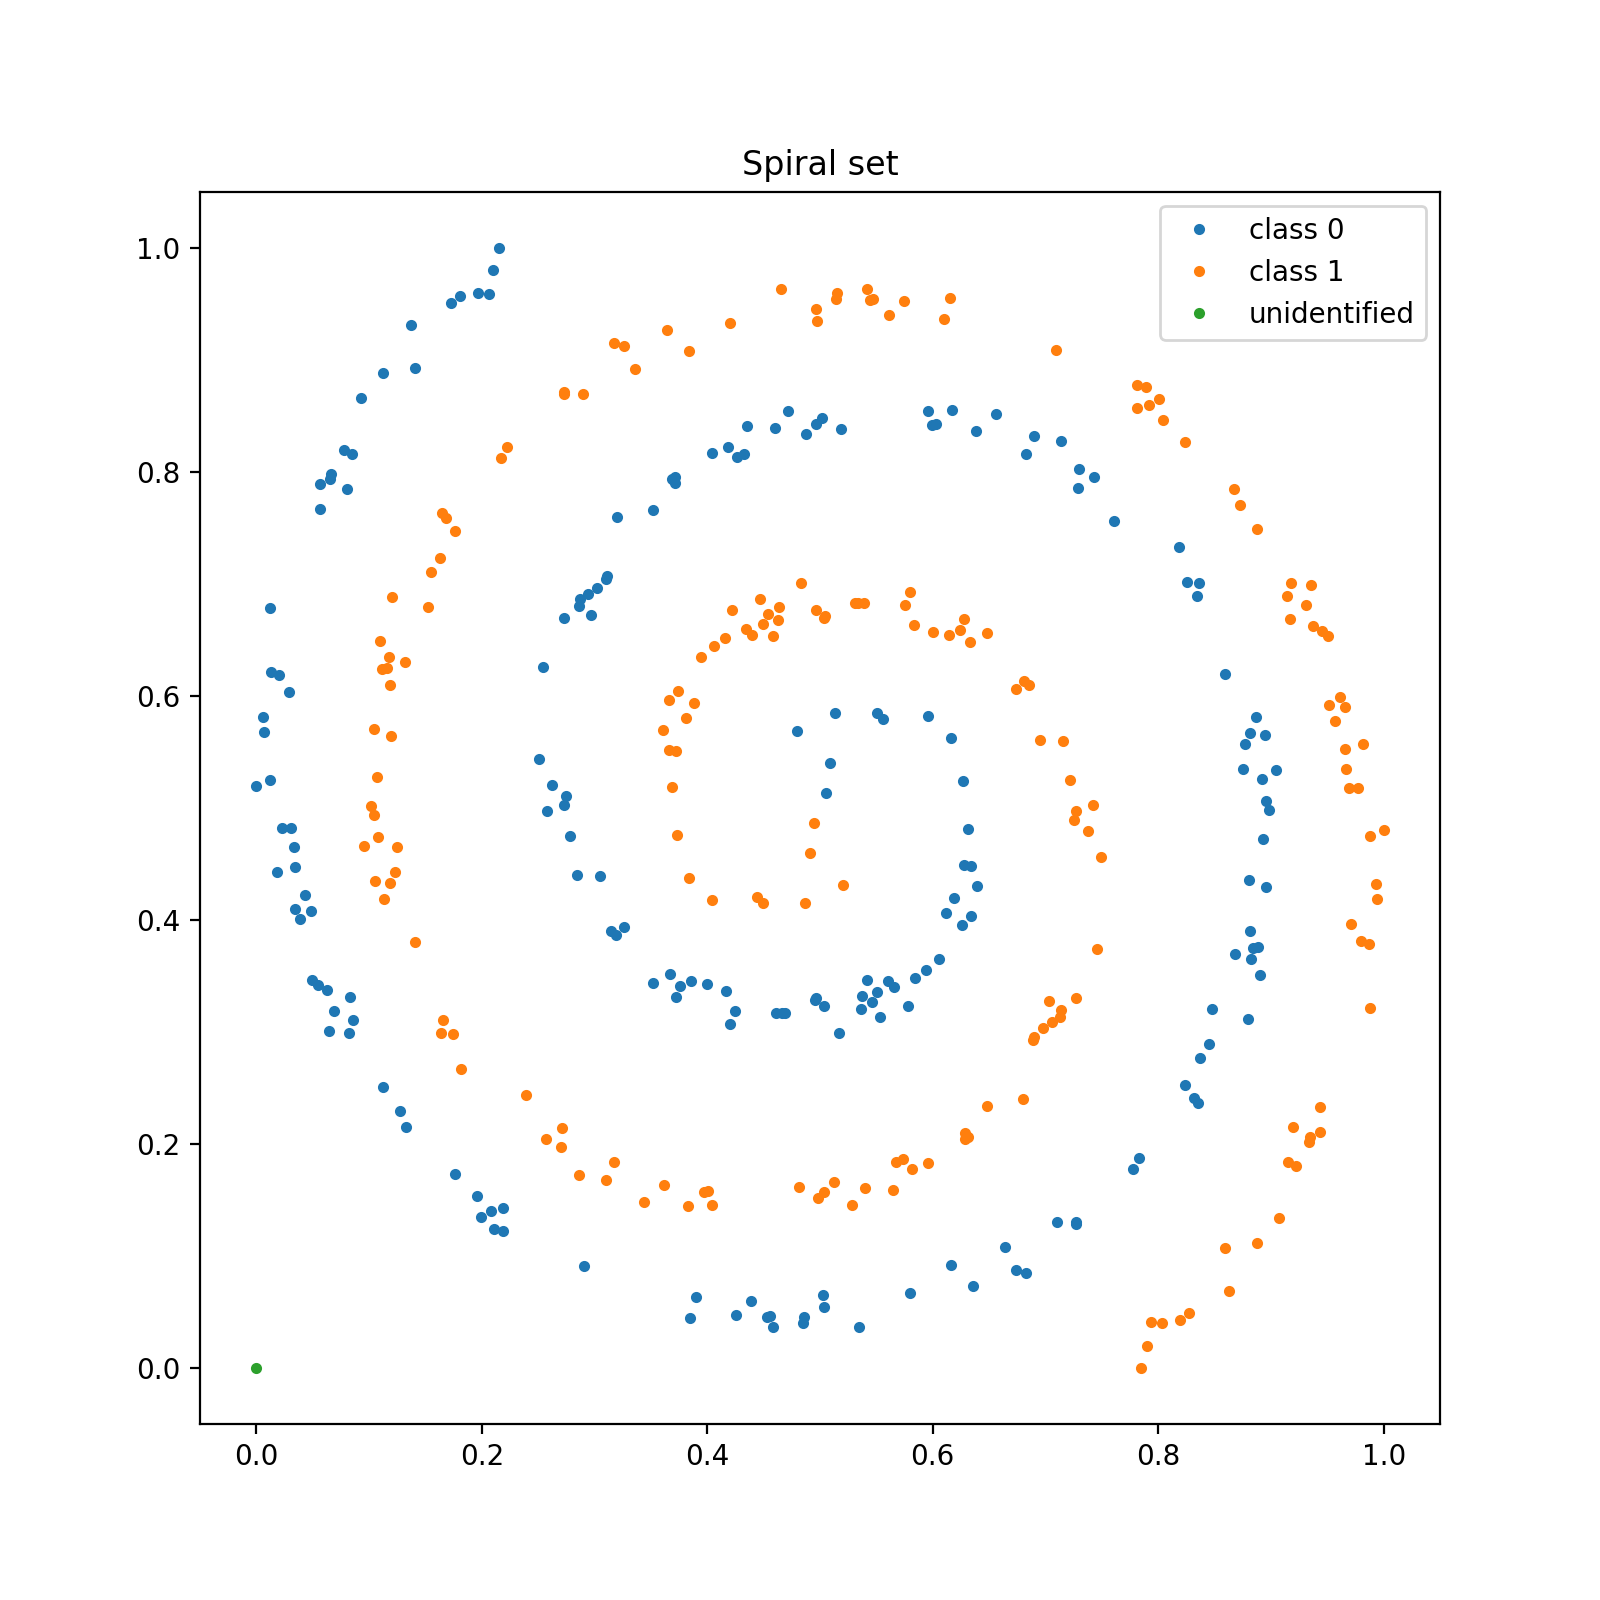

In [7]:
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111)
plt.title('Spiral set')
plt.plot(Xtest.data_normalized[ytest==0,0], Xtest.data_normalized[ytest==0,1], '.', label='class 0')
plt.plot(Xtest.data_normalized[ytest==1,0], Xtest.data_normalized[ytest==1,1], '.', label='class 1')
plt.plot(Xtest.data_normalized[ytest==2,0], Xtest.data_normalized[ytest==2,1], '.', label='unidentified')
plt.legend()
plt.show()

### Test the network

In [8]:
ypred = []
for i in range(npoints*2+1):
    I = Xtest.data_normalized[i,...]
    print("{} ---> class {}\n".format(I.ravel(),ytest[i]))
    #predict class of I
    Z, k = network.predict(I.ravel())
    ypred.append(k)
    print("{} ---> predicted class {}\n".format(I.ravel(),k))

INFO:root:T signal ranking:
[13  2  8  4  5 15  9  0 14  6 11  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[ 6 16  7  3 11 10 12  5  0  1 17 14  8  4  9 13  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 5  4  8 13  2 11 15  6  9  0  7 14 16  3 12  1 10 17]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 5 11  4  8 13  2  6  7 16 15  9  0  3 12 10 14 17  1]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 7 16 10 11  3 17  6  5 12  0  8 14  1  4  9 13  2 15]

INFO:root:T signal ranking:
[ 5  4 11  8 13  2  6  7 16 15  9  0  3 12 14 10 17  1]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 0  8 14  9  5  6  2 13 11 15  4  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[ 6  3 12 16 10  7  1  5 11  0 17  8 14  4  9 13  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[12  3  1 17 10  6 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[ 9 15 14  2  0  8  5 13  6 11  4  7  1 16 12  3 17 10]



[0.0203388 0.6187827] ---> class 0

[0.0203388 0.6187827] ---> predicted class 0

[0.53654075 0.32095253] ---> class 0

[0.53654075 0.32095253] ---> predicted class None

[0.03388522 0.4097292 ] ---> class 0

[0.03388522 0.4097292 ] ---> predicted class None

[0.08245881 0.29896674] ---> class 0

[0.08245881 0.29896674] ---> predicted class None

[0.45321918 0.04546086] ---> class 0

[0.45321918 0.04546086] ---> predicted class 1

[0.06860052 0.3191801 ] ---> class 0

[0.06860052 0.3191801 ] ---> predicted class None

[0.3020075  0.69646376] ---> class 0

[0.3020075  0.69646376] ---> predicted class 1

[0.605899   0.36501718] ---> class 0

[0.605899   0.36501718] ---> predicted class None

[0.8452234  0.28917092] ---> class 0

[0.8452234  0.28917092] ---> predicted class 1

[0.20612511 0.9587637 ] ---> class 0

[0.20612511 0.9587637 ] ---> predicted class 0

[0.88071513 0.43582642] ---> class 0

[0.88071513 0.43582642] ---> predicted class 1

[0.00572674 0.58110285] ---> class 0

[0.00

INFO:root:T signal ranking:
[ 9 15  2 14  0  8  5 13  6  4 11  7  1 16 12  3 17 10]

INFO:root:T signal ranking:
[ 3 10 12  7 17 16 11  6  1  5  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[ 6 16  3  7 12 10  5 11  1  0 17 14  8  4  9 13  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5 16  7  9 11 13  2 15  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 5  4  8 13  2 11  6 15  9  0  7 16 14  3 12 10  1 17]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[16  7 10 11  3 17  6 12  5  0  8 14  1  4  9 13  2 15]

INFO:root:T signal ranking:
[11  5  7 16  8 10  6  4  3 12 17  0 13  2  9 14 15  1]

INFO:root:T signal ranking:
[ 6 16  7 11  5  3 12 10  0  1  8 14 17  4  9 13  2 15]

INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[ 5  8  0  6 11 14  9  4 13  2  7 16 15  1  3 12 10 17]

INFO:root:T signal ranking:
[ 3 10 12 17  7 16 11  6  1  5  

[0.4253155  0.04758647] ---> predicted class 1

[0.18106438 0.9572079 ] ---> class 0

[0.18106438 0.9572079 ] ---> predicted class 0

[0.71013916 0.13037594] ---> class 0

[0.71013916 0.13037594] ---> predicted class 1

[0.5659431  0.34055638] ---> class 0

[0.5659431  0.34055638] ---> predicted class None

[0.8595441  0.61934763] ---> class 0

[0.8595441  0.61934763] ---> predicted class None

[0.03882757 0.40103614] ---> class 0

[0.03882757 0.40103614] ---> predicted class None

[0.48536167 0.04055921] ---> class 0

[0.48536167 0.04055921] ---> predicted class 1

[0.19594063 0.15390147] ---> class 0

[0.19594063 0.15390147] ---> predicted class 1

[0.49629343 0.3307281 ] ---> class 0

[0.49629343 0.3307281 ] ---> predicted class 0

[0.7826902  0.18786432] ---> class 0

[0.7826902  0.18786432] ---> predicted class 1

[0.2725687 0.5026751] ---> class 0

[0.2725687 0.5026751] ---> predicted class 1

[0.72749656 0.1300599 ] ---> class 0

[0.72749656 0.1300599 ] ---> predicted class 1

[

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 5  8  0  6 11 14  4  9 13  2  7 16 15  1  3 12 10 17]

INFO:root:T signal ranking:
[ 2  9 15 13  8  0 14  5  4  6 11  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[16  7 10 11  3 17  6 12  5  0  8  1 14  4  9 13  2 15]

INFO:root:T signal ranking:
[ 6  5 11  7 16  0  8  3 12 14 10  4  1 17  9 13  2 15]

INFO:root:T signal ranking:
[ 5  6 11  7 16  0  8  3 14 12 10  4  1  9 17 13  2 15]

INFO:root:T signal ranking:
[ 5  4 11  8 13  2  6  7 15  9  0 16 14  3 12 10 17  1]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 6 16  7  3 10 12 11  5  1  0 17  8 14  4  9 13  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[10  7 16  3 17 12 11  6  5  1  0  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[13  8  2  5  4 15  9  0  6 14 11  7 16  1 12  3 10 17]

INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2 15  4]

INFO:root:T signal ranking:
[ 0  8  5 14  9  6  2 13 11 15  

[0.08601627 0.31075153] ---> predicted class None

[0.25773442 0.49688128] ---> class 0

[0.25773442 0.49688128] ---> predicted class 1

[0.05671231 0.7895293 ] ---> class 0

[0.05671231 0.7895293 ] ---> predicted class 0

[0.50250596 0.06524432] ---> class 0

[0.50250596 0.06524432] ---> predicted class 1

[0.37549677 0.34092888] ---> class 0

[0.37549677 0.34092888] ---> predicted class 1

[0.36719027 0.3520759 ] ---> class 0

[0.36719027 0.3520759 ] ---> predicted class 1

[0.05450581 0.34208167] ---> class 0

[0.05450581 0.34208167] ---> predicted class None

[0.55331767 0.31311536] ---> class 0

[0.55331767 0.31311536] ---> predicted class None

[0.61626965 0.09227732] ---> class 0

[0.61626965 0.09227732] ---> predicted class 1

[0.02917929 0.6036626 ] ---> class 0

[0.02917929 0.6036626 ] ---> predicted class 0

[0.8864754 0.5816434] ---> class 0

[0.8864754 0.5816434] ---> predicted class 1

[0.27329442 0.6698666 ] ---> class 0

[0.27329442 0.6698666 ] ---> predicted class 1

[

INFO:root:T signal ranking:
[ 6  1  0  3 12 14  5  8 10 16  7 11 17  9 13  4  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 9  2 15 14  0  8 13  5  4  6 11  7  1 16 12  3 17 10]

INFO:root:T signal ranking:
[ 6  3 16  7 12 10  5  1 11  0 17 14  8  4  9 13  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 5  4 13  8  2 15  9 11  0  6 14  7 16  1 12  3 10 17]

INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0  8  5 14 16  7 11  9 13  4  2 15]

INFO:root:T signal ranking:
[ 1 12  3  6 17  0 10  8 14  5 16  7 11  9 13  2  4 15]

INFO:root:T signal ranking:
[16  7 10 11  3 17  6 12  5  0  8  1 14  4  9 13  2 15]

INFO:root:T signal ranking:
[ 5 11  6  8  0  7 16 14  4  3  9 12 10 13  1  2 17 15]

INFO:root:T signal ranking:
[14  0  1  6  9  3 12  8  2 15 17 10  5 16 13  7 11  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 16  7 11  9 13  2  4 15]

INFO:root:T signal ranking:
[ 6 16  7  3 12 11 10  5  0  1 1

[0.32007405 0.75969964] ---> predicted class 0

[0.62724304 0.5245498 ] ---> class 0

[0.62724304 0.5245498 ] ---> predicted class None

[0.14041166 0.8930172 ] ---> class 0

[0.14041166 0.8930172 ] ---> predicted class 0

[0.5841472 0.348427 ] ---> class 0

[0.5841472 0.348427 ] ---> predicted class None

[0.02235522 0.4818133 ] ---> class 0

[0.02235522 0.4818133 ] ---> predicted class 1

[0.898599   0.49810824] ---> class 0

[0.898599   0.49810824] ---> predicted class 1

[0.8773298  0.55749536] ---> class 0

[0.8773298  0.55749536] ---> predicted class 1

[0.50346994 0.05445192] ---> class 0

[0.50346994 0.05445192] ---> predicted class 1

[0.3191492 0.3866131] ---> class 0

[0.3191492 0.3866131] ---> predicted class 1

[0.7139936 0.8278455] ---> class 0

[0.7139936 0.8278455] ---> predicted class None

[0.8946192 0.5650613] ---> class 0

[0.8946192 0.5650613] ---> predicted class 1

[0.53731275 0.33206838] ---> class 0

[0.53731275 0.33206838] ---> predicted class 0

[0.60265476 0

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 9 15  2 14  0  8  5 13  6  4 11  7  1 16 12  3 17 10]

INFO:root:T signal ranking:
[ 5  8  0  6 11 14  9 13  2  4  7 15 16  1  3 12 10 17]

INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0 16  5  8  7 14 11  9  4 13  2 15]

INFO:root:T signal ranking:
[14  0  1  6  3 12  9  8  2 17 10 15  5 16 13  7 11  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 6  3  1 12 16 10  7  5  0 11 17 14  8  4  9 13  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 6 11  5  7 16  3  0 12 10  8 14  1 17  4  9 13  2 15]

INFO:root:T signal ranking:
[ 2  9 15 13  8  0 14  5  4  6 11  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0  8  5 14 16  7 11  9 13  4  2 15]

INFO:root:T signal ranking:
[ 6 16  7  3 12 10  5 11  1  0 17 14  8  4  9 13  2 15]

INFO:root:T signal ranking:
[ 3 12 10 17 16  7  1  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[14  0  6  1  9  8  3 12  2 15 1

[0.04893967 0.3465057 ] ---> predicted class None

[0.19622125 0.9598648 ] ---> class 0

[0.19622125 0.9598648 ] ---> predicted class 0

[0.25110564 0.5441054 ] ---> class 0

[0.25110564 0.5441054 ] ---> predicted class 1

[0.89305806 0.4718819 ] ---> class 0

[0.89305806 0.4718819 ] ---> predicted class 1

[0.7292113 0.7854089] ---> class 0

[0.7292113 0.7854089] ---> predicted class None

[0.6115988 0.4065129] ---> class 0

[0.6115988 0.4065129] ---> predicted class None

[0.4248403 0.3187939] ---> class 0

[0.4248403 0.3187939] ---> predicted class 1

[0.07736025 0.81939036] ---> class 0

[0.07736025 0.81939036] ---> predicted class 0

[0.8954267  0.50621283] ---> class 0

[0.8954267  0.50621283] ---> predicted class 1

[0.5600461 0.3457673] ---> class 0

[0.5600461 0.3457673] ---> predicted class 0

[0.77767736 0.17760114] ---> class 0

[0.77767736 0.17760114] ---> predicted class 1

[0.6895366 0.8324286] ---> class 0

[0.6895366 0.8324286] ---> predicted class None

[0.46877414 0.

INFO:root:T signal ranking:
[14  0  1  6 12  3  9  8 17  2 10 15  5 16 13  7 11  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[11  5  7 16  8 10  6  4  3 17 12  0 13  2  9 14 15  1]

INFO:root:T signal ranking:
[ 5  4 11  8 13  2  6  7 16  9 15  0  3 14 12 10 17  1]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 6 16  7  3 12  5 10 11  0  1 14  8 17  4  9 13  2 15]

INFO:root:T signal ranking:
[10  7 16  3 17 11  6 12  5  1  0  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[12  1  3 17  6 10 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5  1 13 16 11  7  3 12 10  4 17]

INFO:root:T signal ranking:
[11  7 16  5 10  3  6 17  8 12  0  4 14  9 13  2  1 15]

INFO:root:T signal ranking:
[ 9 15 14  2  0  8  5 13  6 11  4  7  1 16 12  3 17 10]

INFO:root:T signal ranking:
[13  2  8  4  5 15  9  0 14  6 11  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[10  7 16  3 17 12 11  6  1  5  0  8 14  4  9 13 15  2]

INFO:

[0.28457856 0.4405559 ] ---> predicted class 1

[0.7428918  0.79576117] ---> class 0

[0.7428918  0.79576117] ---> predicted class None

[0.1997074  0.13496451] ---> class 0

[0.1997074  0.13496451] ---> predicted class 1

[0.0832957  0.33097744] ---> class 0

[0.0832957  0.33097744] ---> predicted class None

[0.54125875 0.3468369 ] ---> class 0

[0.54125875 0.3468369 ] ---> predicted class 0

[0.5796186  0.06686864] ---> class 0

[0.5796186  0.06686864] ---> predicted class 1

[0.8904343  0.35088724] ---> class 0

[0.8904343  0.35088724] ---> predicted class 1

[0.4718903  0.85434747] ---> class 0

[0.4718903  0.85434747] ---> predicted class 0

[0.290476   0.09103766] ---> class 0

[0.290476   0.09103766] ---> predicted class 1

[0.21493901 1.        ] ---> class 0

[0.21493901 1.        ] ---> predicted class 0

[0.01292795 0.6216732 ] ---> class 0

[0.01292795 0.6216732 ] ---> predicted class 0

[0.6359193  0.07357886] ---> class 0

[0.6359193  0.07357886] ---> predicted class 1



INFO:root:T signal ranking:
[ 6  1  3 12  0  5 10 16  7 14  8 11 17  9  4 13  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13  1 11 16  7  3 12  4 10 17]

INFO:root:T signal ranking:
[ 6 16  7  3 11  5 10 12  0 17  1 14  8  4  9 13  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 6  3 16  7 10 12 11  5  1 17  0  8 14  4  9 13  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13  1 11 16  7  4  3 12 10 17]

INFO:root:T signal ranking:
[14  0  9  8  6  2  5 15 13 11  1  7 16  4 12  3 10 17]

INFO:root:T signal ranking:
[11  7  5 16 10  8  6  3  4 17 12  0 13  2 14  9 15  1]

INFO:root:T signal ranking:
[ 6 16  7  3 12 10 11  5  1  0 17 14  8  4  9 13  2 15]

INFO:root:T signal ranking:
[ 5 11  7  8  4 16  6 13 10  2  3  0 12  9 15 17 14  1]

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[14  0  9  6  8  2 15  5 13  1 1

[0.37143552 0.795703  ] ---> predicted class 0

[0.63122475 0.4808124 ] ---> class 0

[0.63122475 0.4808124 ] ---> predicted class None

[0.45998898 0.83935136] ---> class 0

[0.45998898 0.83935136] ---> predicted class 0

[0.51727045 0.29904506] ---> class 0

[0.51727045 0.29904506] ---> predicted class None

[0.5778482  0.32309565] ---> class 0

[0.5778482  0.32309565] ---> predicted class None

[0.43226728 0.8160972 ] ---> class 0

[0.43226728 0.8160972 ] ---> predicted class 0

[0.37097558 0.7903762 ] ---> class 0

[0.37097558 0.7903762 ] ---> predicted class 0

[0.21860701 0.12245208] ---> class 0

[0.21860701 0.12245208] ---> predicted class 1

[0.54617316 0.3270034 ] ---> class 0

[0.54617316 0.3270034 ] ---> predicted class 0

[0.13246055 0.2148512 ] ---> class 0

[0.13246055 0.2148512 ] ---> predicted class 1

[0.88403416 0.3754238 ] ---> class 0

[0.88403416 0.3754238 ] ---> predicted class 1

[0.4352435 0.8412029] ---> class 0

[0.4352435 0.8412029] ---> predicted class 0

[

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 3 12  6 10  1 16  7 17 11  5  0  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[ 0  6  8 14  5  9  2 13 11  1  7 16 15  4  3 12 10 17]

INFO:root:T signal ranking:
[ 8  2  9  0 13  5 14 15  6  4 11  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[ 3 17 10 12  7 16  1 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[ 8  5  2 13  4  0  9  6 15 11 14  7 16  1 12  3 10 17]

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5  0 11  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[11  5  7 16  6  8 10  3  4  0 12 17 14 13  9  2  1 15]

INFO:root:T signal ranking:
[ 6  0 14  1  8  3 12  5  9 16 10  7  2 13 17 11 15  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 8  5  2 13  4  0  9 15  6 14 11  7 16  1 12  3 10 17]

INFO:root:T signal ranking:
[ 5  8  4 11 13  2  6  0  9 15  7 14 16  3 12  1 10 17]

INFO:root:T signal ranking:
[14  0  9  6 15  2  8  1  5 16 13  3 12  7 10 11 17  4]

INFO:

[0.93139946 0.68081987] ---> predicted class None

[0.6979925  0.30353627] ---> class 1

[0.6979925  0.30353627] ---> predicted class 1

[0.39410102 0.6349828 ] ---> class 1

[0.39410102 0.6349828 ] ---> predicted class 1

[0.15477657 0.710829  ] ---> class 1

[0.15477657 0.710829  ] ---> predicted class 1

[0.79387486 0.0412363 ] ---> class 1

[0.79387486 0.0412363 ] ---> predicted class 1

[0.11928485 0.5641736 ] ---> class 1

[0.11928485 0.5641736 ] ---> predicted class 1

[0.99427325 0.41889715] ---> class 1

[0.99427325 0.41889715] ---> predicted class 1

[0.27001393 0.19720283] ---> class 1

[0.27001393 0.19720283] ---> predicted class 1

[0.62731653 0.66862667] ---> class 1

[0.62731653 0.66862667] ---> predicted class None

[0.1040152  0.57068497] ---> class 1

[0.1040152  0.57068497] ---> predicted class 1

[0.11881123 0.4329066 ] ---> class 1

[0.11881123 0.4329066 ] ---> predicted class 1

[0.5746845  0.95241356] ---> class 1

[0.5746845  0.95241356] ---> predicted class 0



INFO:root:T signal ranking:
[ 6  0 14  1  8  3 12  5  9 16 10  7  2 13 11 17 15  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 6  0  1 14  8  3 12  5 16 10  9  7 17  2 13 11 15  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5 16  9  7 13  2 11 15  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 0  6 14  8  9  5  2 13  1 11 16  7 15  3 12  4 10 17]

INFO:root:T signal ranking:
[14  0  9  2 15  8  6  5 13 11  1  7 16  4 12  3 10 17]

INFO:root:T signal ranking:
[ 1 12  3  6 17 10 16  7  5 11  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[ 5  8  4 11 13  2  6  0  9 15  7 14 16  3 12  1 10 17]

INFO:root:T signal ranking:
[ 3 12  6  1 10 17 16  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[ 1 12  3  6 17  0  8 10 14  5 16  7 11  9 13  2  4 15]

INFO:root:T signal ranking:
[ 3 12  6 10  1 16 17  7 11  5  0  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[ 3 12 10  6 16  7 17 11  1  5  

[0.49749404 0.9347557 ] ---> predicted class 0

[0.6245032 0.6590711] ---> class 1

[0.6245032 0.6590711] ---> predicted class None

[0.6328097 0.6479241] ---> class 1

[0.6328097 0.6479241] ---> predicted class None

[0.9454942  0.65791833] ---> class 1

[0.9454942  0.65791833] ---> predicted class None

[0.44668233 0.6868847 ] ---> class 1

[0.44668233 0.6868847 ] ---> predicted class 0

[0.38373035 0.9077227 ] ---> class 1

[0.38373035 0.9077227 ] ---> predicted class 0

[0.9708207  0.39633736] ---> class 1

[0.9708207  0.39633736] ---> predicted class 1

[0.1135246  0.41835657] ---> class 1

[0.1135246  0.41835657] ---> predicted class 1

[0.72670555 0.33013332] ---> class 1

[0.72670555 0.33013332] ---> predicted class 1

[0.96545863 0.5530584 ] ---> class 1

[0.96545863 0.5530584 ] ---> predicted class 1

[0.7055338  0.30854273] ---> class 1

[0.7055338  0.30854273] ---> predicted class 1

[0.679926   0.24030039] ---> class 1

[0.679926   0.24030039] ---> predicted class 1

[0.37

INFO:root:Unidentified class

INFO:root:T signal ranking:
[11  7  5 16  6 10  8  3 12  0 17  4 14  9 13  2  1 15]

INFO:root:T signal ranking:
[ 5  8  4 13  2 11  6  0  9 15  7 14 16  3 12  1 10 17]

INFO:root:T signal ranking:
[ 0  6 14  8  5  9  1  2 13 16 11  7 15  3 12  4 10 17]

INFO:root:T signal ranking:
[ 7 11 16 10  5  6  3 12 17  0  8 14  4  1  9 13  2 15]

INFO:root:T signal ranking:
[ 3 10 12 16  7  6 17 11  1  5  0  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[14  0  9  2 15  8  6  5 13 11  4  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[ 1  6  3 12  0 10 14 17  8  5 16  7 11  9 13  4  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 1 12  3  6 17 10  0 16  5  8 14  7 11  9 13  4  2 15]

INFO:root:T signal ranking:
[12  3 10 17  1 16  7 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[ 5  8  4 13  2 11  6  0  9 15 14  7 16  1  3 12 10 17]

INFO:root:T signal ranking:
[ 0  6 14  8  5  9  1  2 16 13  7 11 15  3 12 10  4 17]

INFO:

[0.68085086 0.61338687] ---> predicted class None

[0.2860064  0.17215455] ---> class 1

[0.2860064  0.17215455] ---> predicted class 1

[0.10538075 0.43493873] ---> class 1

[0.10538075 0.43493873] ---> predicted class 1

[0.46268722 0.66793156] ---> class 1

[0.46268722 0.66793156] ---> predicted class 0

[0.39734524 0.15712741] ---> class 1

[0.39734524 0.15712741] ---> predicted class 1

[0.6485179  0.23382665] ---> class 1

[0.6485179  0.23382665] ---> predicted class 1

[0.33544868 0.89200073] ---> class 1

[0.33544868 0.89200073] ---> predicted class 0

[0.72173774 0.5247609 ] ---> class 1

[0.72173774 0.5247609 ] ---> predicted class None

[1.         0.48040617] ---> class 1

[1.         0.48040617] ---> predicted class 1

[0.8873587  0.11175431] ---> class 1

[0.8873587  0.11175431] ---> predicted class 1

[0.12471116 0.46475375] ---> class 1

[0.12471116 0.46475375] ---> predicted class 1

[0.4964104  0.67661023] ---> class 1

[0.4964104  0.67661023] ---> predicted class Non

INFO:root:T signal ranking:
[ 1  3 12  6 10 17  0 16  5  7  8 14 11  4  9 13  2 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 5  8  2 13  4  0  9  6 11 15 14  7 16  1 12  3 10 17]

INFO:root:T signal ranking:
[11  5  7 16  6  8 10  3  0  4 12 17 14  9 13  2  1 15]

INFO:root:T signal ranking:
[ 0  6  8 14  5  9 11 13  2  7  1 16  4 15  3 12 10 17]

INFO:root:T signal ranking:
[ 6  0 14  8  1  9  5 16  3  2  7 12 13 10 11 15 17  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[12  3  1 17 10 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[ 5  8  4 13  2  0 11  6  9 15 14  7 16  1 12  3 10 17]

INFO:root:T signal ranking:
[ 0  6 14  8  5  9  2  1 13 11 16  7 15  4  3 12 10 17]

INFO:root:T signal ranking:
[ 9  0 14  2  8 15  5 13  6 11  4  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[11  7  5 16 10  6  3  8 12  0 17  4 14  9 13  1  2 15]

INFO:root:T signal ranking:
[ 6  0 14  8  1  9  5  2 16 13  7  3 11 12 15 10 17  4]

INFO:

[0.7488944 0.4558946] ---> predicted class None

[0.10694194 0.52811813] ---> class 1

[0.10694194 0.52811813] ---> predicted class 1

[0.27078867 0.21459107] ---> class 1

[0.27078867 0.21459107] ---> predicted class 1

[0.3884012  0.59348714] ---> class 1

[0.3884012  0.59348714] ---> predicted class 1

[0.5751597 0.6812061] ---> class 1

[0.5751597 0.6812061] ---> predicted class None

[0.9226397 0.1806096] ---> class 1

[0.9226397 0.1806096] ---> predicted class 1

[0.10457334 0.49378714] ---> class 1

[0.10457334 0.49378714] ---> predicted class 1

[0.43995392 0.65423274] ---> class 1

[0.43995392 0.65423274] ---> predicted class 0

[0.22232267 0.82239884] ---> class 1

[0.22232267 0.82239884] ---> predicted class 1

[0.31046346 0.16757147] ---> class 1

[0.31046346 0.16757147] ---> predicted class 1

[0.53122586 0.68285286] ---> class 1

[0.53122586 0.68285286] ---> predicted class None

[0.52003235 0.43139067] ---> class 1

[0.52003235 0.43139067] ---> predicted class 0

[0.1118

INFO:root:T signal ranking:
[14  0  9  6 15  2  8  1  5 13 16 11  7 12  3 10 17  4]

INFO:root:T signal ranking:
[11  7 16  5 10  6  3 12 17  8  0 14  4  1  9 13  2 15]

INFO:root:T signal ranking:
[ 6  1  3 12  0 14  8 10  5 17 16  7 11  9 13  2  4 15]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[11  5  7 16  8  6 10  3  4  0 12 17 14 13  9  2 15  1]

INFO:root:T signal ranking:
[14  1  0  6  9 12  3 17  8 15  2 10  5 16 13  7 11  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 1 12  6  3  0 14 17  8 10  5  9 16  7  2 13 11 15  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 0  6 14  8  5  9  1  2 13 16 11  7 15  3 12  4 10 17]

INFO:root:T signal ranking:
[14  0  9 15  2  6  8  5 13 11  1 16  7  4 12  3 10 17]

INFO:root:T signal ranking:
[ 8  2 13  5  0  9  4 15 14  6 11  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[16  7 10 11  6  3 12 17  5  0  1  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[14  0  9  6  1 15  3  2 12  8 1

[0.5146215  0.95473045] ---> class 1

[0.5146215  0.95473045] ---> predicted class 0

[0.36191785 0.16304162] ---> class 1

[0.36191785 0.16304162] ---> predicted class 1

[0.71542144 0.55944407] ---> class 1

[0.71542144 0.55944407] ---> predicted class None

[0.25710818 0.20423885] ---> class 1

[0.25710818 0.20423885] ---> predicted class 1

[0.8002926 0.8650355] ---> class 1

[0.8002926 0.8650355] ---> predicted class None

[0.91670436 0.6690226 ] ---> class 1

[0.91670436 0.6690226 ] ---> predicted class None

[0.45874128 0.6531631 ] ---> class 1

[0.45874128 0.6531631 ] ---> predicted class 0

[0.42038143 0.93313134] ---> class 1

[0.42038143 0.93313134] ---> predicted class 0

[0.10956573 0.64911276] ---> class 1

[0.10956573 0.64911276] ---> predicted class 1

[0.52810967 0.14565252] ---> class 1

[0.52810967 0.14565252] ---> predicted class 1

[0.70952404 0.9089623 ] ---> class 1

[0.70952404 0.9089623 ] ---> predicted class None

[0.785061 0.      ] ---> class 1

[0.785061 0.

INFO:root:T signal ranking:
[ 6  0 14  1  8  3  5 12  9 16 10  7  2 13 11 17 15  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 8  2  9  0  5 13 14 15  6  4 11  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[17  3 10 12  7 16  1 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[14  0  9  6 15  2  8  1  5 16 13  7 12  3 11 10 17  4]

INFO:root:T signal ranking:
[ 0  6 14  8  5  1  9  2 16 13  7 11  3 12 15 10  4 17]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[11  5  7  8 16  6  4 10  3  0 12 13 14 17  9  2 15  1]

INFO:root:T signal ranking:
[ 6  0 14  1  8  9  5  2 16  3 12  7 13 10 11 15 17  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[12  3  1 17 10 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[ 2  8 13  5  9  0 15 14  4  6 11  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[ 5 11  8  7  4  6 16  0 13  3  2 10 12  9 14 15 17  1]

INFO:root:T signal ranking:
[ 8  2  5  0 13  9 14 15  6  4 1

[0.13165668 0.6307966 ] ---> predicted class 1

[0.6146076  0.65483725] ---> class 1

[0.6146076  0.65483725] ---> predicted class None

[0.16300376 0.72284615] ---> class 1

[0.16300376 0.72284615] ---> predicted class 1

[0.7899216  0.02000691] ---> class 1

[0.7899216  0.02000691] ---> predicted class 1

[0.5440728  0.95329446] ---> class 1

[0.5440728  0.95329446] ---> predicted class 0

[0.50452185 0.6713805 ] ---> class 1

[0.50452185 0.6713805 ] ---> predicted class None

[0.23900735 0.24339122] ---> class 1

[0.23900735 0.24339122] ---> predicted class 1

[0.5795757 0.6932764] ---> class 1

[0.5795757 0.6932764] ---> predicted class None

[0.93456316 0.20653355] ---> class 1

[0.93456316 0.20653355] ---> predicted class 1

[0.11990605 0.6884257 ] ---> class 1

[0.11990605 0.6884257 ] ---> predicted class 1

[0.18164848 0.26683646] ---> class 1

[0.18164848 0.26683646] ---> predicted class 1

[0.15220463 0.67916447] ---> class 1

[0.15220463 0.67916447] ---> predicted class 1

[

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 0  6 14  8  5  9  2  1 13 11 16  7 15  3 12  4 10 17]

INFO:root:T signal ranking:
[ 1 14  0 12  6  3  9 17  8 10  2 15  5 16 13  7 11  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 8  5  2 13  0  9  4 15 14  6 11  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[ 7 16 10  3  6 11 12 17  5  1  0  8 14  4  9 13  2 15]

INFO:root:T signal ranking:
[ 2  8  9  0 14  5 13 15  6  4 11  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[11  7  5 16  6 10  3  8  0 12 17  4 14  9 13  1  2 15]

INFO:root:T signal ranking:
[12  3 10 17  1 16  7 11  6  5  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[14  9  0  2 15  8  6  5 13 11  4  7  1 16 12  3 10 17]

INFO:root:T signal ranking:
[12  3  1 17 10 16  7  6 11  5  0  8 14  4 13  9 15  2]

INFO:root:T signal ranking:
[ 1 14  0  6 12  3  9 17  8 15  2 10  5 16 13  7 11  4]

INFO:root:Unidentified class

INFO:root:T signal ranking:
[ 1 12  3  6  0 17  8 14 10  5 1

[0.781393   0.87754786] ---> predicted class None

[0.45382684 0.6729966 ] ---> class 1

[0.45382684 0.6729966 ] ---> predicted class 0

[0.86753947 0.7851488 ] ---> class 1

[0.86753947 0.7851488 ] ---> predicted class None

[0.1159659 0.6245762] ---> class 1

[0.1159659 0.6245762] ---> predicted class 1

[0.5647565  0.15879713] ---> class 1

[0.5647565  0.15879713] ---> predicted class 1

[0.1643357 0.7633839] ---> class 1

[0.1643357 0.7633839] ---> predicted class 1

[0.31758356 0.18417294] ---> class 1

[0.31758356 0.18417294] ---> predicted class 1

[0.9070831  0.13385284] ---> class 1

[0.9070831  0.13385284] ---> predicted class 1

[0.3261079 0.9123795] ---> class 1

[0.3261079 0.9123795] ---> predicted class 0

[0.9434625  0.23300566] ---> class 1

[0.9434625  0.23300566] ---> predicted class 1

[0.82414985 0.82696426] ---> class 1

[0.82414985 0.82696426] ---> predicted class None

[0.95690596 0.5777533 ] ---> class 1

[0.95690596 0.5777533 ] ---> predicted class 1

[0.690132

In [9]:
set(ypred)

{0, 1, None}

In [10]:
ypred = [2 if pred==None else int(pred) for pred in ypred ]
ypred_int = np.array(ypred, dtype=np.int32)

<IPython.core.display.Javascript object>


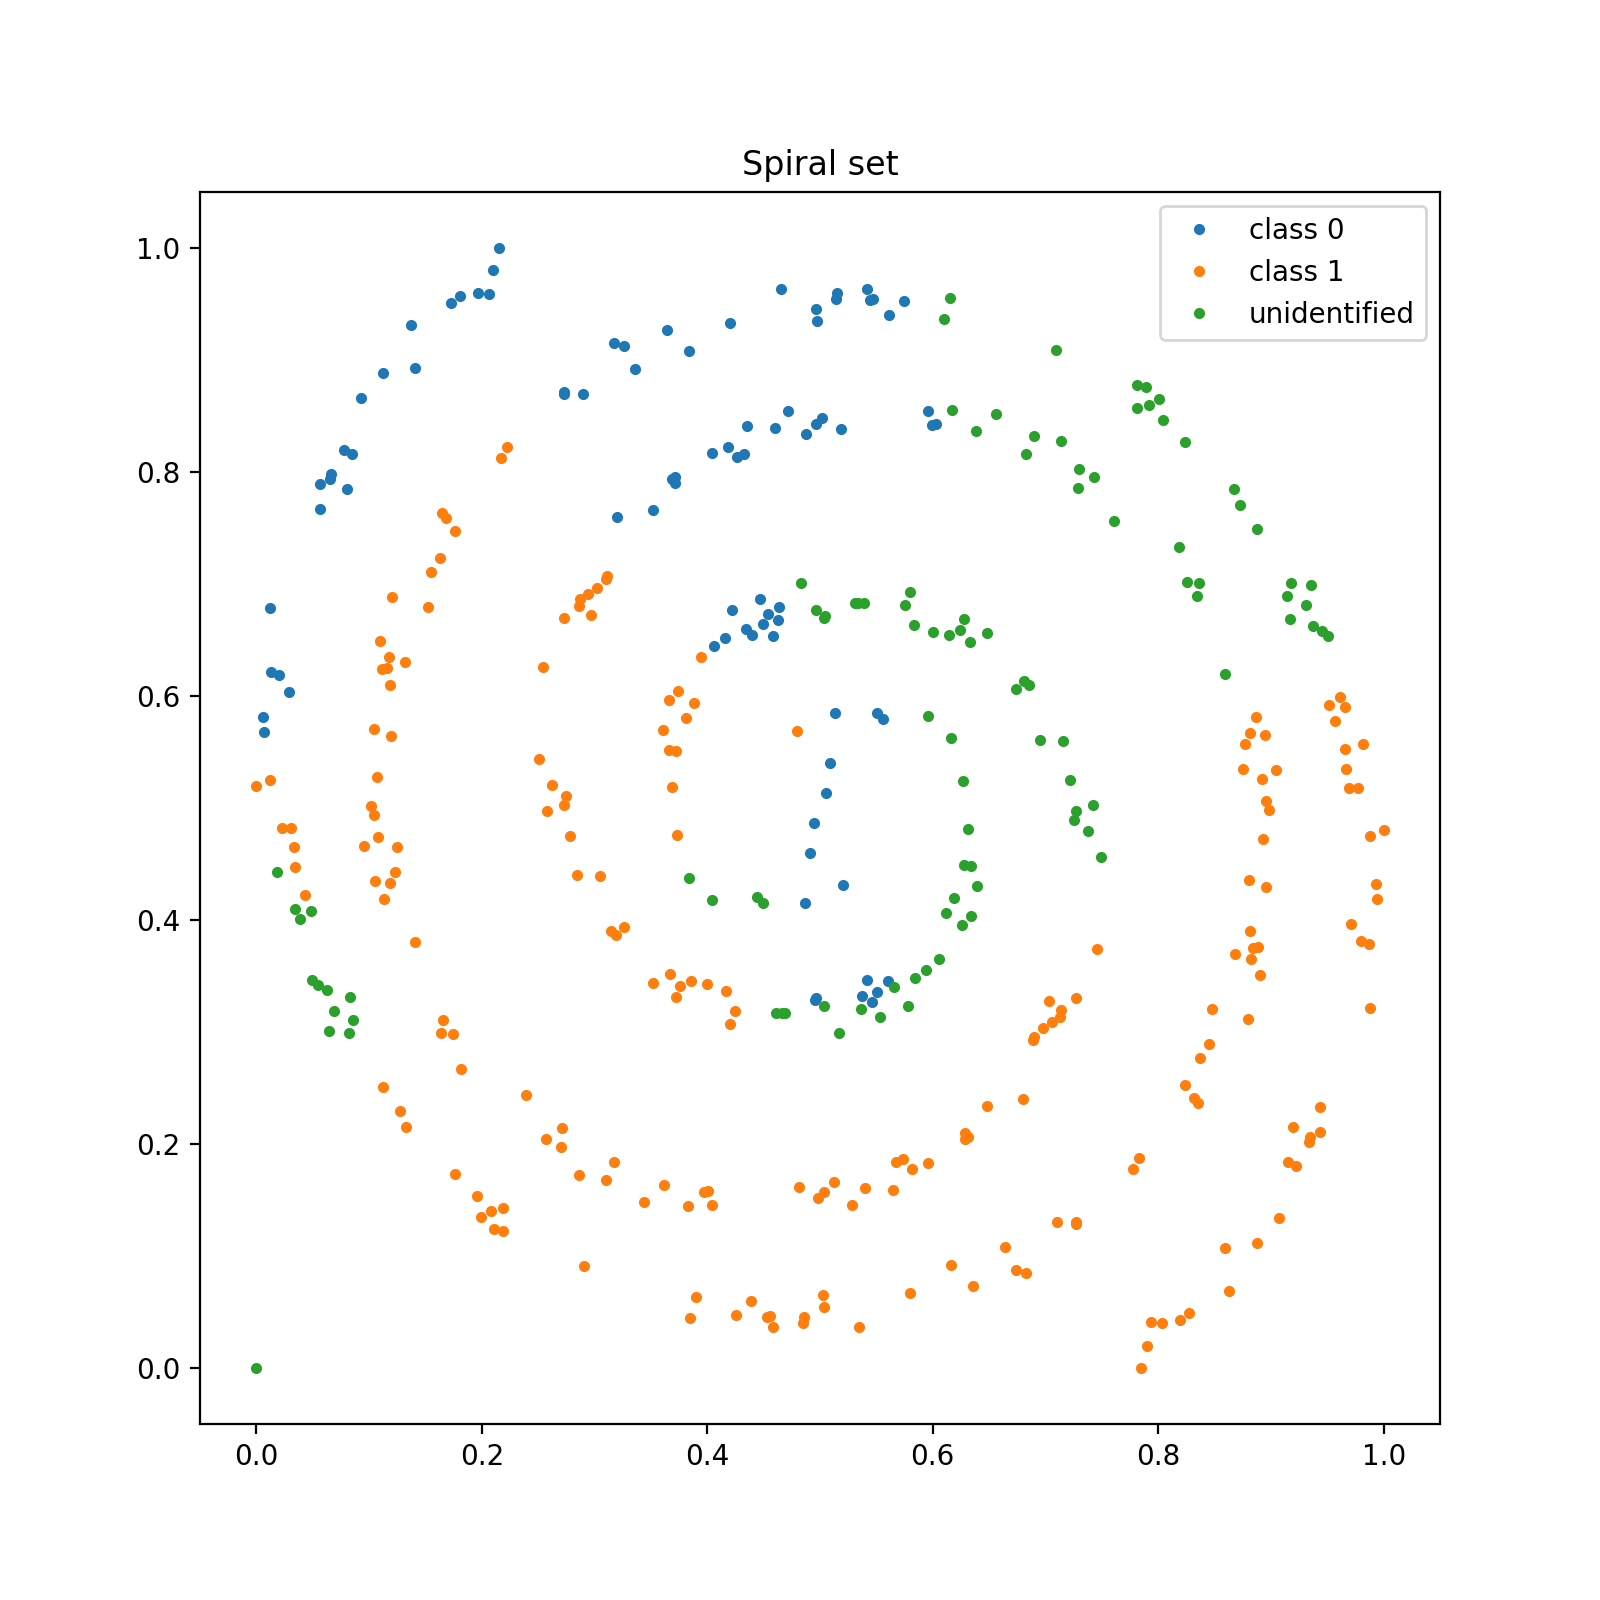

In [11]:
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111)
plt.title('Spiral set')
plt.plot(Xtest.data_normalized[ypred_int==0,0], Xtest.data_normalized[ypred_int==0,1], '.', label='class 0')
plt.plot(Xtest.data_normalized[ypred_int==1,0], Xtest.data_normalized[ypred_int==1,1], '.', label='class 1')
plt.plot(Xtest.data_normalized[ypred_int==2,0], Xtest.data_normalized[ypred_int==2,1], '.', label='unidentified')
plt.legend()
plt.show()

In [12]:
target_names = ['class 0', 'class 1', "unidentified"]
print(classification_report(ytest, ypred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.61      0.27      0.38       200
     class 1       0.54      0.57      0.56       200
unidentified       0.01      1.00      0.02         1

    accuracy                           0.42       401
   macro avg       0.39      0.61      0.32       401
weighted avg       0.58      0.42      0.46       401

